In [1]:
# Kütüphaneleri içe aktarma

# sayısal işlemler
import numpy as np

# veri analizi
import pandas as pd
pd.set_option("display.max_columns", None)

# veri görselleştirme
import matplotlib.pyplot as plt

# veri görselleştirme
import seaborn as sns

# zaman hesapları
from datetime import datetime
from time import time

 
# güncelleme/versiyon uyarılarını göz ardı etme 
import warnings
warnings.filterwarnings("ignore")

import missingno
import pickle

C:\Users\Burak\AppData\Roaming\Python\Python310\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
#train = pd.read_csv('/kaggle/input/unsw-nb15/UNSW_NB15_training-set.csv')
#test = pd.read_csv('/kaggle/input/unsw-nb15/UNSW_NB15_testing-set.csv')

train = pd.read_csv('C:/Users/Burak/Tez_Calisma/2_UNSW-NB15_IDS/data/UNSW_NB15_training-set.csv')
test = pd.read_csv('C:/Users/Burak/Tez_Calisma/2_UNSW-NB15_IDS/data/UNSW_NB15_testing-set.csv')

#train = pd.read_csv('C:/Users/Burak/Tez_Calisma/2_UNSW-NB15_IDS/data/UNSW_NB15_training-set-short.csv')
#test = pd.read_csv('C:/Users/Burak/Tez_Calisma/2_UNSW-NB15_IDS/data/UNSW_NB15_testing-set-short.csv')

test.head()

id       dur proto service state  spkts  dpkts  sbytes  dbytes       rate  \
0   1  0.121478   tcp       -   FIN      6      4     258     172  74.087490   
1   2  0.649902   tcp       -   FIN     14     38     734   42014  78.473372   
2   3  1.623129   tcp       -   FIN      8     16     364   13186  14.170161   
3   4  1.681642   tcp     ftp   FIN     12     12     628     770  13.677108   
4   5  0.449454   tcp       -   FIN     10      6     534     268  33.373826   

   sttl  dttl         sload          dload  sloss  dloss      sinpkt  \
0   252   254  14158.942380    8495.365234      0      0   24.295600   
1    62   252   8395.112305  503571.312500      2     17   49.915000   
2    62   252   1572.271851   60929.230470      1      6  231.875571   
3    62   252   2740.178955    3358.622070      1      3  152.876547   
4   254   252   8561.499023    3987.059814      2      1   47.750333   

       dinpkt          sjit          djit  swin       stcpb       dtcpb  dwin  \
0    8.375000     30.177547     11.830604   255   621772692  2202533631   255   
1   15.432865     61.426934   1387.778330   255  1417884146  3077387971   255   
2  102.737203  17179.586860  11420.926230   255  2116150707  2963114973   255   
3   90.235726    259.080172   4991.784669   255  1107119177  1047442890   255   
4   75.659602   2415.837634    115.807000   255  2436137549  1977154190   255   

     tcprtt    synack    ackdat  smean  dmean  trans_depth  response_body_len  \
0  0.000000  0.000000  0.000000     43     43            0                  0   
1  0.000000  0.000000  0.000000     52   1106            0                  0   
2  0.111897  0.061458  0.050439     46    824            0                  0   
3  0.000000  0.000000  0.000000     52     64            0                  0   
4  0.128381  0.071147  0.057234     53     45            0                  0   

   ct_srv_src  ct_state_ttl  ct_dst_ltm  ct_src_dport_ltm  ct_dst_sport_ltm  \
0           1             0           1                 1                 1   
1          43             1           1                 1                 1   
2           7             1           2                 1                 1   
3           1             1           2                 1                 1   
4          43             1           2                 2                 1   

   ct_dst_src_ltm  is_ftp_login  ct_ftp_cmd  ct_flw_http_mthd  ct_src_ltm  \
0               1             0           0                 0           1   
1               2             0           0                 0           1   
2               3             0           0                 0           2   
3               3             1           1                 0           2   
4              40             0           0                 0           2   

   ct_srv_dst  is_sm_ips_ports attack_cat  label  
0           1                0     Normal      0  
1           6                0     Normal      0  
2           6                0     Normal      0  
3           1                0     Normal      0  
4          39                0     Normal      0

In [3]:
train.head()

id       dur proto service state  spkts  dpkts  sbytes  dbytes  \
0   1  0.000011   udp       -   INT      2      0     496       0   
1   2  0.000008   udp       -   INT      2      0    1762       0   
2   3  0.000005   udp       -   INT      2      0    1068       0   
3   4  0.000006   udp       -   INT      2      0     900       0   
4   5  0.000010   udp       -   INT      2      0    2126       0   

          rate  sttl  dttl        sload  dload  sloss  dloss  sinpkt  dinpkt  \
0   90909.0902   254     0  180363632.0    0.0      0      0   0.011     0.0   
1  125000.0003   254     0  881000000.0    0.0      0      0   0.008     0.0   
2  200000.0051   254     0  854400000.0    0.0      0      0   0.005     0.0   
3  166666.6608   254     0  600000000.0    0.0      0      0   0.006     0.0   
4  100000.0025   254     0  850400000.0    0.0      0      0   0.010     0.0   

   sjit  djit  swin  stcpb  dtcpb  dwin  tcprtt  synack  ackdat  smean  dmean  \
0   0.0   0.0     0      0      0     0     0.0     0.0     0.0    248      0   
1   0.0   0.0     0      0      0     0     0.0     0.0     0.0    881      0   
2   0.0   0.0     0      0      0     0     0.0     0.0     0.0    534      0   
3   0.0   0.0     0      0      0     0     0.0     0.0     0.0    450      0   
4   0.0   0.0     0      0      0     0     0.0     0.0     0.0   1063      0   

   trans_depth  response_body_len  ct_srv_src  ct_state_ttl  ct_dst_ltm  \
0            0                  0           2             2           1   
1            0                  0           2             2           1   
2            0                  0           3             2           1   
3            0                  0           3             2           2   
4            0                  0           3             2           2   

   ct_src_dport_ltm  ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  \
0                 1                 1               2             0   
1                 1                 1               2             0   
2                 1                 1               3             0   
3                 2                 1               3             0   
4                 2                 1               3             0   

   ct_ftp_cmd  ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  is_sm_ips_ports  \
0           0                 0           1           2                0   
1           0                 0           1           2                0   
2           0                 0           1           3                0   
3           0                 0           2           3                0   
4           0                 0           2           3                0   

  attack_cat  label  
0     Normal      0  
1     Normal      0  
2     Normal      0  
3     Normal      0  
4     Normal      0

In [4]:
# test ve train birleştirme
df = pd.concat([train,test]).reset_index(drop=True)

In [5]:
df.head()

id       dur proto service state  spkts  dpkts  sbytes  dbytes  \
0   1  0.000011   udp       -   INT      2      0     496       0   
1   2  0.000008   udp       -   INT      2      0    1762       0   
2   3  0.000005   udp       -   INT      2      0    1068       0   
3   4  0.000006   udp       -   INT      2      0     900       0   
4   5  0.000010   udp       -   INT      2      0    2126       0   

          rate  sttl  dttl        sload  dload  sloss  dloss  sinpkt  dinpkt  \
0   90909.0902   254     0  180363632.0    0.0      0      0   0.011     0.0   
1  125000.0003   254     0  881000000.0    0.0      0      0   0.008     0.0   
2  200000.0051   254     0  854400000.0    0.0      0      0   0.005     0.0   
3  166666.6608   254     0  600000000.0    0.0      0      0   0.006     0.0   
4  100000.0025   254     0  850400000.0    0.0      0      0   0.010     0.0   

   sjit  djit  swin  stcpb  dtcpb  dwin  tcprtt  synack  ackdat  smean  dmean  \
0   0.0   0.0     0      0      0     0     0.0     0.0     0.0    248      0   
1   0.0   0.0     0      0      0     0     0.0     0.0     0.0    881      0   
2   0.0   0.0     0      0      0     0     0.0     0.0     0.0    534      0   
3   0.0   0.0     0      0      0     0     0.0     0.0     0.0    450      0   
4   0.0   0.0     0      0      0     0     0.0     0.0     0.0   1063      0   

   trans_depth  response_body_len  ct_srv_src  ct_state_ttl  ct_dst_ltm  \
0            0                  0           2             2           1   
1            0                  0           2             2           1   
2            0                  0           3             2           1   
3            0                  0           3             2           2   
4            0                  0           3             2           2   

   ct_src_dport_ltm  ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  \
0                 1                 1               2             0   
1                 1                 1               2             0   
2                 1                 1               3             0   
3                 2                 1               3             0   
4                 2                 1               3             0   

   ct_ftp_cmd  ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  is_sm_ips_ports  \
0           0                 0           1           2                0   
1           0                 0           1           2                0   
2           0                 0           1           3                0   
3           0                 0           2           3                0   
4           0                 0           2           3                0   

  attack_cat  label  
0     Normal      0  
1     Normal      0  
2     Normal      0  
3     Normal      0  
4     Normal      0

In [6]:
df.describe()

id            dur          spkts          dpkts  \
count  257673.000000  257673.000000  257673.000000  257673.000000   
mean    72811.823858       1.246715      19.777144      18.514703   
std     48929.917641       5.974305     135.947152     111.985965   
min         1.000000       0.000000       1.000000       0.000000   
25%     32210.000000       0.000008       2.000000       0.000000   
50%     64419.000000       0.004285       4.000000       2.000000   
75%    110923.000000       0.685777      12.000000      10.000000   
max    175341.000000      59.999989   10646.000000   11018.000000   

             sbytes        dbytes          rate           sttl           dttl  \
count  2.576730e+05  2.576730e+05  2.576730e+05  257673.000000  257673.000000   
mean   8.572952e+03  1.438729e+04  9.125391e+04     180.000931      84.754957   
std    1.737739e+05  1.461993e+05  1.603446e+05     102.488268     112.762131   
min    2.400000e+01  0.000000e+00  0.000000e+00       0.000000       0.000000   
25%    1.140000e+02  0.000000e+00  3.078928e+01      62.000000       0.000000   
50%    5.280000e+02  1.780000e+02  2.955665e+03     254.000000      29.000000   
75%    1.362000e+03  1.064000e+03  1.250000e+05     254.000000     252.000000   
max    1.435577e+07  1.465753e+07  1.000000e+06     255.000000     254.000000   

              sload         dload          sloss          dloss  \
count  2.576730e+05  2.576730e+05  257673.000000  257673.000000   
mean   7.060869e+07  6.582143e+05       4.889317       6.743691   
std    1.857313e+08  2.412372e+06      65.574953      53.702222   
min    0.000000e+00  0.000000e+00       0.000000       0.000000   
25%    1.231800e+04  0.000000e+00       0.000000       0.000000   
50%    7.439423e+05  1.747441e+03       0.000000       0.000000   
75%    8.000000e+07  2.210538e+04       3.000000       2.000000   
max    5.988000e+09  2.242273e+07    5319.000000    5507.000000   

              sinpkt         dinpkt          sjit           djit  \
count  257673.000000  257673.000000  2.576730e+05  257673.000000   
mean      912.300834      98.915462  5.419373e+03     582.251456   
std      6922.153239    1094.048691  4.903450e+04    3930.153369   
min         0.000000       0.000000  0.000000e+00       0.000000   
25%         0.008000       0.000000  0.000000e+00       0.000000   
50%         0.381696       0.007000  6.736370e-01       0.000000   
75%        58.094727      56.438859  2.787367e+03     119.712937   
max     84371.496000   57739.240000  1.483831e+06  463199.240100   

                swin         stcpb         dtcpb           dwin  \
count  257673.000000  2.576730e+05  2.576730e+05  257673.000000   
mean      121.753661  1.006120e+09  1.002295e+09     119.254629   
std       127.367443  1.367795e+09  1.363877e+09     127.230477   
min         0.000000  0.000000e+00  0.000000e+00       0.000000   
25%         0.000000  0.000000e+00  0.000000e+00       0.000000   
50%         0.000000  0.000000e+00  0.000000e+00       0.000000   
75%       255.000000  2.007375e+09  1.992752e+09     255.000000   
max       255.000000  4.294959e+09  4.294882e+09     255.000000   

              tcprtt         synack         ackdat          smean  \
count  257673.000000  257673.000000  257673.000000  257673.000000   
mean        0.046038       0.023652       0.022386     137.639027   
std         0.092908       0.053856       0.045771     205.901118   
min         0.000000       0.000000       0.000000      24.000000   
25%         0.000000       0.000000       0.000000      57.000000   
50%         0.000000       0.000000       0.000000      73.000000   
75%         0.082082       0.036842       0.044665     100.000000   
max         3.821465       3.226788       2.928778    1504.000000   

               dmean    trans_depth  response_body_len     ct_srv_src  \
count  257673.000000  257673.000000       2.576730e+05  257673.000000   
mean      121.649703       0.102242       1.968900e+03       9.383176   
std 

In [7]:
df.head().T

0            1            2            3  \
id                           1            2            3            4   
dur                   0.000011     0.000008     0.000005     0.000006   
proto                      udp          udp          udp          udp   
service                      -            -            -            -   
state                      INT          INT          INT          INT   
spkts                        2            2            2            2   
dpkts                        0            0            0            0   
sbytes                     496         1762         1068          900   
dbytes                       0            0            0            0   
rate                90909.0902  125000.0003  200000.0051  166666.6608   
sttl                       254          254          254          254   
dttl                         0            0            0            0   
sload              180363632.0  881000000.0  854400000.0  600000000.0   
dload                      0.0          0.0          0.0          0.0   
sloss                        0            0            0            0   
dloss                        0            0            0            0   
sinpkt                   0.011        0.008        0.005        0.006   
dinpkt                     0.0          0.0          0.0          0.0   
sjit                       0.0          0.0          0.0          0.0   
djit                       0.0          0.0          0.0          0.0   
swin                         0            0            0            0   
stcpb                        0            0            0            0   
dtcpb                        0            0            0            0   
dwin                         0            0            0            0   
tcprtt                     0.0          0.0          0.0          0.0   
synack                     0.0          0.0          0.0          0.0   
ackdat                     0.0          0.0          0.0          0.0   
smean                      248          881          534          450   
dmean                        0            0            0            0   
trans_depth                  0            0            0            0   
response_body_len            0            0            0            0   
ct_srv_src                   2            2            3            3   
ct_state_ttl                 2            2            2            2   
ct_dst_ltm                   1            1            1            2   
ct_src_dport_ltm             1            1            1            2   
ct_dst_sport_ltm             1            1            1            1   
ct_dst_src_ltm               2            2            3            3   
is_ftp_login                 0            0            0            0   
ct_ftp_cmd                   0            0            0            0   
ct_flw_http_mthd             0            0            0            0   
ct_src_ltm                   1            1            1            2   
ct_srv_dst                   2            2            3            3   
is_sm_ips_ports              0            0            0            0   
attack_cat              Normal       Normal       Normal       Normal   
label                        0            0            0            0   

                             4  
id                           5  
dur                    0.00001  
proto                      udp  
service                      -  
state                      INT  
spkts                        2  
dpkts                        0  
sbytes                    2126  
dbytes                       0  
rate               100000.0025  
sttl                       254  
dttl                         0  
sload              850400000.0  
dload                      0.0  
sloss                        0  
dloss                        0  
sinpkt                    0.01  
dinpkt                     0.0  
sjit                       0.0  
djit      

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257673 entries, 0 to 257672
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 257673 non-null  int64  
 1   dur                257673 non-null  float64
 2   proto              257673 non-null  object 
 3   service            257673 non-null  object 
 4   state              257673 non-null  object 
 5   spkts              257673 non-null  int64  
 6   dpkts              257673 non-null  int64  
 7   sbytes             257673 non-null  int64  
 8   dbytes             257673 non-null  int64  
 9   rate               257673 non-null  float64
 10  sttl               257673 non-null  int64  
 11  dttl               257673 non-null  int64  
 12  sload              257673 non-null  float64
 13  dload              257673 non-null  float64
 14  sloss              257673 non-null  int64  
 15  dloss              257673 non-null  int64  
 16  si

In [9]:
print('Veri Satır Sayısı: ',df.shape[0])
print('Özellik Sayısı: ', df.shape[1])

Veri Satır Sayısı:  257673
Özellik Sayısı:  45


In [10]:
output_labels = df['attack_cat'].unique()
print(f"Toplam {len(output_labels)} etiket vardır: {output_labels}")

Toplam 10 etiket vardır: ['Normal' 'Reconnaissance' 'Backdoor' 'DoS' 'Exploits' 'Analysis'
 'Fuzzers' 'Worms' 'Shellcode' 'Generic']


In [11]:
# Veri temizleme

In [12]:
# service kolonu "-" ile dolu. 
df[df['service']=='-']

id       dur proto service state  spkts  dpkts  sbytes  dbytes  \
0            1  0.000011   udp       -   INT      2      0     496       0   
1            2  0.000008   udp       -   INT      2      0    1762       0   
2            3  0.000005   udp       -   INT      2      0    1068       0   
3            4  0.000006   udp       -   INT      2      0     900       0   
4            5  0.000010   udp       -   INT      2      0    2126       0   
...        ...       ...   ...     ...   ...    ...    ...     ...     ...   
257457  175126  0.653375   tcp       -   FIN     10      8     564     354   
257511  175180  0.695566   tcp       -   FIN     10      8     564     354   
257523  175192  0.962856   tcp       -   FIN     24     60    1256   59374   
257609  175278  3.719110   tcp       -   FIN     66    340    3086  426483   
257669  175338  0.505762   tcp       -   FIN     10      8     620     354   

                 rate  sttl  dttl         sload          dload  sloss  dloss  \
0        90909.090200   254     0  1.803636e+08       0.000000      0      0   
1       125000.000300   254     0  8.810000e+08       0.000000      0      0   
2       200000.005100   254     0  8.544000e+08       0.000000      0      0   
3       166666.660800   254     0  6.000000e+08       0.000000      0      0   
4       100000.002500   254     0  8.504000e+08       0.000000      0      0   
...               ...   ...   ...           ...            ...    ...    ...   
257457      26.018748   254   252  6.220011e+03    3795.676025      2      1   
257511      24.440528   254   252  5.842724e+03    3565.441650      2      1   
257523      86.201883    62   252  1.000357e+04  485098.500000      6     28   
257609     108.897021    62   252  6.539199e+03  914689.812500      6    167   
257669      33.612649   254   252  8.826286e+03    4903.492188      2      1   

           sinpkt     dinpkt         sjit         djit  swin       stcpb  \
0        0.011000   0.000000     0.000000     0.000000     0           0   
1        0.008000   0.000000     0.000000     0.000000     0           0   
2        0.005000   0.000000     0.000000     0.000000     0           0   
3        0.006000   0.000000     0.000000     0.000000     0           0   
4        0.010000   0.000000     0.000000     0.000000     0           0   
...           ...        ...          ...          ...   ...         ...   
257457  70.986667  89.141570  5392.277592   133.977047   255  2253863811   
257511  76.977778  90.474711  5483.590978   137.802578   255  1007444130   
257523  41.863305  16.133339  2031.193057  1279.137355   255   653911003   
257609  57.217077  10.914012  3358.369752  1585.622696   255  3046870123   
257669  54.400111  66.980570  3721.068786   120.177727   255  3518776216   

             dtcpb  dwin    tcprtt    synack    ackdat  smean  dmean  \
0                0     0  0.000000  0.000000  0.000000    248      0   
1                0     0  0.000000  0.000000  0.000000    881      0   
2                0     0  0.000000  0.000000  0.000000    534      0   
3                0     0  0.000000  0.000000  0.000000    450      0   
4                0     0  0.000000  0.000000  0.000000   1063      0   
...            ...   ...       ...       ...       ...    ...    ...   
257457  2106263381   255  0.052156  0.029376  0.022780     56     44   
257511  2612789708   255  0.098478  0.062234  0.036244     56     44   
257523   215395963   255  0.046912  0.010253  0.036659     52    990   
257609  1723342386   255  0.060793  0.025596  0.035197     47   1254   
257669  3453092386   255  0.099440  0.036895  0.062545     62     44   

        trans_depth  response_body_len  ct_srv_src  ct_state_ttl  ct_dst_ltm  \
0                 0                  0           2             2           1   
1                 0                  0           2             2           1   
2                 0                  0           3             2           1   
3               

In [13]:
df['service'].replace('-',np.nan,inplace=True)

In [14]:
df

id       dur proto service state  spkts  dpkts  sbytes  dbytes  \
0            1  0.000011   udp     NaN   INT      2      0     496       0   
1            2  0.000008   udp     NaN   INT      2      0    1762       0   
2            3  0.000005   udp     NaN   INT      2      0    1068       0   
3            4  0.000006   udp     NaN   INT      2      0     900       0   
4            5  0.000010   udp     NaN   INT      2      0    2126       0   
...        ...       ...   ...     ...   ...    ...    ...     ...     ...   
257668  175337  0.000009   udp     dns   INT      2      0     114       0   
257669  175338  0.505762   tcp     NaN   FIN     10      8     620     354   
257670  175339  0.000009   udp     dns   INT      2      0     114       0   
257671  175340  0.000009   udp     dns   INT      2      0     114       0   
257672  175341  0.000009   udp     dns   INT      2      0     114       0   

                 rate  sttl  dttl         sload        dload  sloss  dloss  \
0        90909.090200   254     0  1.803636e+08     0.000000      0      0   
1       125000.000300   254     0  8.810000e+08     0.000000      0      0   
2       200000.005100   254     0  8.544000e+08     0.000000      0      0   
3       166666.660800   254     0  6.000000e+08     0.000000      0      0   
4       100000.002500   254     0  8.504000e+08     0.000000      0      0   
...               ...   ...   ...           ...          ...    ...    ...   
257668  111111.107200   254     0  5.066666e+07     0.000000      0      0   
257669      33.612649   254   252  8.826286e+03  4903.492188      2      1   
257670  111111.107200   254     0  5.066666e+07     0.000000      0      0   
257671  111111.107200   254     0  5.066666e+07     0.000000      0      0   
257672  111111.107200   254     0  5.066666e+07     0.000000      0      0   

           sinpkt    dinpkt         sjit        djit  swin       stcpb  \
0        0.011000   0.00000     0.000000    0.000000     0           0   
1        0.008000   0.00000     0.000000    0.000000     0           0   
2        0.005000   0.00000     0.000000    0.000000     0           0   
3        0.006000   0.00000     0.000000    0.000000     0           0   
4        0.010000   0.00000     0.000000    0.000000     0           0   
...           ...       ...          ...         ...   ...         ...   
257668   0.009000   0.00000     0.000000    0.000000     0           0   
257669  54.400111  66.98057  3721.068786  120.177727   255  3518776216   
257670   0.009000   0.00000     0.000000    0.000000     0           0   
257671   0.009000   0.00000     0.000000    0.000000     0           0   
257672   0.009000   0.00000     0.000000    0.000000     0           0   

             dtcpb  dwin   tcprtt    synack    ackdat  smean  dmean  \
0                0     0  0.00000  0.000000  0.000000    248      0   
1                0     0  0.00000  0.000000  0.000000    881      0   
2                0     0  0.00000  0.000000  0.000000    534      0   
3                0     0  0.00000  0.000000  0.000000    450      0   
4                0     0  0.00000  0.000000  0.000000   1063      0   
...            ...   ...      ...       ...       ...    ...    ...   
257668           0     0  0.00000  0.000000  0.000000     57      0   
257669  3453092386   255  0.09944  0.036895  0.062545     62     44   
257670           0     0  0.00000  0.000000  0.000000     57      0   
257671           0     0  0.00000  0.000000  0.000000     57      0   
257672           0     0  0.00000  0.000000  0.000000     57      0   

        trans_depth  response_body_len  ct_srv_src  ct_state_ttl  ct_dst_ltm  \
0                 0                  0           2             2           1   
1                 0                  0           2             2           1   
2                 0                  0           3             2           1   
3                 0                  0           3             2           2

In [15]:
df.isnull().sum()

id                        0
dur                       0
proto                     0
service              141321
state                     0
spkts                     0
dpkts                     0
sbytes                    0
dbytes                    0
rate                      0
sttl                      0
dttl                      0
sload                     0
dload                     0
sloss                     0
dloss                     0
sinpkt                    0
dinpkt                    0
sjit                      0
djit                      0
swin                      0
stcpb                     0
dtcpb                     0
dwin                      0
tcprtt                    0
synack                    0
ackdat                    0
smean                     0
dmean                     0
trans_depth               0
response_body_len         0
ct_srv_src                0
ct_state_ttl              0
ct_dst_ltm                0
ct_src_dport_ltm          0
ct_dst_sport_ltm    

In [16]:
df.shape

(257673, 45)

In [17]:
# service kolonu boş olan satırları silme 
df.dropna(inplace=True)

In [18]:
df.shape

(116352, 45)

In [19]:
# etiketlerin dağılımı
df['attack_cat'].value_counts()

attack_cat
Generic           57956
Normal            29113
Exploits          21480
DoS                2508
Fuzzers            2266
Reconnaissance     2207
Analysis            564
Worms               148
Backdoor            110
Name: count, dtype: int64

In [20]:
df['state'].value_counts()

state
INT    57894
FIN    47350
CON    10859
REQ      234
RST       14
ACC        1
Name: count, dtype: int64

In [21]:
#missingno.matrix(df)

In [22]:
#features = pd.read_csv('/kaggle/input/unsw-nb15/NUSW-NB15_features.csv',encoding='cp1252')
features = pd.read_csv('C:/Users/Burak/Tez_Calisma/2_UNSW-NB15_IDS/data/NUSW-NB15_features.csv',encoding='cp1252')

In [23]:
features['Type '] = features['Type '].str.lower()

In [24]:
features

No.              Name      Type   \
0     1             srcip    nominal   
1     2             sport    integer   
2     3             dstip    nominal   
3     4            dsport    integer   
4     5             proto    nominal   
5     6             state    nominal   
6     7               dur      float   
7     8            sbytes    integer   
8     9            dbytes    integer   
9    10              sttl    integer   
10   11              dttl    integer   
11   12             sloss    integer   
12   13             dloss    integer   
13   14           service    nominal   
14   15             Sload      float   
15   16             Dload      float   
16   17             Spkts    integer   
17   18             Dpkts    integer   
18   19              swin    integer   
19   20              dwin    integer   
20   21             stcpb    integer   
21   22             dtcpb    integer   
22   23           smeansz    integer   
23   24           dmeansz    integer   
24   25       trans_depth    integer   
25   26       res_bdy_len    integer   
26   27              Sjit      float   
27   28              Djit      float   
28   29             Stime  timestamp   
29   30             Ltime  timestamp   
30   31           Sintpkt      float   
31   32           Dintpkt      float   
32   33            tcprtt      float   
33   34            synack      float   
34   35            ackdat      float   
35   36   is_sm_ips_ports     binary   
36   37      ct_state_ttl    integer   
37   38  ct_flw_http_mthd    integer   
38   39      is_ftp_login     binary   
39   40        ct_ftp_cmd    integer   
40   41        ct_srv_src    integer   
41   42        ct_srv_dst    integer   
42   43        ct_dst_ltm    integer   
43   44       ct_src_ ltm    integer   
44   45  ct_src_dport_ltm    integer   
45   46  ct_dst_sport_ltm    integer   
46   47    ct_dst_src_ltm    integer   
47   48        attack_cat    nominal   
48   49             Label     binary   

                                          Description  
0                                   Source IP address  
1                                  Source port number  
2                              Destination IP address  
3                             Destination port number  
4                                Transaction protocol  
5   Indicates to the state and its dependent proto...  
6                               Record total duration  
7            Source to destination transaction bytes   
8             Destination to source transaction bytes  
9           Source to destination time to live value   
10           Destination to source time to live value  
11           Source packets retransmitted or dropped   
12       Destination packets retransmitted or dropped  
13  http, ftp, smtp, ssh, dns, ftp-data ,irc  and ...  
14                             Source bits per second  
15                        Destination bits per second  
16                Source to destination packet count   
17                 Destination to source packet count  
18              Source TCP window advertisement value  
19         Destination TCP window advertisement value  
20                    Source TCP base sequence number  
21               Destination TCP base sequence number  
22  Mean of the ?ow packet size transmitted by the...  
23  Mean of the ?ow packet size transmitted by the...  
24  Represents the pipelined depth into the connec...  
25  Actual uncompressed content size of the data t...  
26                               Source jitter (mSec)  
27                          Destination jitter (mSec)  
28                                  record start time  
29                                   record last time  
30             Source interpacket arrival time (mSec)  
31        Destination interpacket arrival time (mSec)  
32  TCP connection setup round-trip time, the sum ...  
33  TCP connection setup time, the time between th...  
34  TCP connection setup time, the time bet

In [25]:
# tüm veri tiplerindeki kolonları seçme
nominal_names = features['Name'][features['Type ']=='nominal']
integer_names = features['Name'][features['Type ']=='integer']
binary_names = features['Name'][features['Type ']=='binary']
float_names = features['Name'][features['Type ']=='float']

In [26]:
# dateset ve feature dataset ortak kolonları seçme 
cols = df.columns
nominal_names = cols.intersection(nominal_names)
integer_names = cols.intersection(integer_names)
binary_names = cols.intersection(binary_names)
float_names = cols.intersection(float_names)

In [27]:
# integer kolonları numeric e çevirme
for c in integer_names:
  pd.to_numeric(df[c])

In [28]:
# binary kolonları numeric e çevirme

for c in binary_names:
  pd.to_numeric(df[c])

In [29]:
# float kolonları numeric e çevirme

for c in float_names:
  pd.to_numeric(df[c])

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 116352 entries, 35 to 257672
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 116352 non-null  int64  
 1   dur                116352 non-null  float64
 2   proto              116352 non-null  object 
 3   service            116352 non-null  object 
 4   state              116352 non-null  object 
 5   spkts              116352 non-null  int64  
 6   dpkts              116352 non-null  int64  
 7   sbytes             116352 non-null  int64  
 8   dbytes             116352 non-null  int64  
 9   rate               116352 non-null  float64
 10  sttl               116352 non-null  int64  
 11  dttl               116352 non-null  int64  
 12  sload              116352 non-null  float64
 13  dload              116352 non-null  float64
 14  sloss              116352 non-null  int64  
 15  dloss              116352 non-null  int64  
 16  sinpkt

In [31]:
df

id       dur proto service state  spkts  dpkts  sbytes  dbytes  \
35          36  0.983874   tcp    http   FIN     10      8     816    1172   
40          41  1.535254   tcp    http   FIN     10     10     826    1266   
45          46  1.059359   tcp    http   FIN     10      8     830    1134   
49          50  0.990548   tcp    http   FIN     10     10     804    1414   
72          73  1.303518   tcp    http   FIN     12      8     898    1120   
...        ...       ...   ...     ...   ...    ...    ...     ...     ...   
257667  175336  0.000006   udp     dns   INT      2      0     114       0   
257668  175337  0.000009   udp     dns   INT      2      0     114       0   
257670  175339  0.000009   udp     dns   INT      2      0     114       0   
257671  175340  0.000009   udp     dns   INT      2      0     114       0   
257672  175341  0.000009   udp     dns   INT      2      0     114       0   

                 rate  sttl  dttl         sload         dload  sloss  dloss  \
35          17.278635    62   252  5.976375e+03   8342.531250      2      2   
40          12.375802    62   252  3.876883e+03   5940.385254      2      2   
45          16.047441    62   252  5.641147e+03   7498.874512      2      2   
49          19.181301    62   252  5.847268e+03  10281.177730      2      2   
72          14.575939    62   252  5.057084e+03   6014.492676      2      2   
...               ...   ...   ...           ...           ...    ...    ...   
257667  166666.660800   254     0  7.600000e+07      0.000000      0      0   
257668  111111.107200   254     0  5.066666e+07      0.000000      0      0   
257670  111111.107200   254     0  5.066666e+07      0.000000      0      0   
257671  111111.107200   254     0  5.066666e+07      0.000000      0      0   
257672  111111.107200   254     0  5.066666e+07      0.000000      0      0   

            sinpkt      dinpkt          sjit        djit  swin       stcpb  \
35      109.319333  124.932859   5929.211713  192.590406   255   794167371   
40      170.481889  159.070562  11933.065600  244.118016   255   708428911   
45      117.706556  132.899281   6102.668305  255.756219   255  1853677305   
49      110.060889  100.616555   7172.956819  143.497953   255  1528762476   
72      118.501635  175.467000   6491.561713  252.408328   255  1182907296   
...            ...         ...           ...         ...   ...         ...   
257667    0.006000    0.000000      0.000000    0.000000     0           0   
257668    0.009000    0.000000      0.000000    0.000000     0           0   
257670    0.009000    0.000000      0.000000    0.000000     0           0   
257671    0.009000    0.000000      0.000000    0.000000     0           0   
257672    0.009000    0.000000      0.000000    0.000000     0           0   

             dtcpb  dwin    tcprtt    synack    ackdat  smean  dmean  \
35      1624757001   255  0.206572  0.108393  0.098179     82    147   
40      3141441573   255  0.180318  0.103612  0.076706     83    127   
45      1202418679   255  0.274887  0.128459  0.146428     83    142   
49      1066585482   255  0.181441  0.084249  0.097192     80    141   
72       802589817   255  0.140062  0.074510  0.065552     75    140   
...            ...   ...       ...       ...       ...    ...    ...   
257667           0     0  0.000000  0.000000  0.000000     57      0   
257668           0     0  0.000000  0.000000  0.000000     57      0   
257670           0     0  0.000000  0.000000  0.000000     57      0   
257671           0     0  0.000000  0.000000  0.000000     57      0   
257672           0     0  0.000000  0.000000  0.000000     57      0   

        trans_depth  response_body_len  ct_srv_src  ct_state_ttl  ct_dst_ltm  \
35                1                184           2             1           1   
40                1                187           2             1           1   
45                1                165           1             1           1   
49  

In [32]:
# Temiz verisetini kaydetme
df.to_pickle('clean_dataset.pkl')

In [33]:
df = pd.read_pickle('clean_dataset.pkl')
df.shape

(116352, 45)

In [34]:
# Keşifsel Veri Analizi

In [35]:
### Hedef etikette sınıfların dağılımı
dist = df['attack_cat'].value_counts()
for name, count in dist.items():
    print(f"{name.center(17)} veri sayısı", end = ' ')
    print(f"{count} ({np.round(count / sum(dist) * 100, 3)}%)")

     Generic      veri sayısı 57956 (49.811%)
      Normal      veri sayısı 29113 (25.021%)
     Exploits     veri sayısı 21480 (18.461%)
       DoS        veri sayısı 2508 (2.156%)
     Fuzzers      veri sayısı 2266 (1.948%)
  Reconnaissance  veri sayısı 2207 (1.897%)
     Analysis     veri sayısı 564 (0.485%)
      Worms       veri sayısı 148 (0.127%)
     Backdoor     veri sayısı 110 (0.095%)


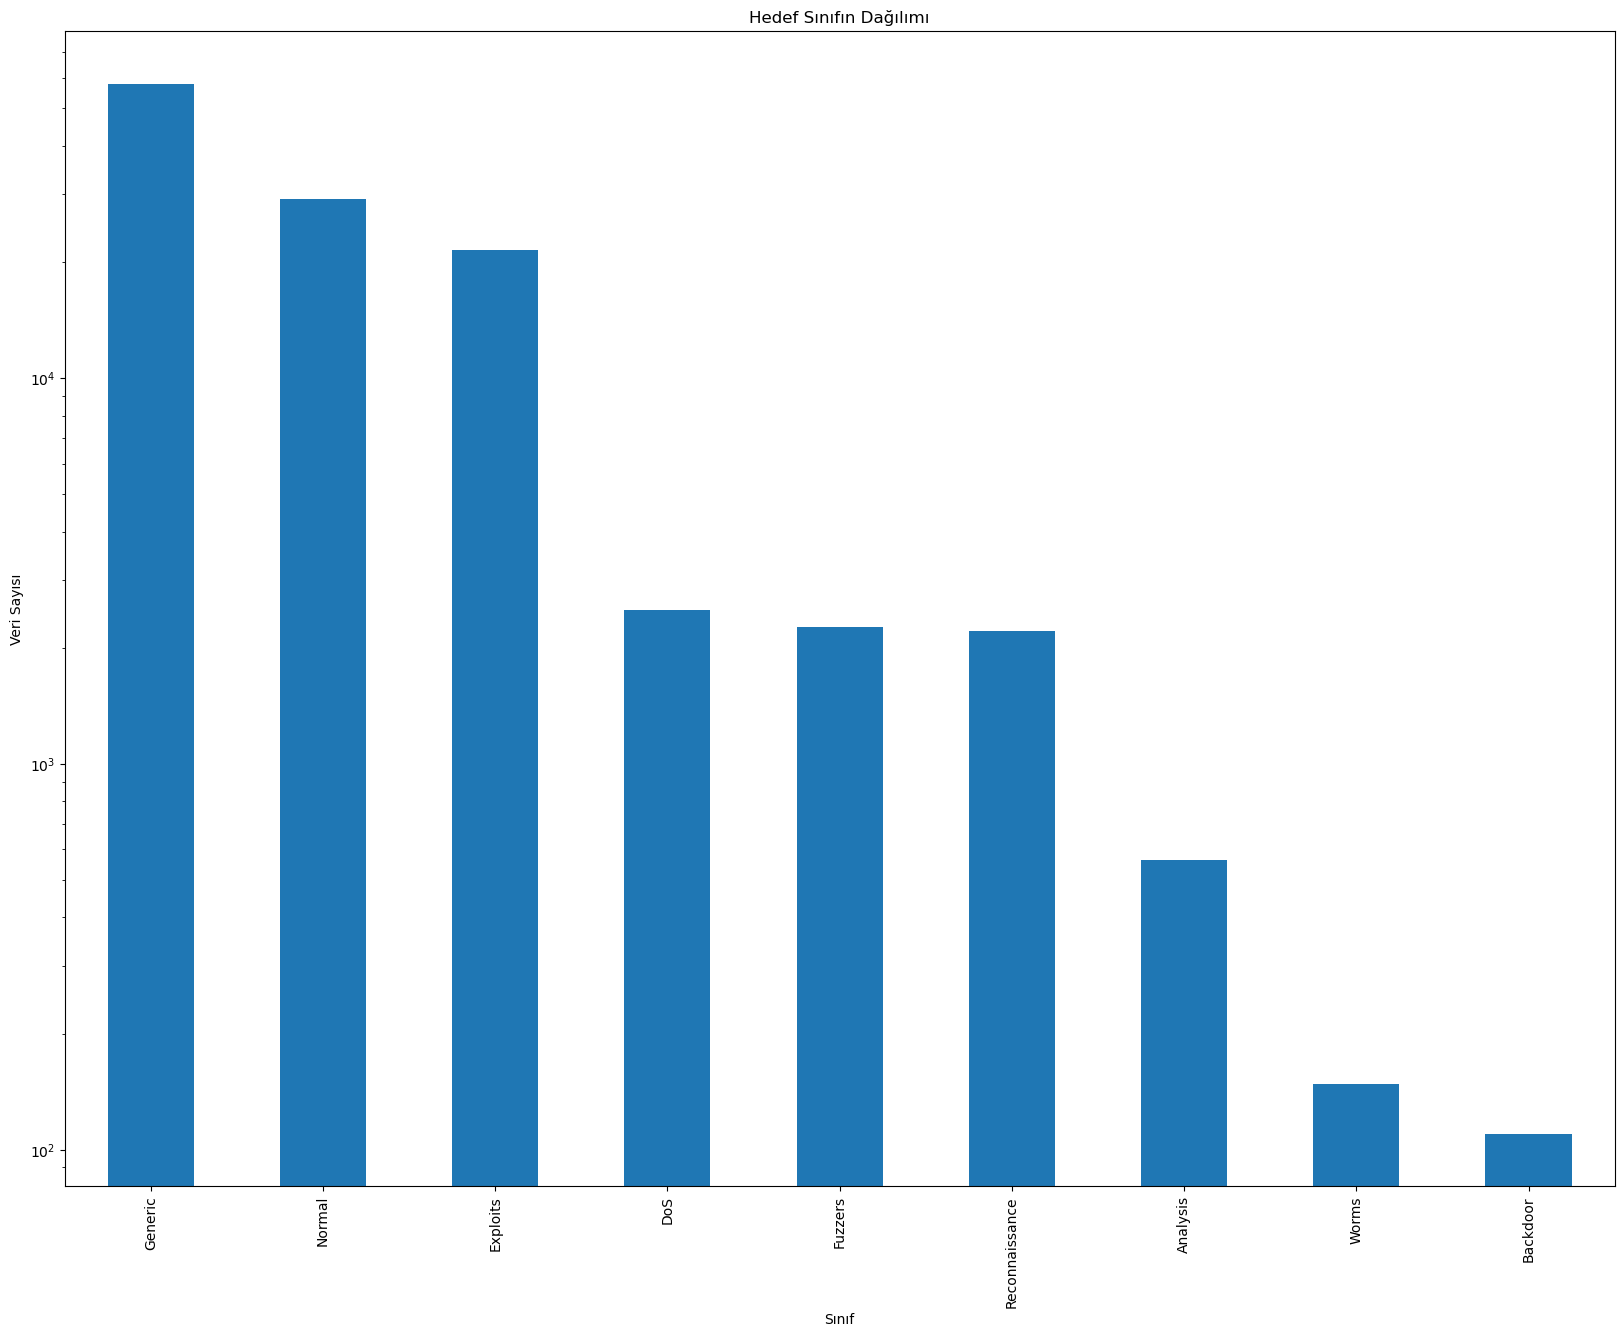

In [36]:
plt.figure(figsize=(20,15))
plt.yscale("log")
dist.plot(kind='bar')
plt.xlabel('Sınıf')
plt.ylabel('Veri Sayısı')
plt.title('Hedef Sınıfın Dağılımı')
plt.show()

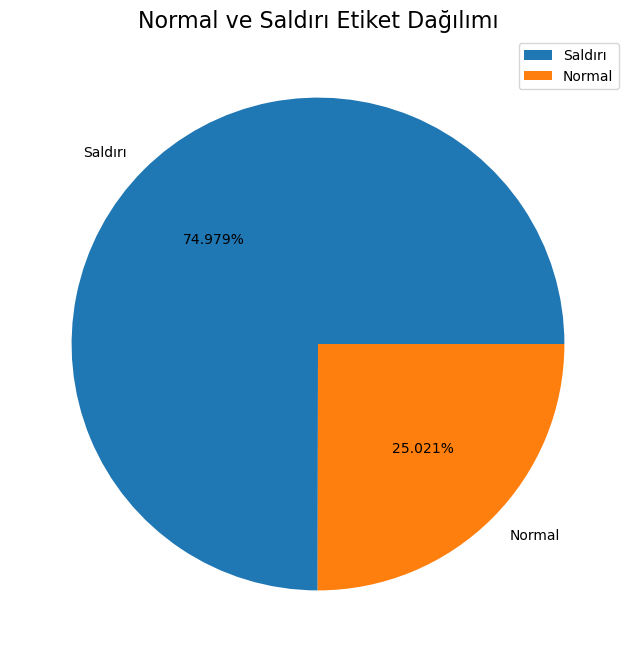

In [37]:
plt.figure(figsize=(8,8))
plt.pie(df.label.value_counts(),labels=['Saldırı','Normal'],autopct='%0.3f%%')
# LABEL -> NORMAL 0 - SALDIRI 1 ETİKETLENMİŞTİR
plt.title("Normal ve Saldırı Etiket Dağılımı",fontsize=16)
plt.legend()
#plt.savefig('plots/Pie_chart_binary.png')
plt.show()

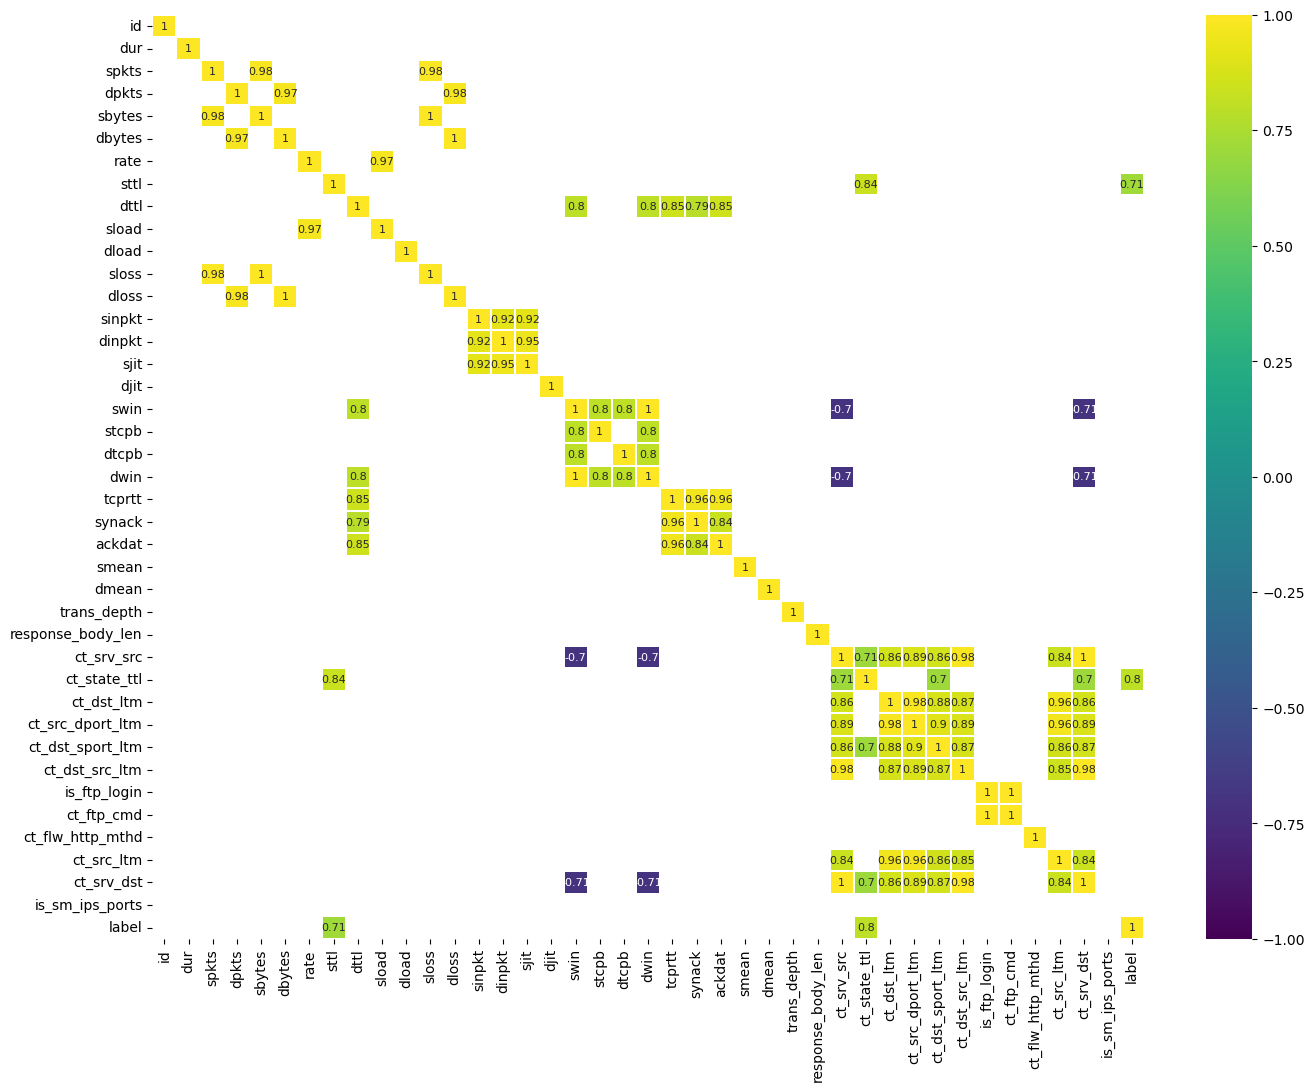

In [38]:
# Özellikler arasındaki ilişkiyi inceleme

df_num = df.select_dtypes(include = ['float64', 'int64'])
corr = df_num.corr()
plt.figure(figsize=(16, 12))

sns.heatmap(corr[(corr >= 0.7) | (corr <= -0.7)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8});

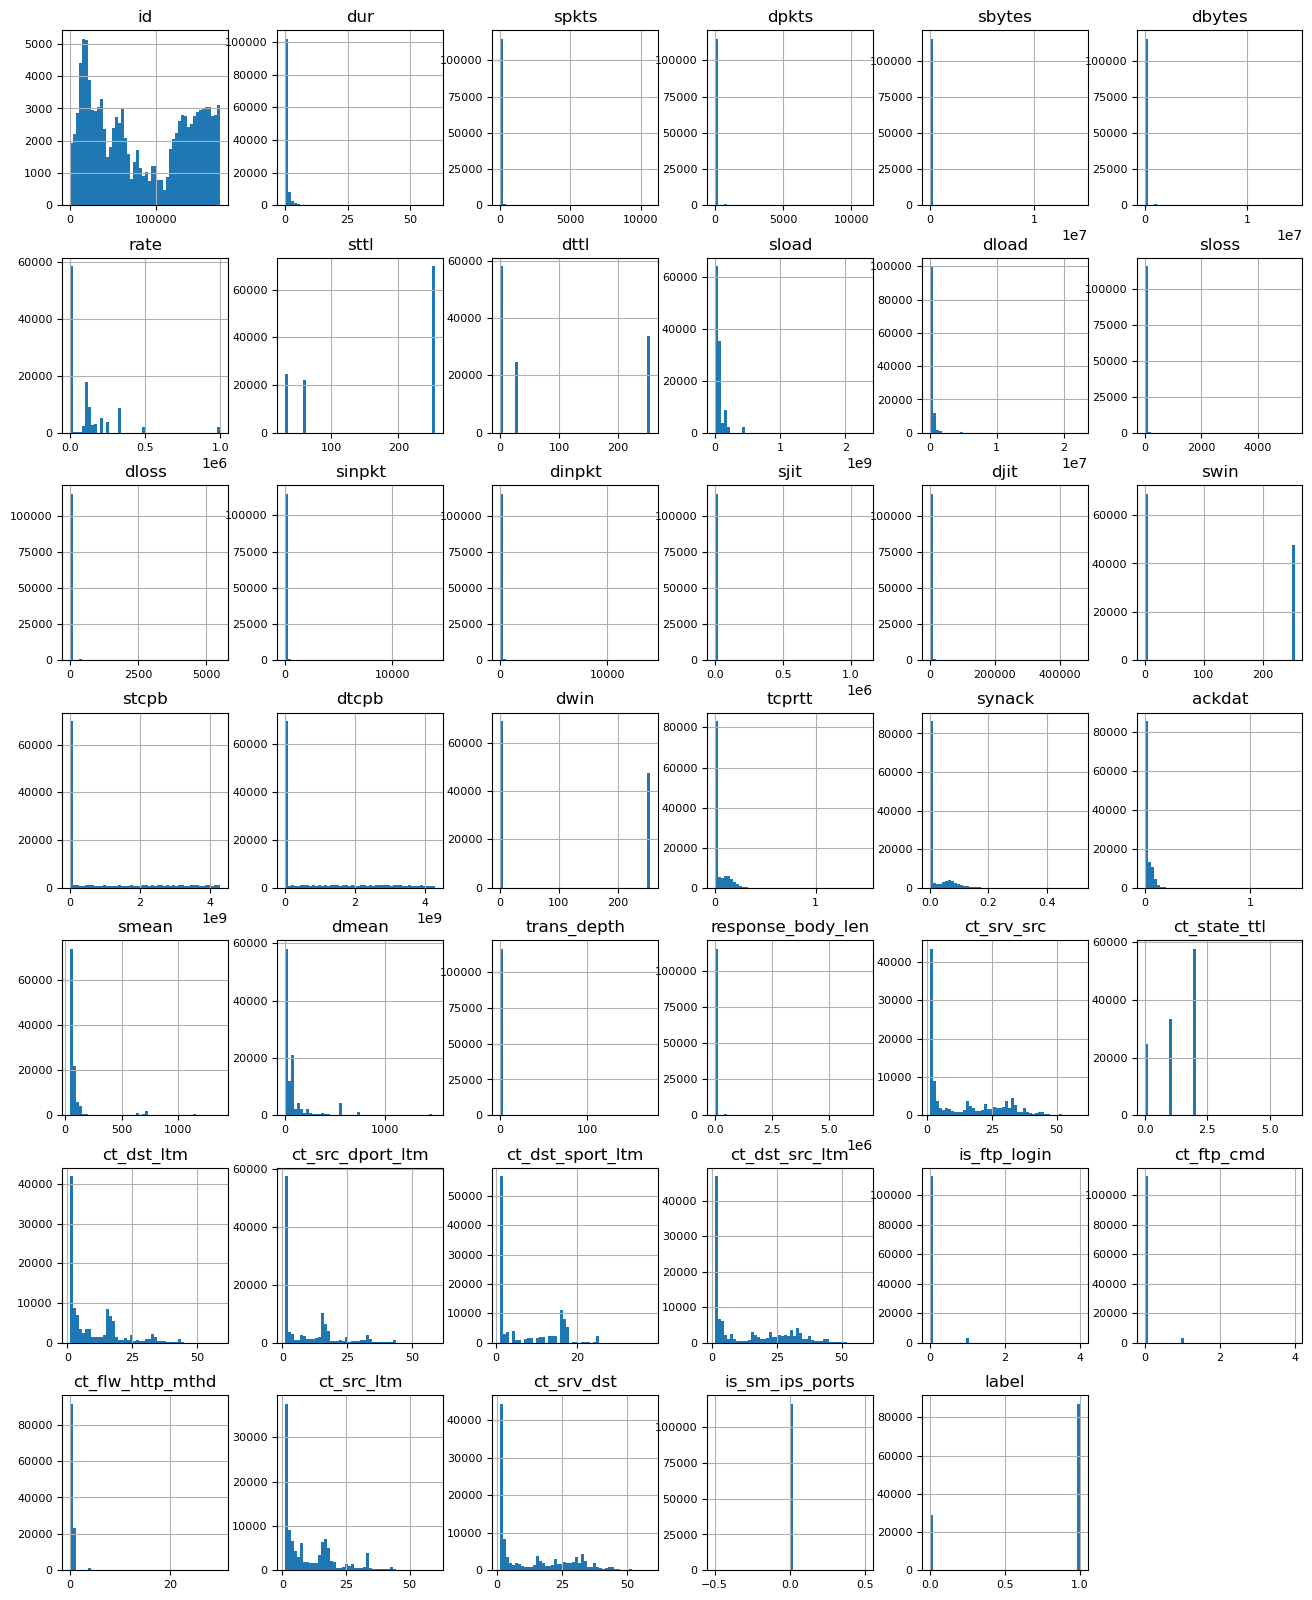

In [39]:
# Özelliklerin dağılımı
# "histogram" veri dağılımının bir temsilidir.
# Bu fonksiyon, DataFrame'deki her seride matplotlib.pyplot.hist'i çağırır ve sütun başına bir histogram oluşturur.
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [40]:
# Özelliklerde Doğrusal Ayrılabilirlik (Linear Seperability) neredeyse yoktur.
# PCA and t-sne denemesi

In [41]:
# t-SNE (t-Distributed Stochastic Neighbor Embedding)
# Denetimsiz lineer olmayan boyut azaltma ve veri görselleştirme algoritması
from sklearn.manifold import TSNE
tsne = TSNE(n_components = 2, perplexity = 50, n_iter = 1000)

In [42]:
# Verisetini hazırlama
frames = list()
for label in df['attack_cat'].unique():
    temp = df[df['attack_cat'] == label]
    if label == 'Normal' or label == 'Generic':     
        temp = temp.iloc[:10000, ]
    frames.append(temp)  
temp_df = pd.concat(frames)

# t-sne sadece sayısal değerler ile çalıştığı için
df_num = temp_df.select_dtypes(include = ['float64', 'int64'])
df_num.shape

(49283, 41)

In [43]:
tsne_df = tsne.fit_transform(df_num)
print(tsne_df.shape)

(49283, 2)


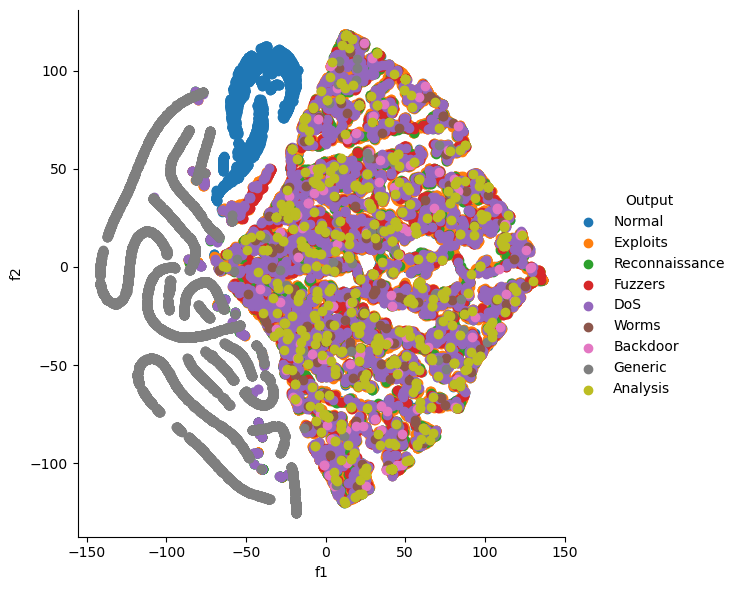

In [44]:
tsne_df = np.vstack((tsne_df.T, temp_df['attack_cat'].values)).T
tsne_dataset = pd.DataFrame(data=tsne_df, columns=['f1', 'f2', 'Output'])
sns.FacetGrid(tsne_dataset, hue='Output', height=6, aspect=1).map(plt.scatter, 'f1', 'f2').add_legend()
plt.show()

In [45]:
# PCA -> ( Principal Component Analysis) Temel Bileşenler Analizi
# Denetimsiz lineer boyut azaltma ve veri görselleştirme algoritması
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)

In [46]:
# PCA için veriyi standart hale getirme
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(df.select_dtypes(include = ['float64', 'int64']))

In [47]:
pca_df = pca.fit_transform(X)
pca_df.shape

(116352, 2)

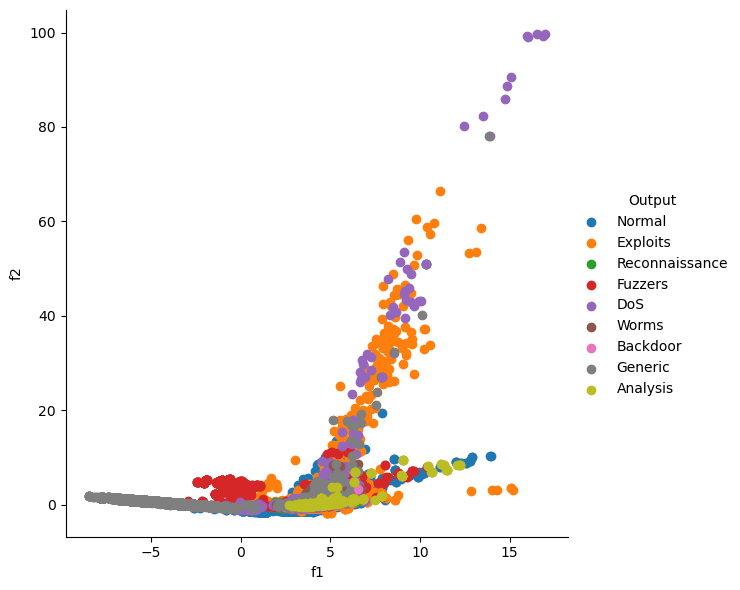

In [48]:
pca_df = np.vstack((pca_df.T, df['attack_cat'].values)).T
pca_dataset = pd.DataFrame(data=pca_df, columns=['f1', 'f2', 'Output'])
sns.FacetGrid(pca_dataset, hue='Output', height=6, aspect=1).map(plt.scatter, 'f1', 'f2').add_legend()
plt.show()

# Model Geliştirme

In [49]:
# Bu çalışmada "Normal" sınıfına ait noktaları bir sınıf (Positive Class),  kalan 22 saldırı sınıfı tek bir ikinci sınıf (Negative Class) olarak ele alınıp 
#Saldırı Tespiti “Binary Classification” olarak yapılmaktadır.
# Çünkü saldırı tiplerini doğru sınıflandırmaktansa bağlantıları saldırı ve normal olarak doğru sınıflandırabilmek daha önemlidir. 


# 'Target' tahmin edilecek son sütundur. NORMAL 1, SALDIRI 0 ETİKETLENDİ
target = []
for label in df['attack_cat'].values:
    if label == 'Normal':
        target.append(1)
    else:
        target.append(0)

In [50]:
#target

In [51]:
# numeric özellikler
num_col = df.select_dtypes(include='number').columns
num_col

Index(['id', 'dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl',
       'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit',
       'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat',
       'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src',
       'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm',
       'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd',
       'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports', 'label'],
      dtype='object')

In [52]:
# kategorik özellikler
cat_col = df.columns.difference(num_col)
cat_col = cat_col[1:]
cat_col

Index(['proto', 'service', 'state'], dtype='object')

In [53]:
# Gereksiz kolonları silme
df.drop(columns=['id'], inplace=True, axis=1)

In [54]:
df.drop(columns=['label'], inplace=True, axis=1)

In [55]:
df.drop(columns=['attack_cat'], inplace=True, axis=1)

In [56]:
df

dur proto service state  spkts  dpkts  sbytes  dbytes  \
35      0.983874   tcp    http   FIN     10      8     816    1172   
40      1.535254   tcp    http   FIN     10     10     826    1266   
45      1.059359   tcp    http   FIN     10      8     830    1134   
49      0.990548   tcp    http   FIN     10     10     804    1414   
72      1.303518   tcp    http   FIN     12      8     898    1120   
...          ...   ...     ...   ...    ...    ...     ...     ...   
257667  0.000006   udp     dns   INT      2      0     114       0   
257668  0.000009   udp     dns   INT      2      0     114       0   
257670  0.000009   udp     dns   INT      2      0     114       0   
257671  0.000009   udp     dns   INT      2      0     114       0   
257672  0.000009   udp     dns   INT      2      0     114       0   

                 rate  sttl  dttl         sload         dload  sloss  dloss  \
35          17.278635    62   252  5.976375e+03   8342.531250      2      2   
40          12.375802    62   252  3.876883e+03   5940.385254      2      2   
45          16.047441    62   252  5.641147e+03   7498.874512      2      2   
49          19.181301    62   252  5.847268e+03  10281.177730      2      2   
72          14.575939    62   252  5.057084e+03   6014.492676      2      2   
...               ...   ...   ...           ...           ...    ...    ...   
257667  166666.660800   254     0  7.600000e+07      0.000000      0      0   
257668  111111.107200   254     0  5.066666e+07      0.000000      0      0   
257670  111111.107200   254     0  5.066666e+07      0.000000      0      0   
257671  111111.107200   254     0  5.066666e+07      0.000000      0      0   
257672  111111.107200   254     0  5.066666e+07      0.000000      0      0   

            sinpkt      dinpkt          sjit        djit  swin       stcpb  \
35      109.319333  124.932859   5929.211713  192.590406   255   794167371   
40      170.481889  159.070562  11933.065600  244.118016   255   708428911   
45      117.706556  132.899281   6102.668305  255.756219   255  1853677305   
49      110.060889  100.616555   7172.956819  143.497953   255  1528762476   
72      118.501635  175.467000   6491.561713  252.408328   255  1182907296   
...            ...         ...           ...         ...   ...         ...   
257667    0.006000    0.000000      0.000000    0.000000     0           0   
257668    0.009000    0.000000      0.000000    0.000000     0           0   
257670    0.009000    0.000000      0.000000    0.000000     0           0   
257671    0.009000    0.000000      0.000000    0.000000     0           0   
257672    0.009000    0.000000      0.000000    0.000000     0           0   

             dtcpb  dwin    tcprtt    synack    ackdat  smean  dmean  \
35      1624757001   255  0.206572  0.108393  0.098179     82    147   
40      3141441573   255  0.180318  0.103612  0.076706     83    127   
45      1202418679   255  0.274887  0.128459  0.146428     83    142   
49      1066585482   255  0.181441  0.084249  0.097192     80    141   
72       802589817   255  0.140062  0.074510  0.065552     75    140   
...            ...   ...       ...       ...       ...    ...    ...   
257667           0     0  0.000000  0.000000  0.000000     57      0   
257668           0     0  0.000000  0.000000  0.000000     57      0   
257670           0     0  0.000000  0.000000  0.000000     57      0   
257671           0     0  0.000000  0.000000  0.000000     57      0   
257672           0     0  0.000000  0.000000  0.000000     57      0   

        trans_depth  response_body_len  ct_srv_src  ct_state_ttl  ct_dst_ltm  \
35                1                184           2             1           1   
40                1                187           2             1           1   
45                1                165           1             1           1   
49                1                261           2             1          18   
72                1  

In [57]:
# feature importance için verisetini hazırlama
df_feature = df.drop(cat_col, axis=1)
df_feature

dur  spkts  dpkts  sbytes  dbytes           rate  sttl  dttl  \
35      0.983874     10      8     816    1172      17.278635    62   252   
40      1.535254     10     10     826    1266      12.375802    62   252   
45      1.059359     10      8     830    1134      16.047441    62   252   
49      0.990548     10     10     804    1414      19.181301    62   252   
72      1.303518     12      8     898    1120      14.575939    62   252   
...          ...    ...    ...     ...     ...            ...   ...   ...   
257667  0.000006      2      0     114       0  166666.660800   254     0   
257668  0.000009      2      0     114       0  111111.107200   254     0   
257670  0.000009      2      0     114       0  111111.107200   254     0   
257671  0.000009      2      0     114       0  111111.107200   254     0   
257672  0.000009      2      0     114       0  111111.107200   254     0   

               sload         dload  sloss  dloss      sinpkt      dinpkt  \
35      5.976375e+03   8342.531250      2      2  109.319333  124.932859   
40      3.876883e+03   5940.385254      2      2  170.481889  159.070562   
45      5.641147e+03   7498.874512      2      2  117.706556  132.899281   
49      5.847268e+03  10281.177730      2      2  110.060889  100.616555   
72      5.057084e+03   6014.492676      2      2  118.501635  175.467000   
...              ...           ...    ...    ...         ...         ...   
257667  7.600000e+07      0.000000      0      0    0.006000    0.000000   
257668  5.066666e+07      0.000000      0      0    0.009000    0.000000   
257670  5.066666e+07      0.000000      0      0    0.009000    0.000000   
257671  5.066666e+07      0.000000      0      0    0.009000    0.000000   
257672  5.066666e+07      0.000000      0      0    0.009000    0.000000   

                sjit        djit  swin       stcpb       dtcpb  dwin  \
35       5929.211713  192.590406   255   794167371  1624757001   255   
40      11933.065600  244.118016   255   708428911  3141441573   255   
45       6102.668305  255.756219   255  1853677305  1202418679   255   
49       7172.956819  143.497953   255  1528762476  1066585482   255   
72       6491.561713  252.408328   255  1182907296   802589817   255   
...              ...         ...   ...         ...         ...   ...   
257667      0.000000    0.000000     0           0           0     0   
257668      0.000000    0.000000     0           0           0     0   
257670      0.000000    0.000000     0           0           0     0   
257671      0.000000    0.000000     0           0           0     0   
257672      0.000000    0.000000     0           0           0     0   

          tcprtt    synack    ackdat  smean  dmean  trans_depth  \
35      0.206572  0.108393  0.098179     82    147            1   
40      0.180318  0.103612  0.076706     83    127            1   
45      0.274887  0.128459  0.146428     83    142            1   
49      0.181441  0.084249  0.097192     80    141            1   
72      0.140062  0.074510  0.065552     75    140            1   
...          ...       ...       ...    ...    ...          ...   
257667  0.000000  0.000000  0.000000     57      0            0   
257668  0.000000  0.000000  0.000000     57      0            0   
257670  0.000000  0.000000  0.000000     57      0            0   
257671  0.000000  0.000000  0.000000     57      0            0   
257672  0.000000  0.000000  0.000000     57      0            0   

        response_body_len  ct_srv_src  ct_state_ttl  ct_dst_ltm  \
35                    184           2             1           1   
40                    187           2             1           1   
45                    165           1             1           1   
49                    261           2             1          18   
72                    157           1             1           1   
...                   ...         ...           ...         ...   
257667                  0          4

In [58]:
df_feature

dur  spkts  dpkts  sbytes  dbytes           rate  sttl  dttl  \
35      0.983874     10      8     816    1172      17.278635    62   252   
40      1.535254     10     10     826    1266      12.375802    62   252   
45      1.059359     10      8     830    1134      16.047441    62   252   
49      0.990548     10     10     804    1414      19.181301    62   252   
72      1.303518     12      8     898    1120      14.575939    62   252   
...          ...    ...    ...     ...     ...            ...   ...   ...   
257667  0.000006      2      0     114       0  166666.660800   254     0   
257668  0.000009      2      0     114       0  111111.107200   254     0   
257670  0.000009      2      0     114       0  111111.107200   254     0   
257671  0.000009      2      0     114       0  111111.107200   254     0   
257672  0.000009      2      0     114       0  111111.107200   254     0   

               sload         dload  sloss  dloss      sinpkt      dinpkt  \
35      5.976375e+03   8342.531250      2      2  109.319333  124.932859   
40      3.876883e+03   5940.385254      2      2  170.481889  159.070562   
45      5.641147e+03   7498.874512      2      2  117.706556  132.899281   
49      5.847268e+03  10281.177730      2      2  110.060889  100.616555   
72      5.057084e+03   6014.492676      2      2  118.501635  175.467000   
...              ...           ...    ...    ...         ...         ...   
257667  7.600000e+07      0.000000      0      0    0.006000    0.000000   
257668  5.066666e+07      0.000000      0      0    0.009000    0.000000   
257670  5.066666e+07      0.000000      0      0    0.009000    0.000000   
257671  5.066666e+07      0.000000      0      0    0.009000    0.000000   
257672  5.066666e+07      0.000000      0      0    0.009000    0.000000   

                sjit        djit  swin       stcpb       dtcpb  dwin  \
35       5929.211713  192.590406   255   794167371  1624757001   255   
40      11933.065600  244.118016   255   708428911  3141441573   255   
45       6102.668305  255.756219   255  1853677305  1202418679   255   
49       7172.956819  143.497953   255  1528762476  1066585482   255   
72       6491.561713  252.408328   255  1182907296   802589817   255   
...              ...         ...   ...         ...         ...   ...   
257667      0.000000    0.000000     0           0           0     0   
257668      0.000000    0.000000     0           0           0     0   
257670      0.000000    0.000000     0           0           0     0   
257671      0.000000    0.000000     0           0           0     0   
257672      0.000000    0.000000     0           0           0     0   

          tcprtt    synack    ackdat  smean  dmean  trans_depth  \
35      0.206572  0.108393  0.098179     82    147            1   
40      0.180318  0.103612  0.076706     83    127            1   
45      0.274887  0.128459  0.146428     83    142            1   
49      0.181441  0.084249  0.097192     80    141            1   
72      0.140062  0.074510  0.065552     75    140            1   
...          ...       ...       ...    ...    ...          ...   
257667  0.000000  0.000000  0.000000     57      0            0   
257668  0.000000  0.000000  0.000000     57      0            0   
257670  0.000000  0.000000  0.000000     57      0            0   
257671  0.000000  0.000000  0.000000     57      0            0   
257672  0.000000  0.000000  0.000000     57      0            0   

        response_body_len  ct_srv_src  ct_state_ttl  ct_dst_ltm  \
35                    184           2             1           1   
40                    187           2             1           1   
45                    165           1             1           1   
49                    261           2             1          18   
72                    157           1             1           1   
...                   ...         ...           ...         ...   
257667                  0          4

In [59]:
new_features = df_feature.columns.tolist()

In [60]:
new_features

['dur',
 'spkts',
 'dpkts',
 'sbytes',
 'dbytes',
 'rate',
 'sttl',
 'dttl',
 'sload',
 'dload',
 'sloss',
 'dloss',
 'sinpkt',
 'dinpkt',
 'sjit',
 'djit',
 'swin',
 'stcpb',
 'dtcpb',
 'dwin',
 'tcprtt',
 'synack',
 'ackdat',
 'smean',
 'dmean',
 'trans_depth',
 'response_body_len',
 'ct_srv_src',
 'ct_state_ttl',
 'ct_dst_ltm',
 'ct_src_dport_ltm',
 'ct_dst_sport_ltm',
 'ct_dst_src_ltm',
 'is_ftp_login',
 'ct_ftp_cmd',
 'ct_flw_http_mthd',
 'ct_src_ltm',
 'ct_srv_dst',
 'is_sm_ips_ports']

In [61]:
new_features = np.asarray(new_features)

In [62]:
new_features

array(['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl',
       'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt',
       'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt',
       'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports'], dtype='<U17')

In [63]:
len(new_features)

39

In [64]:
# xgboost for feature importance on a regression problem
from sklearn.datasets import make_regression
from xgboost import XGBRegressor
from matplotlib import pyplot

# define the model
model = XGBRegressor()
# fit the model
model.fit(df_feature, target)

# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.00021
Feature: 1, Score: 0.00042
Feature: 2, Score: 0.00266
Feature: 3, Score: 0.00128
Feature: 4, Score: 0.00365
Feature: 5, Score: 0.00042
Feature: 6, Score: 0.90539
Feature: 7, Score: 0.00001
Feature: 8, Score: 0.00136
Feature: 9, Score: 0.00168
Feature: 10, Score: 0.00188
Feature: 11, Score: 0.00151
Feature: 12, Score: 0.00065
Feature: 13, Score: 0.00053
Feature: 14, Score: 0.00085
Feature: 15, Score: 0.00050
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00049
Feature: 18, Score: 0.00040
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00092
Feature: 21, Score: 0.00049
Feature: 22, Score: 0.00043
Feature: 23, Score: 0.00226
Feature: 24, Score: 0.01089
Feature: 25, Score: 0.00383
Feature: 26, Score: 0.02357
Feature: 27, Score: 0.00074
Feature: 28, Score: 0.01231
Feature: 29, Score: 0.00072
Feature: 30, Score: 0.00075
Feature: 31, Score: 0.00172
Feature: 32, Score: 0.00883
Feature: 33, Score: 0.00147
Feature: 34, Score: 0.00000
Feature: 35, Score: 0.00199
Fe

In [65]:
plt.rcParams['figure.figsize'] = [18, 16]

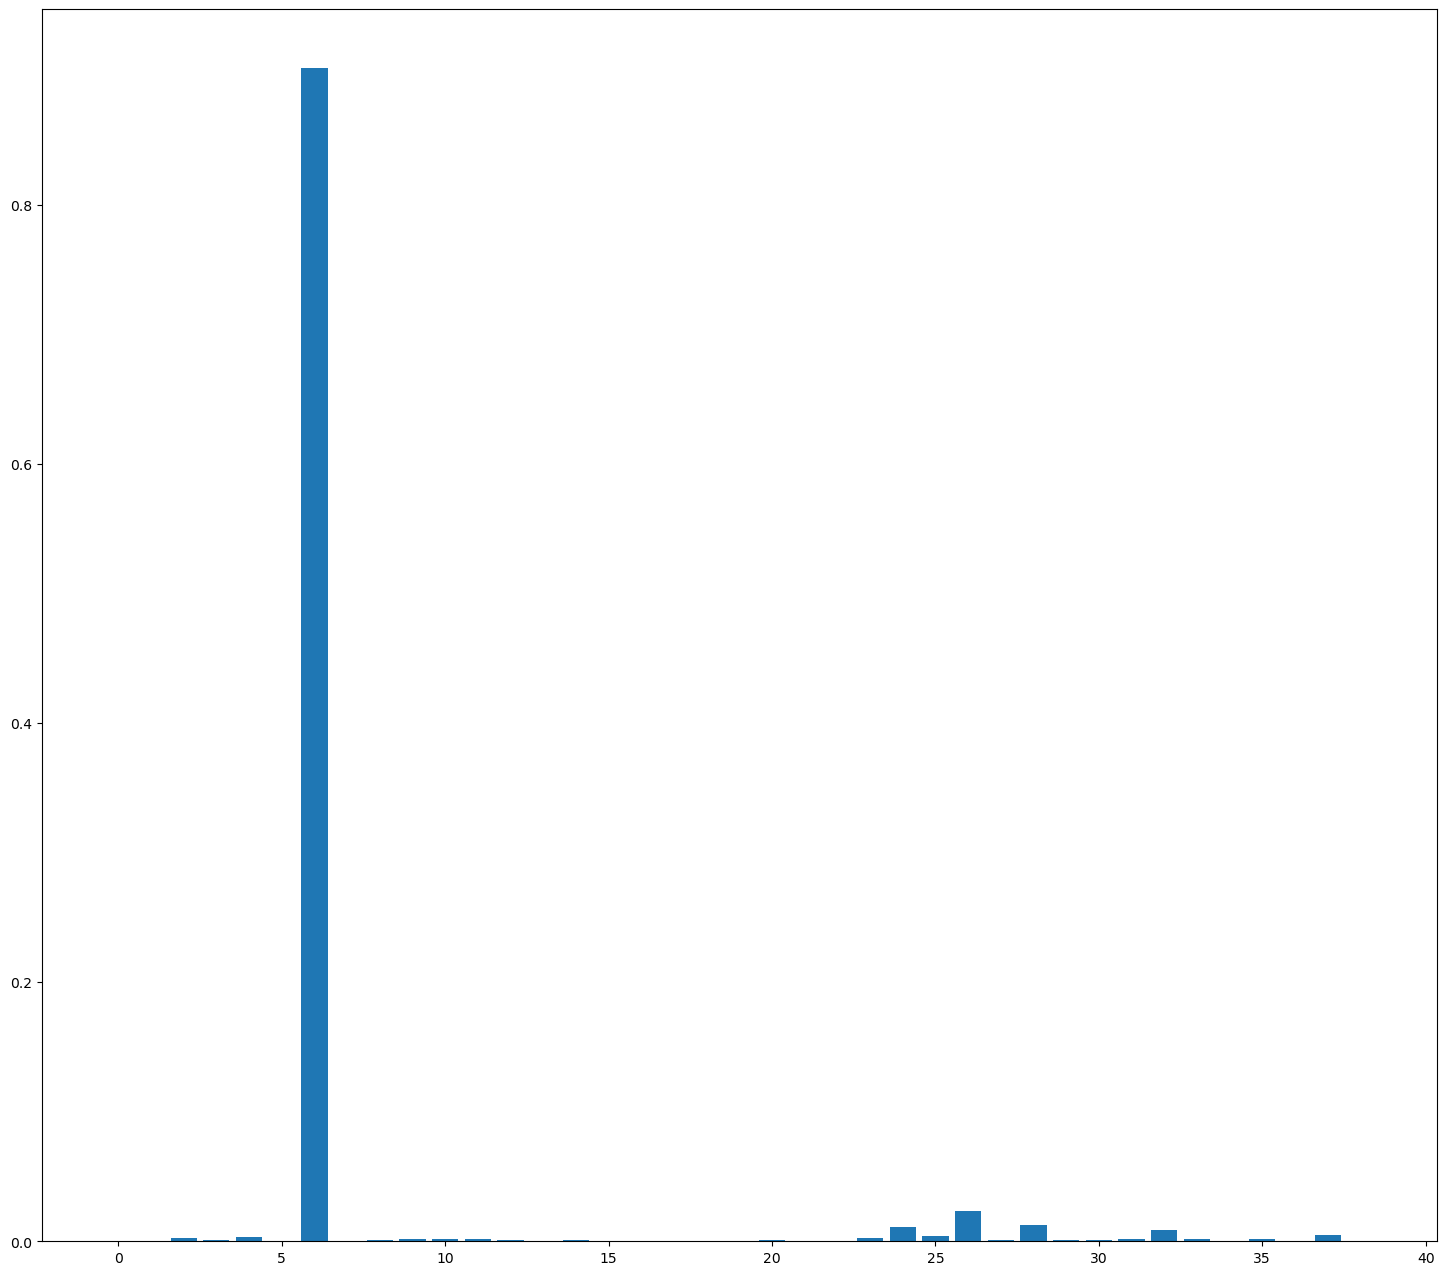

In [66]:
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Text(0.5, 0, 'Xgboost Feature Importance')

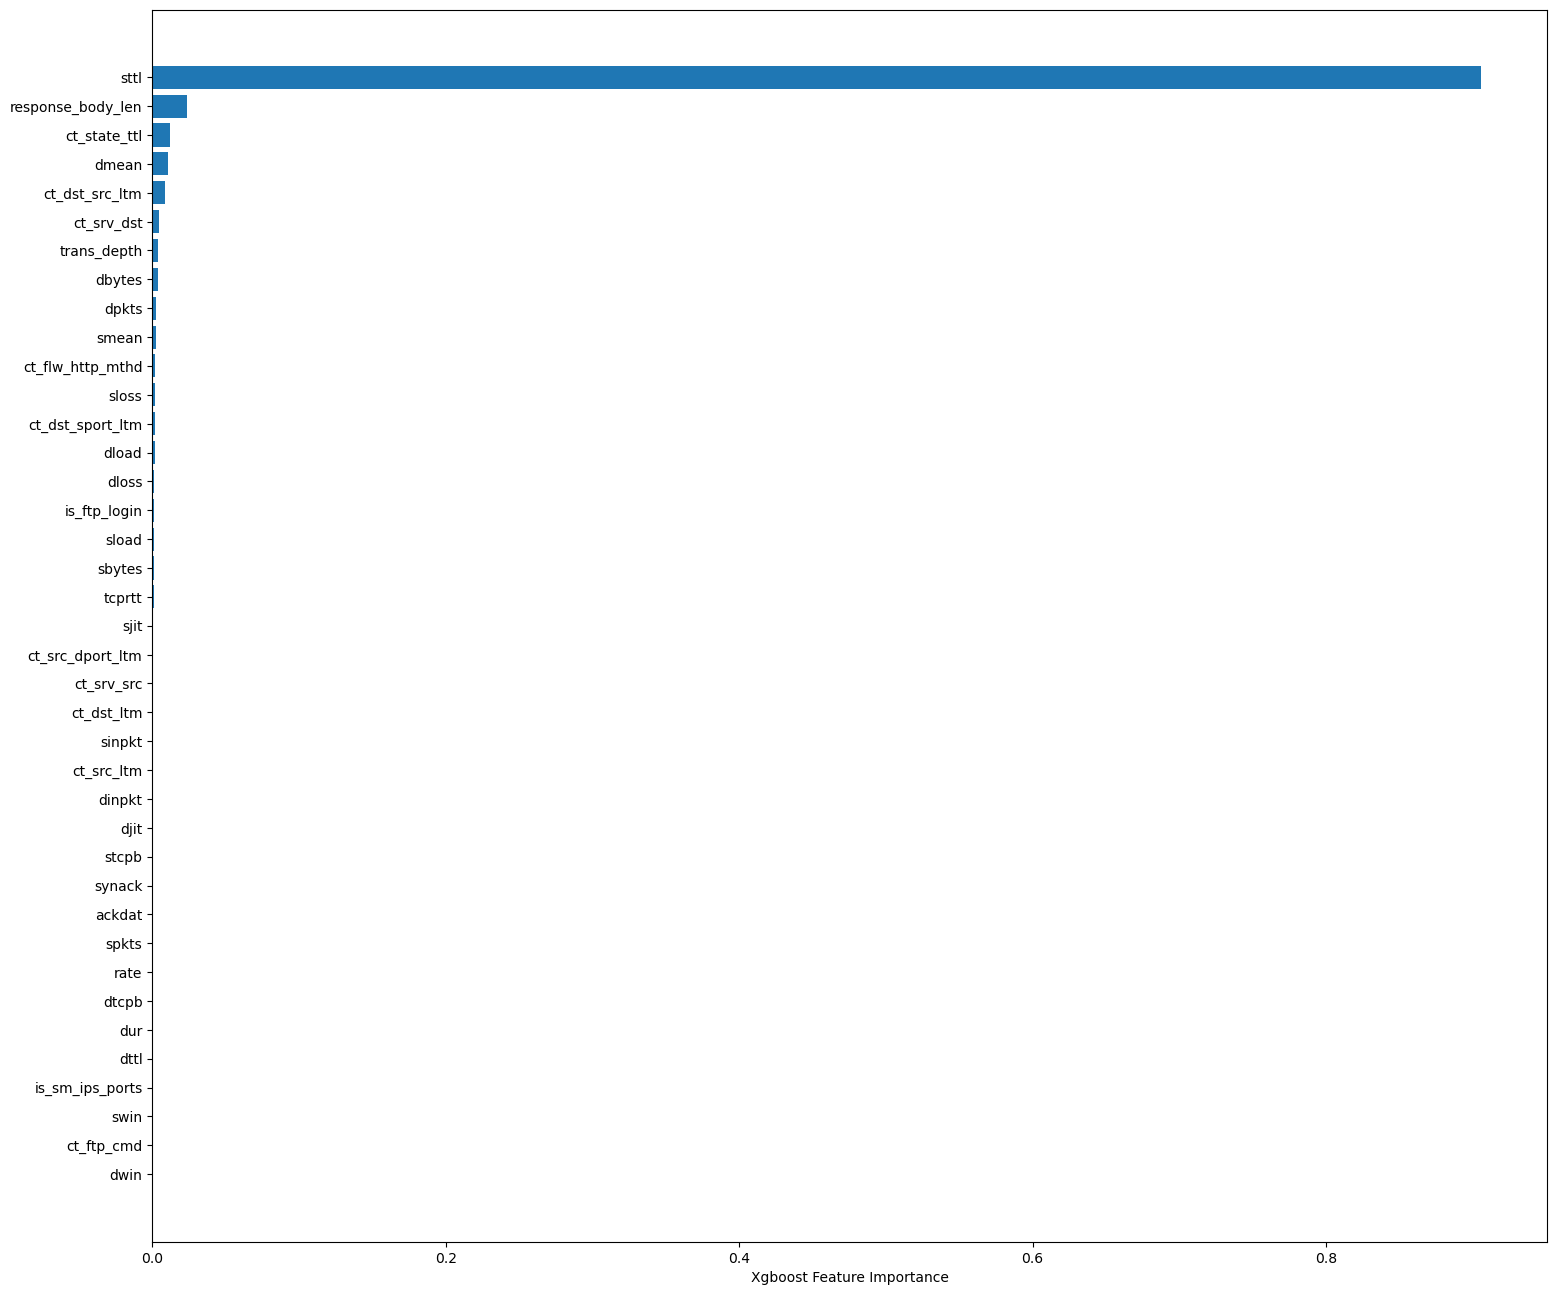

In [67]:
sorted_idx = model.feature_importances_.argsort()
plt.barh(new_features[sorted_idx], model.feature_importances_[sorted_idx])
plt.xlabel("Xgboost Feature Importance")

In [68]:
# sttl		Source to destination time to live value -> En önemli özellik

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(RandomForestClassifier(n_estimators = 5, random_state=42))
sel.fit(df_feature, target)
selected_feat = df_feature.columns[(sel.get_support())]
print(selected_feat)
print(len(selected_feat))

Index(['dur', 'sttl', 'dttl', 'dload', 'tcprtt', 'synack', 'dmean',
       'ct_dst_ltm', 'ct_dst_sport_ltm'],
      dtype='object')
9


<Axes: >

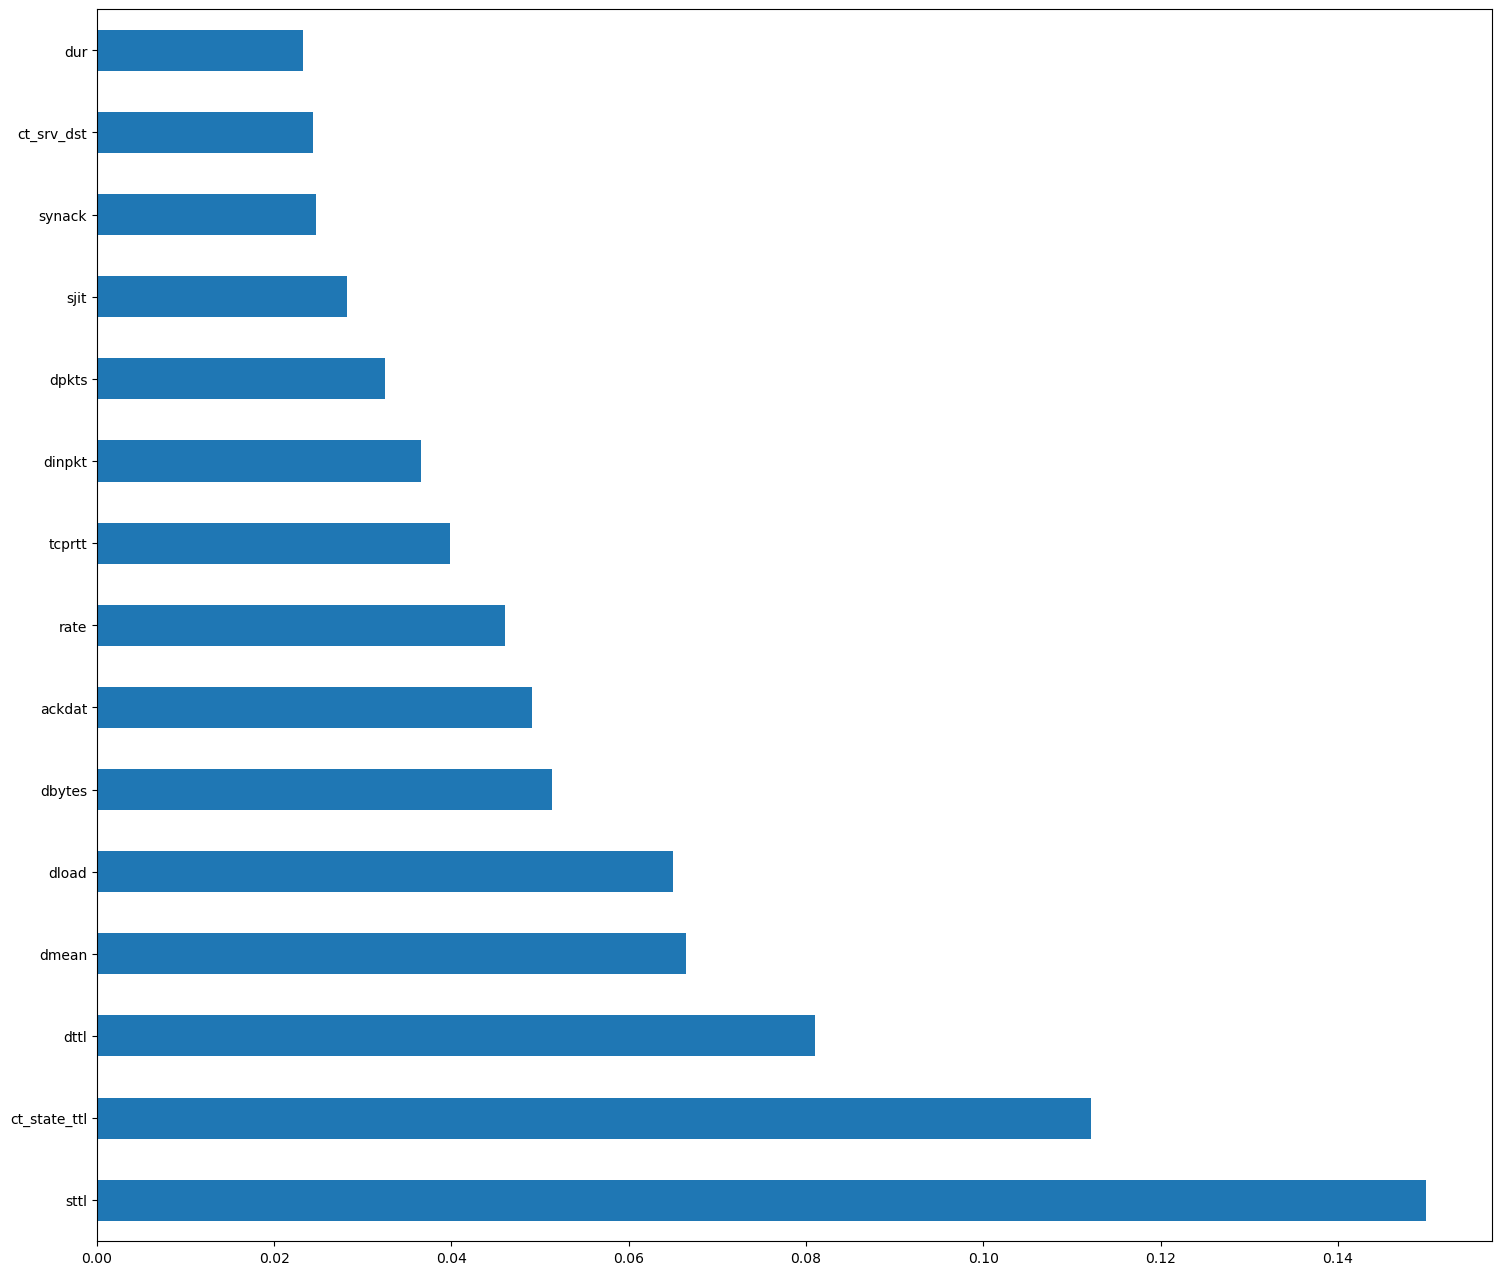

In [70]:
model = RandomForestClassifier()
model.fit(df_feature, target)
(pd.Series(model.feature_importances_, index=df_feature.columns)
   .nlargest(15)
   .plot(kind='barh')) 

In [71]:
# Kullanılacak fonksiyonlar

# sınıf dağılımını korumak için katmanlaştırma özelliğine (stratify feature) sahip eğitim-test bölme fonksiyonu
def train_test(df, stratify_col, split):
    train_indices, test_indices = np.array([]), np.array([])
    
    for class_name, val in df[stratify_col].value_counts().items(): 
        class_samples_indices = df[df[stratify_col] == class_name].index.values
        
        class_test_indices = np.random.choice(class_samples_indices,
                            size = int(np.ceil(split * val)), replace = False)
        class_train_indices = np.setdiff1d(class_samples_indices, class_test_indices)
        
        test_indices = np.append(test_indices, class_test_indices)
        train_indices = np.append(train_indices, class_train_indices)

    print(test_indices.shape, train_indices.shape)
    x_train = df.iloc[train_indices, :-1]
    y_train = df.iloc[train_indices, -1]
    x_test = df.iloc[test_indices, :-1]
    y_test = df.iloc[test_indices, -1]
    
    return x_train, y_train, x_test, y_test

# Karışıklık Matrisi (confusion matrix) yazdırma ve FP döndürme
# Normal 1 - Saldırı 0
def confusion_matrix(y_test, y_pred, model):
    tp, tn, fp, fn = 0, 0, 0, 0
    for i in range(len(y_test)):
        # Gerçek sınıfı normal ve normal tahmin edilmişse
        if y_test[i] == 1 and y_pred[i] == 1:
            tp += 1
        
        # Gerçek sınıfı saldırı ve saldırı tahmin edilmişse
        if y_test[i] == 0 and y_pred[i] == 0:
            tn += 1
            
        # Gerçek sınıfı saldırı ama normal tahmin edilmişse
        if y_test[i] == 0 and y_pred[i] == 1:
            fp += 1
            
        # Gerçek sınıfı normal ama saldırı tahmin edilmişse
        if y_test[i] == 1 and y_pred[i] == 0:
            fn += 1
            
    matrix = [[tn, fp], [fn, tp]]
    cm_df = pd.DataFrame(matrix)
    labels = ['SALDIRI', 'NORMAL']
    plt.figure(figsize=(3,3))
    sns.heatmap(cm_df, annot=True, annot_kws={"size":12}, fmt='g', xticklabels=labels, yticklabels=labels)
    plt.ylabel('Gerçek Sınıf')
    plt.xlabel('Tahmin Edilen Sınıf')
    plt.title(model)
    plt.show()
    
    return fp

# Accuracy hesaplama
def accuracy(y_test, y_pred):
    return round(np.sum(y_test == y_pred)/y_test.shape[0] * 100, 2)

***Verisetini Hazırlama***

In [72]:
# Verisetini eğitim ve test için hazırlama
# Özellik Seçimi - PCA Boyut İndirgeme (Dimensionality Reduction)
df_dataset = df.select_dtypes(include = ['float64', 'int64'])

# Dönüştürülmüş bileşenlerin minumum varyansı
var_threshold = 0.98
pca_obj = PCA(n_components=var_threshold)
num_features_transformed = pca_obj.fit_transform(StandardScaler().fit_transform(df_dataset)) 

df_dataset = pd.DataFrame(num_features_transformed)

# Kategorik özelliklerin one-hot encoding ile vektörize edilmesi
# Verisetindeki kategorik özellikler -> 'protocol_type', 'service', 'flag'

from sklearn.feature_extraction.text import CountVectorizer

# proto
vocab = list(set(list(df['proto'].values)))
one_hot = CountVectorizer(vocabulary=vocab, binary=True)
proto_final = one_hot.fit_transform(df['proto'].values)

# service
vocab = list(set(list(df['service'].values)))
one_hot = CountVectorizer(vocabulary=vocab, binary=True)
service_final = one_hot.fit_transform(df['service'].values)

# state
vocab = list(set(list(df['state'].values)))
one_hot = CountVectorizer(vocabulary=vocab, binary=True)
state_final = one_hot.fit_transform(df['state'].values)

# Sayısal ve kategorik özelliklerin birleştirilmesi
from scipy.sparse import hstack
df_dataset = hstack((df_dataset, proto_final, service_final, state_final))
df_dataset = pd.DataFrame(df_dataset.toarray())
df_dataset['target'] = target
df_dataset.to_pickle('dataset.pkl')

df = pd.read_pickle('dataset.pkl')
df

0         1         2         3         4         5         6  \
0       4.427301 -0.792273  1.423011  0.015327 -2.075532 -0.746223  0.691676   
1       4.473875 -0.728996  1.516827 -0.135841 -1.623974 -0.677898  0.428558   
2       5.114551 -0.884838  2.099186  0.055800 -3.065959 -0.831108  0.892633   
3       3.885243 -0.665972  1.364032 -0.051769 -1.940598 -0.627509  0.108067   
4       3.887833 -0.693214  0.882116 -0.068715 -1.002413 -0.647749  0.507383   
...          ...       ...       ...       ...       ...       ...       ...   
116347 -5.447143  0.596385  1.248544 -0.334344 -1.171287  0.296329 -2.023355   
116348 -3.454501  0.175398  0.329115 -0.078921 -0.258974  0.074519 -0.698686   
116349 -1.077656 -0.360822 -0.837833  0.259600  0.919388 -0.267720  1.572504   
116350 -4.216654  0.345311  0.699236 -0.186459 -0.632140  0.180558 -1.408033   
116351 -4.282945  0.358900  0.729784 -0.194030 -0.661937  0.186505 -1.445336   

               7         8         9        10        11        12        13  \
0      -0.523118  0.587371 -0.676338 -0.788714  0.248103 -0.643469  0.469491   
1      -0.308540  0.390828 -0.353863 -0.632055  0.146201 -0.385135  0.231799   
2      -0.640225  0.480443 -1.145557 -0.996560  0.474568 -0.884767  0.655419   
3      -0.411906  0.482115 -0.457394 -0.663179  0.149115 -0.578586  0.370551   
4      -0.401828  0.650912 -0.197591 -0.561545  0.065126 -0.398060  0.234157   
...          ...       ...       ...       ...       ...       ...       ...   
116347 -0.320959 -0.208311  0.010287  0.019341 -0.023751 -0.148278  0.097502   
116348 -0.670767  0.093697  0.004414  0.025613  0.020878 -0.017597  0.016028   
116349 -0.694898  0.489562 -0.020476  0.006419  0.089692  0.187437 -0.107491   
116350 -0.669520 -0.024559  0.011119  0.028710  0.002072 -0.082578  0.056577   
116351 -0.668089 -0.028801  0.010835  0.030282  0.000877 -0.081141  0.055131   

              14        15        16        17        18        19   20   21  \
0       0.825251 -0.729652  0.140861 -0.436214  0.452351 -0.268879  0.0  1.0   
1       0.305225 -0.580640  0.391417 -1.308193  0.585427  0.029660  0.0  1.0   
2       1.164781 -0.921275  0.396291  0.358362  0.488894  0.125177  0.0  1.0   
3       0.678114 -0.906675  0.451198  0.245865 -0.071170 -0.511055  0.0  1.0   
4       0.432889 -0.622294  0.129698  0.206968  0.061957 -0.739504  0.0  1.0   
...          ...       ...       ...       ...       ...       ...  ...  ...   
116347  0.094810 -0.243317 -0.040238  0.017183  0.561914 -0.317986  1.0  0.0   
116348 -0.000960 -0.050370  0.222629 -0.020825 -0.594296  0.077258  1.0  0.0   
116349 -0.289094  0.792649 -0.381755  0.004836  0.116286  0.156700  1.0  0.0   
116350  0.072711 -0.249358  0.301137 -0.019037 -0.505652 -0.050422  1.0  0.0   
116351  0.071960 -0.250820  0.303748 -0.020153 -0.562075  0.003200  1.0  0.0   

         22   23   24   25   26   27   28   29   30   31   32   33   34   35  \
0       0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1       0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2       0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3       0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4       0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
...     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
116347  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
116348  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
116349  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
116350  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
116351  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

         36   37   38   39  target  
0       0.0  0.0  0.0  0.0       1  
1       0.0  0.0  0.0  0.0       1  
2       0.0  0.0  0.0  0.0       1  
3       0.0  0.0  0.0  

# Model Eğitim ve Testi

In [73]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

x_train1, y_train1, x_test1, y_test1 = train_test(df=df, stratify_col='target', split=0.20)

(23271,) (93081,)


In [74]:
# xgboost feature importance 
from sklearn.datasets import make_regression
from xgboost import XGBRegressor
from matplotlib import pyplot


model = XGBRegressor()

model.fit(x_test1, y_test1)

zero_importance_columns = []

# importance
importance = model.feature_importances_
# feature importance özeti
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    # drop edilecek kolonları al
    #if v == 0:
    if v < 0.01:
        zero_importance_columns.append(i)

Feature: 0, Score: 0.00535
Feature: 1, Score: 0.00613
Feature: 2, Score: 0.07774
Feature: 3, Score: 0.00924
Feature: 4, Score: 0.55316
Feature: 5, Score: 0.00989
Feature: 6, Score: 0.08585
Feature: 7, Score: 0.00635
Feature: 8, Score: 0.01523
Feature: 9, Score: 0.00782
Feature: 10, Score: 0.04458
Feature: 11, Score: 0.01363
Feature: 12, Score: 0.00691
Feature: 13, Score: 0.00311
Feature: 14, Score: 0.00824
Feature: 15, Score: 0.00728
Feature: 16, Score: 0.02215
Feature: 17, Score: 0.00373
Feature: 18, Score: 0.01958
Feature: 19, Score: 0.00528
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.02528
Feature: 23, Score: 0.02385
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.03563
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00267
Feature: 30, Score: 0.00046
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00086
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score: 0.00000
Fe

In [75]:
zero_importance_columns

[0,
 1,
 3,
 5,
 7,
 9,
 12,
 13,
 14,
 15,
 17,
 19,
 20,
 21,
 24,
 25,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39]

In [76]:
len(zero_importance_columns)

29

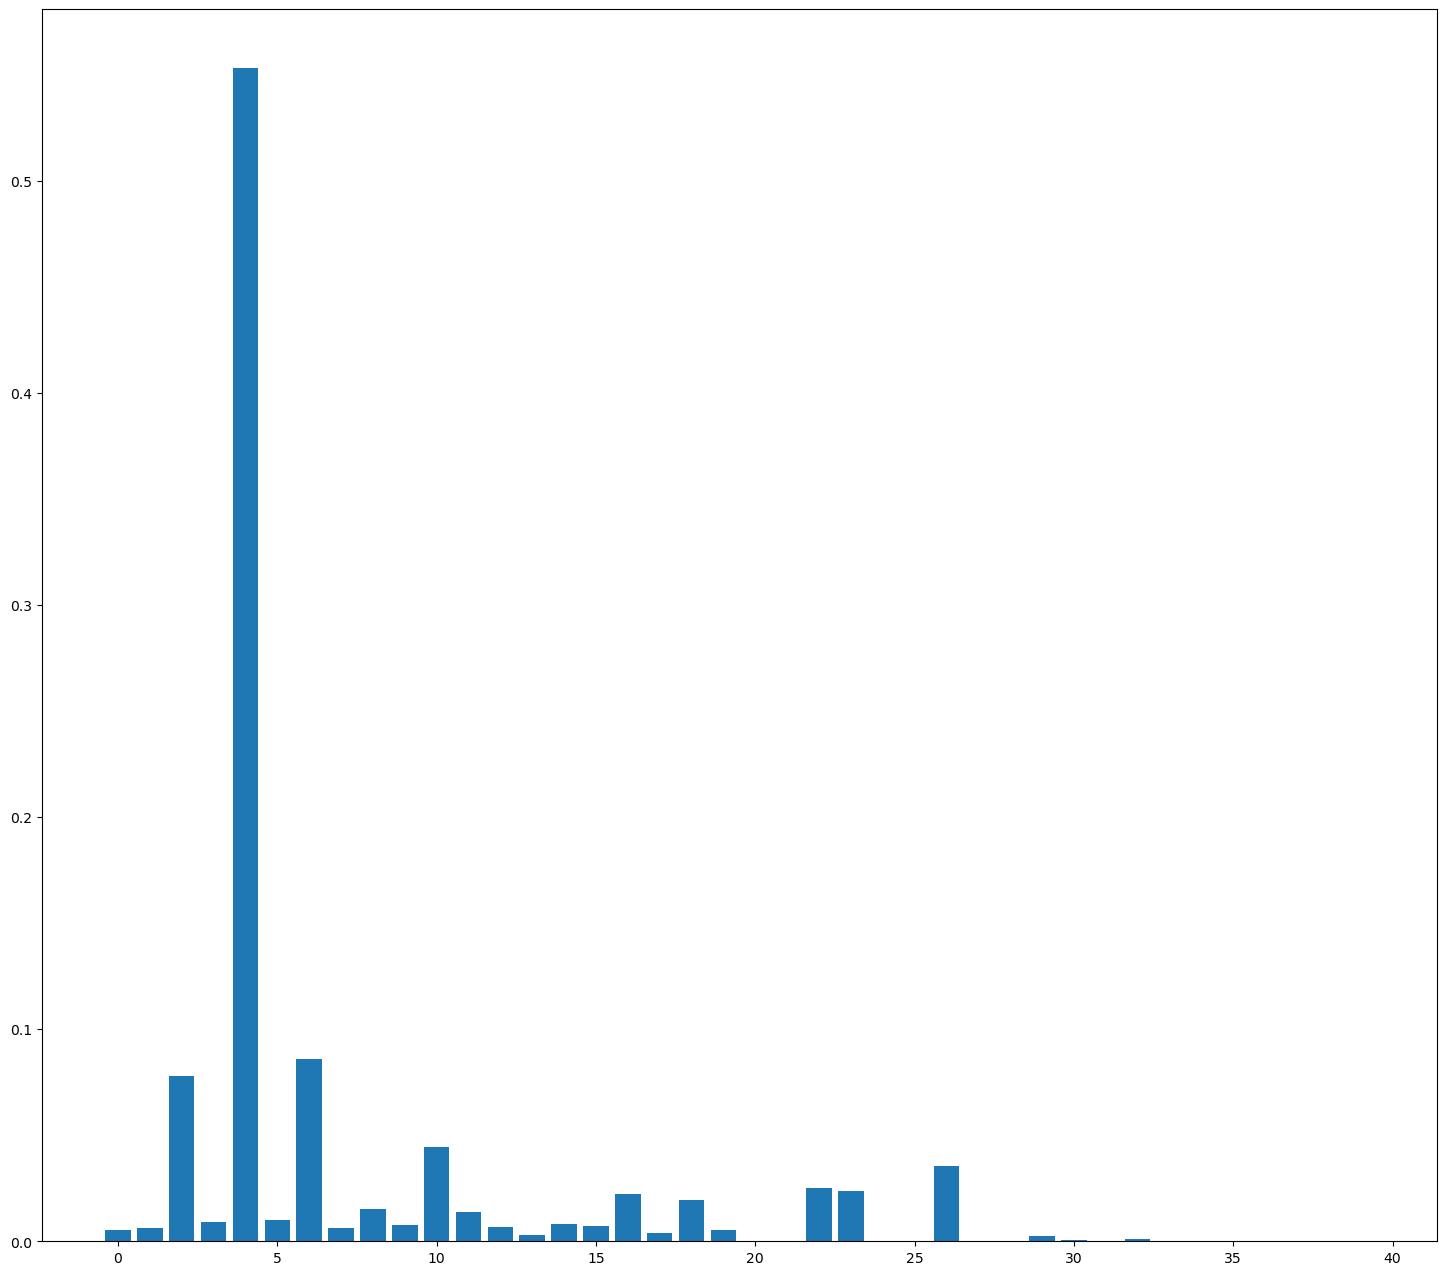

In [77]:
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [78]:
#zero_importance_columns = np.asarray(zero_importance_columns)

In [79]:
zero_importance_columns

[0,
 1,
 3,
 5,
 7,
 9,
 12,
 13,
 14,
 15,
 17,
 19,
 20,
 21,
 24,
 25,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39]

In [80]:
# Feature importance 0 olan sütunları drop
#df.drop(df.columns[[20,21,22,26,27,30,34,35,36,37,38,39]], axis=1, inplace=True)
df.drop(labels=zero_importance_columns, axis=1, inplace=True)

In [81]:
df

2         4         6         8        10        11        16  \
0       1.423011 -2.075532  0.691676  0.587371 -0.788714  0.248103  0.140861   
1       1.516827 -1.623974  0.428558  0.390828 -0.632055  0.146201  0.391417   
2       2.099186 -3.065959  0.892633  0.480443 -0.996560  0.474568  0.396291   
3       1.364032 -1.940598  0.108067  0.482115 -0.663179  0.149115  0.451198   
4       0.882116 -1.002413  0.507383  0.650912 -0.561545  0.065126  0.129698   
...          ...       ...       ...       ...       ...       ...       ...   
116347  1.248544 -1.171287 -2.023355 -0.208311  0.019341 -0.023751 -0.040238   
116348  0.329115 -0.258974 -0.698686  0.093697  0.025613  0.020878  0.222629   
116349 -0.837833  0.919388  1.572504  0.489562  0.006419  0.089692 -0.381755   
116350  0.699236 -0.632140 -1.408033 -0.024559  0.028710  0.002072  0.301137   
116351  0.729784 -0.661937 -1.445336 -0.028801  0.030282  0.000877  0.303748   

              18   22   23   26  target  
0       0.452351  0.0  1.0  0.0       1  
1       0.585427  0.0  1.0  0.0       1  
2       0.488894  0.0  1.0  0.0       1  
3      -0.071170  0.0  1.0  0.0       1  
4       0.061957  0.0  1.0  0.0       1  
...          ...  ...  ...  ...     ...  
116347  0.561914  0.0  0.0  0.0       0  
116348 -0.594296  0.0  0.0  0.0       0  
116349  0.116286  0.0  0.0  0.0       0  
116350 -0.505652  0.0  0.0  0.0       0  
116351 -0.562075  0.0  0.0  0.0       0  

[116352 rows x 12 columns]

In [82]:
x_train1, y_train1, x_test1, y_test1 = train_test(df=df, stratify_col='target', split=0.20)

(23271,) (93081,)


In [83]:
x_train = np.asarray(x_train1)

In [84]:
y_train = np.asarray(y_train1)

In [85]:
x_test = np.asarray(x_test1)

In [86]:
y_test = np.asarray(y_test1)

In [87]:
x_test

array([[ 0.31832994, -0.2166465 ,  0.54022676, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.03053933, -0.9580966 , -1.73129612, ...,  0.        ,
         0.        ,  0.        ],
       [-0.85927874,  0.95473399,  2.23472034, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-2.13892718,  2.16399448,  0.40135903, ...,  0.        ,
         0.        ,  0.        ],
       [-1.19251338,  0.90472004, -1.38935837, ...,  1.        ,
         0.        ,  0.        ],
       [-2.11571734,  2.14388147,  0.3599466 , ...,  0.        ,
         0.        ,  0.        ]])

In [88]:
y_test

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

# **Sınıflandırma Modelleri**

In [89]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import f1_score

**K En Yakın Komşu**

KNN eğitim süresi: 0:00:00.999324
KNN eğitim seti tahmin süresi: 0:00:09.057746
KNN test seti tahmin süresi: 0:00:01.514986
----------------------------------
Eğitim seti için modelin performansı
- Doğruluk (Accuracy): 0.985614679687584
- MCC: 0.9616473608922791
- F1 skoru: 0.9856121052537409
----------------------------------
Test seti için modelin performansı
- Doğruluk (Accuracy): 0.9726698465901766
- MCC: 0.9272846308922467
- F1 skoru: 0.9726916487255384


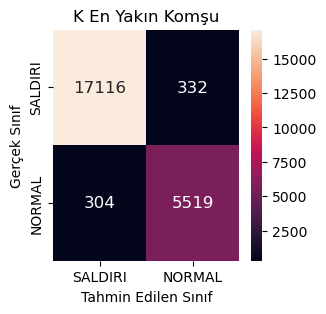

In [90]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(3) # Sınıflayıcı tanımlama

knn_train_start = datetime.now()
knn.fit(x_train, y_train) # modeli eğit
knn_train_timing = datetime.now()-knn_train_start
print('KNN eğitim süresi:',knn_train_timing)

# Tahmin
knn_x_train_pred_start = datetime.now()
y_train_pred = knn.predict(x_train)
knn_x_train_pred_timing = datetime.now()-knn_x_train_pred_start
print('KNN eğitim seti tahmin süresi:',knn_x_train_pred_timing)

knn_x_test_pred_start = datetime.now()
y_test_pred = knn.predict(x_test)
knn_x_test_pred_timing = datetime.now()-knn_x_test_pred_start
print('KNN test seti tahmin süresi:',knn_x_test_pred_timing)


# Eğitim seti performansı
knn_train_accuracy = accuracy_score(y_train, y_train_pred) # Accuracy hesaplama
knn_train_mcc = matthews_corrcoef(y_train, y_train_pred) # MCC hesaplama
knn_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # F1-skoru hesaplama

# Test seti performansı
knn_test_accuracy = accuracy_score(y_test, y_test_pred) # Accuracy hesaplama
knn_test_mcc = matthews_corrcoef(y_test, y_test_pred) # MCC hesaplama
knn_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # F1-skoru hesaplama

print('----------------------------------')
print('Eğitim seti için modelin performansı')
print('- Doğruluk (Accuracy): %s' % knn_train_accuracy)
print('- MCC: %s' % knn_train_mcc)
print('- F1 skoru: %s' % knn_train_f1)
print('----------------------------------')
print('Test seti için modelin performansı')
print('- Doğruluk (Accuracy): %s' % knn_test_accuracy)
print('- MCC: %s' % knn_test_mcc)
print('- F1 skoru: %s' % knn_test_f1)

fp = confusion_matrix(y_test, y_test_pred, "K En Yakın Komşu")

**Destek Vektör Makinesi (Radial basis function kernel)**

SVM eğitim süresi: 0:05:18.441949
SVM eğitim seti tahmin süresi: 0:03:57.544020
SVM test seti tahmin süresi: 0:01:07.837350
----------------------------------
Eğitim seti için modelin performansı
- Doğruluk (Accuracy): 0.9801463241692719
- MCC: 0.946833686605212
- F1 skoru: 0.9800849039844289
----------------------------------
Test seti için modelin performansı
- Doğruluk (Accuracy): 0.9746895277383868
- MCC: 0.9321665277715587
- F1 skoru: 0.9746003912039116


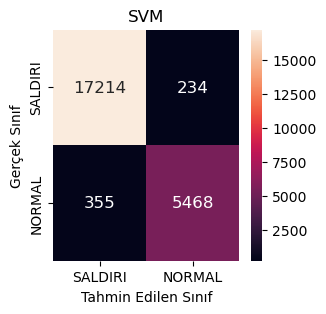

In [91]:
from sklearn.svm import SVC

svm_rbf = SVC(gamma=2, C=1)

svm_train_start = datetime.now()
svm_rbf.fit(x_train, y_train)
svm_train_timing = datetime.now()-svm_train_start
print('SVM eğitim süresi:',svm_train_timing)


svm_x_train_pred_start = datetime.now()
y_train_pred = svm_rbf.predict(x_train)
svm_x_train_pred_timing = datetime.now()-svm_x_train_pred_start
print('SVM eğitim seti tahmin süresi:',svm_x_train_pred_timing)

svm_x_test_pred_start = datetime.now()
y_test_pred = svm_rbf.predict(x_test)
svm_x_test_pred_timing = datetime.now()-svm_x_test_pred_start
print('SVM test seti tahmin süresi:',svm_x_test_pred_timing)



svm_rbf_train_accuracy = accuracy_score(y_train, y_train_pred) 
svm_rbf_train_mcc = matthews_corrcoef(y_train, y_train_pred) 
svm_rbf_train_f1 = f1_score(y_train, y_train_pred, average='weighted') 


svm_rbf_test_accuracy = accuracy_score(y_test, y_test_pred) 
svm_rbf_test_mcc = matthews_corrcoef(y_test, y_test_pred) 
svm_rbf_test_f1 = f1_score(y_test, y_test_pred, average='weighted') 

print('----------------------------------')
print('Eğitim seti için modelin performansı')
print('- Doğruluk (Accuracy): %s' % svm_rbf_train_accuracy)
print('- MCC: %s' % svm_rbf_train_mcc)
print('- F1 skoru: %s' % svm_rbf_train_f1)
print('----------------------------------')
print('Test seti için modelin performansı')
print('- Doğruluk (Accuracy): %s' % svm_rbf_test_accuracy)
print('- MCC: %s' % svm_rbf_test_mcc)
print('- F1 skoru: %s' % svm_rbf_test_f1)
fp = confusion_matrix(y_test, y_test_pred, "SVM")

**Karar Ağacı**

DT eğitim süresi: 0:00:00.835766
DT eğitim seti tahmin süresi: 0:00:00.017988
DT test seti tahmin süresi: 0:00:00.003986
----------------------------------
Eğitim seti için modelin performansı
- Doğruluk (Accuracy): 0.9643751141478927
- MCC: 0.9039980410411276
- F1 skoru: 0.964083019678419
----------------------------------
Test seti için modelin performansı
- Doğruluk (Accuracy): 0.9633879076962744
- MCC: 0.9013804222240356
- F1 skoru: 0.9631120323813697


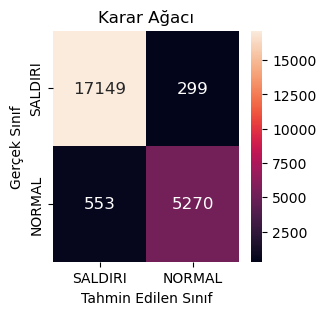

In [92]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=5) 

dt_train_start = datetime.now()
dt.fit(x_train, y_train) 
dt_train_timing = datetime.now()-dt_train_start
print('DT eğitim süresi:',dt_train_timing)


dt_x_train_pred_start = datetime.now()
y_train_pred = dt.predict(x_train)
dt_x_train_pred_timing = datetime.now()-dt_x_train_pred_start
print('DT eğitim seti tahmin süresi:',dt_x_train_pred_timing)

dt_x_test_pred_start = datetime.now()
y_test_pred = dt.predict(x_test)
dt_x_test_pred_timing = datetime.now()-dt_x_test_pred_start
print('DT test seti tahmin süresi:',dt_x_test_pred_timing)


dt_train_accuracy = accuracy_score(y_train, y_train_pred) 
dt_train_mcc = matthews_corrcoef(y_train, y_train_pred) 
dt_train_f1 = f1_score(y_train, y_train_pred, average='weighted') 


dt_test_accuracy = accuracy_score(y_test, y_test_pred) 
dt_test_mcc = matthews_corrcoef(y_test, y_test_pred) 
dt_test_f1 = f1_score(y_test, y_test_pred, average='weighted') 

print('----------------------------------')
print('Eğitim seti için modelin performansı')
print('- Doğruluk (Accuracy): %s' % dt_train_accuracy)
print('- MCC: %s' % dt_train_mcc)
print('- F1 skoru: %s' % dt_train_f1)
print('----------------------------------')
print('Test seti için modelin performansı')
print('- Doğruluk (Accuracy): %s' % dt_test_accuracy)
print('- MCC: %s' % dt_test_mcc)
print('- F1 skoru: %s' % dt_test_f1)
fp = confusion_matrix(y_test, y_test_pred, "Karar Ağacı")

**Random Forest (Rastgele Değişken)**

RF eğitim süresi: 0:00:03.637224
RF eğitim seti tahmin süresi: 0:00:00.261302
RF test seti tahmin süresi: 0:00:00.073801
----------------------------------
Eğitim seti için modelin performansı
- Doğruluk (Accuracy): 0.9980447137439434
- MCC: 0.9947867650573342
- F1 skoru: 0.9980426330540796
----------------------------------
Test seti için modelin performansı
- Doğruluk (Accuracy): 0.9743027802844743
- MCC: 0.930975503956642
- F1 skoru: 0.9741530476295497


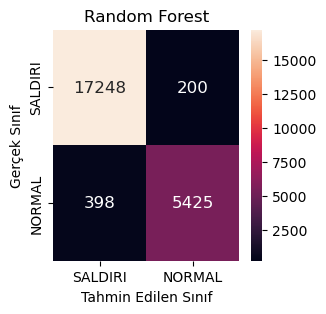

In [93]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=10) 

rf_train_start = datetime.now()
rf.fit(x_train, y_train) 
rf_train_timing = datetime.now()-rf_train_start
print('RF eğitim süresi:',rf_train_timing)


rf_x_train_pred_start = datetime.now()
y_train_pred = rf.predict(x_train)
rf_x_train_pred_timing = datetime.now()-rf_x_train_pred_start
print('RF eğitim seti tahmin süresi:',rf_x_train_pred_timing)

rf_x_test_pred_start = datetime.now()
y_test_pred = rf.predict(x_test)
rf_x_test_pred_timing = datetime.now()-rf_x_test_pred_start
print('RF test seti tahmin süresi:',rf_x_test_pred_timing)



rf_train_accuracy = accuracy_score(y_train, y_train_pred) 
rf_train_mcc = matthews_corrcoef(y_train, y_train_pred) 
rf_train_f1 = f1_score(y_train, y_train_pred, average='weighted') 


rf_test_accuracy = accuracy_score(y_test, y_test_pred) 
rf_test_mcc = matthews_corrcoef(y_test, y_test_pred) 
rf_test_f1 = f1_score(y_test, y_test_pred, average='weighted') 

print('----------------------------------')
print('Eğitim seti için modelin performansı')
print('- Doğruluk (Accuracy): %s' % rf_train_accuracy)
print('- MCC: %s' % rf_train_mcc)
print('- F1 skoru: %s' % rf_train_f1)
print('----------------------------------')
print('Test seti için modelin performansı')
print('- Doğruluk (Accuracy): %s' % rf_test_accuracy)
print('- MCC: %s' % rf_test_mcc)
print('- F1 skoru: %s' % rf_test_f1)
fp = confusion_matrix(y_test, y_test_pred, "Random Forest")

**Multilayer Perceptron (Çok Katmanlı Algılayıcı)**

MLP eğitim süresi: 0:01:01.316717
MLP eğitim seti tahmin süresi: 0:00:00.177319
MLP test seti tahmin süresi: 0:00:00.046876
----------------------------------
Eğitim seti için modelin performansı
- Doğruluk (Accuracy): 0.9628925344592344
- MCC: 0.9001341908466013
- F1 skoru: 0.9620656026568103
----------------------------------
Test seti için modelin performansı
- Doğruluk (Accuracy): 0.9631730479996562
- MCC: 0.9008402287368553
- F1 skoru: 0.9623844618950241


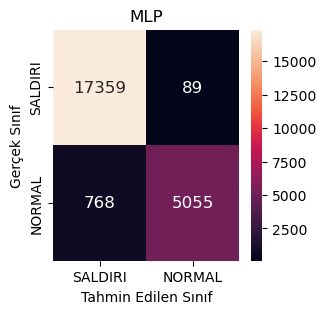

In [94]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(alpha=1, max_iter=1000)

mlp_train_start = datetime.now()
mlp.fit(x_train, y_train)
mlp_train_timing = datetime.now()-mlp_train_start
print('MLP eğitim süresi:',mlp_train_timing)


mlp_x_train_pred_start = datetime.now()
y_train_pred = mlp.predict(x_train)
mlp_x_train_pred_timing = datetime.now()-mlp_x_train_pred_start
print('MLP eğitim seti tahmin süresi:',mlp_x_train_pred_timing)

mlp_x_test_pred_start = datetime.now()
y_test_pred = mlp.predict(x_test)
mlp_x_test_pred_timing = datetime.now()-mlp_x_test_pred_start
print('MLP test seti tahmin süresi:',mlp_x_test_pred_timing)



mlp_train_accuracy = accuracy_score(y_train, y_train_pred) 
mlp_train_mcc = matthews_corrcoef(y_train, y_train_pred) 
mlp_train_f1 = f1_score(y_train, y_train_pred, average='weighted') 


mlp_test_accuracy = accuracy_score(y_test, y_test_pred) 
mlp_test_mcc = matthews_corrcoef(y_test, y_test_pred) 
mlp_test_f1 = f1_score(y_test, y_test_pred, average='weighted') 

print('----------------------------------')
print('Eğitim seti için modelin performansı')
print('- Doğruluk (Accuracy): %s' % mlp_train_accuracy)
print('- MCC: %s' % mlp_train_mcc)
print('- F1 skoru: %s' % mlp_train_f1)
print('----------------------------------')
print('Test seti için modelin performansı')
print('- Doğruluk (Accuracy): %s' % mlp_test_accuracy)
print('- MCC: %s' % mlp_test_mcc)
print('- F1 skoru: %s' % mlp_test_f1)
fp = confusion_matrix(y_test, y_test_pred, "MLP")

**XGboost**

In [95]:
from xgboost import XGBClassifier

In [96]:
xgbc=XGBClassifier()

In [97]:
print(xgbc)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)


In [98]:
xgb_train_start = datetime.now()
xgbc.fit(x_train, y_train, eval_metric='rmse')
#xgb_model.fit(X_train, y_train, sample_weight=classes_weights)
xgb_train_timing = datetime.now()-xgb_train_start
print('  XGB eğitim süresi:',xgb_train_timing)


  XGB eğitim süresi: 0:00:23.592511


XGB eğitim seti tahmin süresi: 0:00:00.177526
XGB test seti tahmin süresi: 0:00:00.045872
----------------------------------
Eğitim seti için modelin performansı
- Doğruluk (Accuracy): 0.9901376220710993
- MCC: 0.9736353307052017
- F1 skoru: 0.9901146457884565
----------------------------------
Test seti için modelin performansı
- Doğruluk (Accuracy): 0.9741308925271798
- MCC: 0.9306953518079399
- F1 skoru: 0.9740482012902453


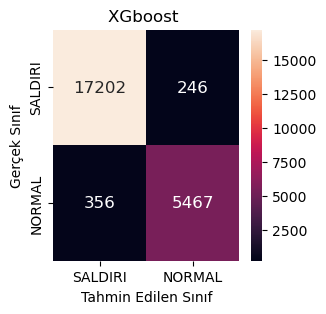

In [99]:

xgb_x_train_pred_start = datetime.now()
y_train_pred = xgbc.predict(x_train)
xgb_x_train_pred_timing = datetime.now()-xgb_x_train_pred_start
print('XGB eğitim seti tahmin süresi:',xgb_x_train_pred_timing)

xgb_x_test_pred_start = datetime.now()
y_test_pred = xgbc.predict(x_test)
xgb_x_test_pred_timing = datetime.now()-xgb_x_test_pred_start
print('XGB test seti tahmin süresi:',xgb_x_test_pred_timing)



xgbc_train_accuracy = accuracy_score(y_train, y_train_pred) 
xgbc_train_mcc = matthews_corrcoef(y_train, y_train_pred) 
xgbc_train_f1 = f1_score(y_train, y_train_pred, average='weighted') 


xgbc_test_accuracy = accuracy_score(y_test, y_test_pred) 
xgbc_test_mcc = matthews_corrcoef(y_test, y_test_pred) 
xgbc_test_f1 = f1_score(y_test, y_test_pred, average='weighted') 

print('----------------------------------')
print('Eğitim seti için modelin performansı')
print('- Doğruluk (Accuracy): %s' % xgbc_train_accuracy)
print('- MCC: %s' % xgbc_train_mcc)
print('- F1 skoru: %s' % xgbc_train_f1)
print('----------------------------------')
print('Test seti için modelin performansı')
print('- Doğruluk (Accuracy): %s' % xgbc_test_accuracy)
print('- MCC: %s' % xgbc_test_mcc)
print('- F1 skoru: %s' % xgbc_test_f1)

fp = confusion_matrix(y_test, y_test_pred, "XGboost ")

**Gaussian Naive Bayes**

In [100]:
from sklearn.naive_bayes import GaussianNB

gnbc = GaussianNB(var_smoothing = 0.0992)

In [101]:
print(gnbc)

GaussianNB(var_smoothing=0.0992)


GNB eğitim süresi: 0:00:00.089759
GNB eğitim seti tahmin süresi: 0:00:00.081782
GNB test seti tahmin süresi: 0:00:00.020943
----------------------------------
Eğitim seti için modelin performansı
- Doğruluk (Accuracy): 0.917566420644385
- MCC: 0.7736483104999201
- F1 skoru: 0.9130478600022817
----------------------------------
Test seti için modelin performansı
- Doğruluk (Accuracy): 0.9182673714064715
- MCC: 0.7757187338127405
- F1 skoru: 0.9138030295243597


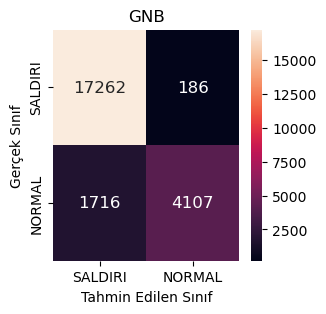

In [102]:
gnbc_train_start = datetime.now()
gnbc.fit(x_train, y_train)
gnbc_train_timing = datetime.now()-gnbc_train_start
print('GNB eğitim süresi:',gnbc_train_timing)

gnbc_x_train_pred_start = datetime.now()
y_train_pred = gnbc.predict(x_train)
gnbc_x_train_pred_timing = datetime.now()-gnbc_x_train_pred_start
print('GNB eğitim seti tahmin süresi:',gnbc_x_train_pred_timing)

gnbc_x_test_pred_start = datetime.now()
y_test_pred = gnbc.predict(x_test)
gnbc_x_test_pred_timing = datetime.now()-gnbc_x_test_pred_start
print('GNB test seti tahmin süresi:',gnbc_x_test_pred_timing)


gnbc_train_accuracy = accuracy_score(y_train, y_train_pred) 
gnbc_train_mcc = matthews_corrcoef(y_train, y_train_pred) 
gnbc_train_f1 = f1_score(y_train, y_train_pred, average='weighted') 


gnbc_test_accuracy = accuracy_score(y_test, y_test_pred) 
gnbc_test_mcc = matthews_corrcoef(y_test, y_test_pred) 
gnbc_test_f1 = f1_score(y_test, y_test_pred, average='weighted') 

print('----------------------------------')
print('Eğitim seti için modelin performansı')
print('- Doğruluk (Accuracy): %s' % gnbc_train_accuracy)
print('- MCC: %s' % gnbc_train_mcc)
print('- F1 skoru: %s' % gnbc_train_f1)
print('----------------------------------')
print('Test seti için modelin performansı')
print('- Doğruluk (Accuracy): %s' % gnbc_test_accuracy)
print('- MCC: %s' % gnbc_test_mcc)
print('- F1 skoru: %s' % gnbc_test_f1)

fp = confusion_matrix(y_test, y_test_pred, "GNB")

**AdaBoost**

In [103]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
svc=SVC(probability=True, kernel='linear')

In [104]:
abc =AdaBoostClassifier(n_estimators=100)
#abc =AdaBoostClassifier(n_estimators=50, base_estimator=svc,learning_rate=1)

In [105]:
print(abc)

AdaBoostClassifier(n_estimators=100)


ABC eğitim süresi: 0:00:28.239385
ABC eğitim seti tahmin süresi: 0:00:02.858342
ABC test seti tahmin süresi: 0:00:00.544543
----------------------------------
Eğitim seti için modelin performansı
- Doğruluk (Accuracy): 0.9599488617440723
- MCC: 0.891708939306051
- F1 skoru: 0.9594332165686433
----------------------------------
Test seti için modelin performansı
- Doğruluk (Accuracy): 0.9599501525503846
- MCC: 0.891707867989751
- F1 skoru: 0.9594235969085263


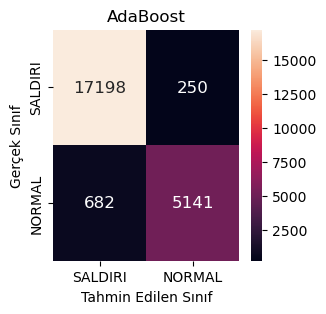

In [106]:
abc_train_start = datetime.now()
abc.fit(x_train, y_train)
abc_train_timing = datetime.now()-abc_train_start
print('ABC eğitim süresi:',abc_train_timing)

abc_x_train_pred_start = datetime.now()
y_train_pred = abc.predict(x_train)
abc_x_train_pred_timing = datetime.now()-abc_x_train_pred_start
print('ABC eğitim seti tahmin süresi:',abc_x_train_pred_timing)

abc_x_test_pred_start = datetime.now()
y_test_pred = abc.predict(x_test)
abc_x_test_pred_timing = datetime.now()-abc_x_test_pred_start
print('ABC test seti tahmin süresi:',abc_x_test_pred_timing)


abc_train_accuracy = accuracy_score(y_train, y_train_pred) 
abc_train_mcc = matthews_corrcoef(y_train, y_train_pred) 
abc_train_f1 = f1_score(y_train, y_train_pred, average='weighted') 


abc_test_accuracy = accuracy_score(y_test, y_test_pred) 
abc_test_mcc = matthews_corrcoef(y_test, y_test_pred) 
abc_test_f1 = f1_score(y_test, y_test_pred, average='weighted') 

print('----------------------------------')
print('Eğitim seti için modelin performansı')
print('- Doğruluk (Accuracy): %s' % abc_train_accuracy)
print('- MCC: %s' % abc_train_mcc)
print('- F1 skoru: %s' % abc_train_f1)
print('----------------------------------')
print('Test seti için modelin performansı')
print('- Doğruluk (Accuracy): %s' % abc_test_accuracy)
print('- MCC: %s' % abc_test_mcc)
print('- F1 skoru: %s' % abc_test_f1)
fp = confusion_matrix(y_test, y_test_pred, "AdaBoost")

**Lojistik Regresyon**

In [107]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

LR eğitim süresi: 0:00:00.461763
LR eğitim seti tahmin süresi: 0:00:00.005985
LR test seti tahmin süresi: 0:00:00.001994
----------------------------------
Eğitim seti için modelin performansı
- Doğruluk (Accuracy): 0.9452842148236482
- MCC: 0.8518965800266216
- F1 skoru: 0.9447042539388328
----------------------------------
Test seti için modelin performansı
- Doğruluk (Accuracy): 0.9464139916634438
- MCC: 0.855018009632844
- F1 skoru: 0.9458617237588929


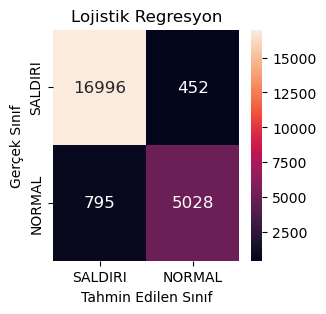

In [108]:
lr_train_start = datetime.now()
lr.fit(x_train, y_train)
lr_train_timing = datetime.now()-lr_train_start
print('LR eğitim süresi:',lr_train_timing)

lr_x_train_pred_start = datetime.now()
y_train_pred = lr.predict(x_train)
lr_x_train_pred_timing = datetime.now()-lr_x_train_pred_start
print('LR eğitim seti tahmin süresi:',lr_x_train_pred_timing)

lr_x_test_pred_start = datetime.now()
y_test_pred = lr.predict(x_test)
lr_x_test_pred_timing = datetime.now()-lr_x_test_pred_start
print('LR test seti tahmin süresi:',lr_x_test_pred_timing)

lr_train_accuracy = accuracy_score(y_train, y_train_pred) 
lr_train_mcc = matthews_corrcoef(y_train, y_train_pred) 
lr_train_f1 = f1_score(y_train, y_train_pred, average='weighted') 


lr_test_accuracy = accuracy_score(y_test, y_test_pred) 
lr_test_mcc = matthews_corrcoef(y_test, y_test_pred) 
lr_test_f1 = f1_score(y_test, y_test_pred, average='weighted') 

print('----------------------------------')
print('Eğitim seti için modelin performansı')
print('- Doğruluk (Accuracy): %s' % lr_train_accuracy)
print('- MCC: %s' % lr_train_mcc)
print('- F1 skoru: %s' % lr_train_f1)
print('----------------------------------')
print('Test seti için modelin performansı')
print('- Doğruluk (Accuracy): %s' % lr_test_accuracy)
print('- MCC: %s' % lr_test_mcc)
print('- F1 skoru: %s' % lr_test_f1)
fp = confusion_matrix(y_test, y_test_pred, "Lojistik Regresyon")

**İstifleme (Stacked)**

İstifleme (Stacked) modeli eğitim süresi: 0:02:01.175669
İstifleme (Stacked) modeli eğitim seti tahmin süresi: 0:00:04.597683
İstifleme (Stacked) modeli test seti tahmin süresi: 0:00:01.010296
----------------------------------
Eğitim seti için modelin performansı
- Doğruluk (Accuracy): 0.9967447706835981
- MCC: 0.9913175278819074
- F1 skoru: 0.9967431134735639
----------------------------------
Test seti için modelin performansı
- Doğruluk (Accuracy): 0.9754200507068884
- MCC: 0.9342201848042361
- F1 skoru: 0.9753602746443594


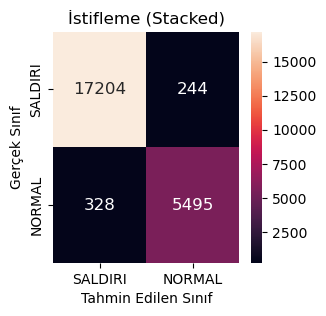

In [109]:
# Define estimators
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

estimator_list = [
    ('knn',knn),
    #('svm_rbf',svm_rbf),
    #('dt',dt),
    ('rf',rf),
    #('mlp',mlp), 
    ('xgb',xgbc),
    #('abc',abc),
    #('gnb',gnbc),
    #('lr',lr),
                
                    ]


stack_model = StackingClassifier(
    estimators=estimator_list, final_estimator=LogisticRegression()
)


stack_train_start = datetime.now()
stack_model.fit(x_train, y_train)
stack_train_timing = datetime.now()-stack_train_start
print('İstifleme (Stacked) modeli eğitim süresi:',stack_train_timing)



stack_x_train_pred_start = datetime.now()
y_train_pred = stack_model.predict(x_train)
stack_x_train_pred_timing = datetime.now()-stack_x_train_pred_start
print('İstifleme (Stacked) modeli eğitim seti tahmin süresi:',stack_x_train_pred_timing)

stack_x_test_pred_start = datetime.now()
y_test_pred = stack_model.predict(x_test)
stack_x_test_pred_timing = datetime.now()-stack_x_test_pred_start
print('İstifleme (Stacked) modeli test seti tahmin süresi:',stack_x_test_pred_timing)


  
stack_model_train_accuracy = accuracy_score(y_train, y_train_pred) 
stack_model_train_mcc = matthews_corrcoef(y_train, y_train_pred) 
stack_model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') 

 
stack_model_test_accuracy = accuracy_score(y_test, y_test_pred) 
stack_model_test_mcc = matthews_corrcoef(y_test, y_test_pred) 
stack_model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') 

print('----------------------------------')
print('Eğitim seti için modelin performansı')
print('- Doğruluk (Accuracy): %s' % stack_model_train_accuracy)
print('- MCC: %s' % stack_model_train_mcc)
print('- F1 skoru: %s' % stack_model_train_f1)
print('----------------------------------')
print('Test seti için modelin performansı')
print('- Doğruluk (Accuracy): %s' % stack_model_test_accuracy)
print('- MCC: %s' % stack_model_test_mcc)
print('- F1 skoru: %s' % stack_model_test_f1)
fp = confusion_matrix(y_test, y_test_pred, "İstifleme (Stacked)")

**Sert Oylama (Hard Voting)**

Sert Oylama (Hard Voting) eğitim süresi: 0:00:23.980313
Sert Oylama (Hard Voting) eğitim seti tahmin süresi: 0:00:12.418782
Sert Oylama (Hard Voting) test seti tahmin süresi: 0:00:02.304842
----------------------------------
Eğitim seti için modelin performansı
- Doğruluk (Accuracy): 0.9967447706835981
- MCC: 0.9913175278819074
- F1 skoru: 0.9967431134735639
----------------------------------
Test seti için modelin performansı
- Doğruluk (Accuracy): 0.9754200507068884
- MCC: 0.9342201848042361
- F1 skoru: 0.9753602746443594


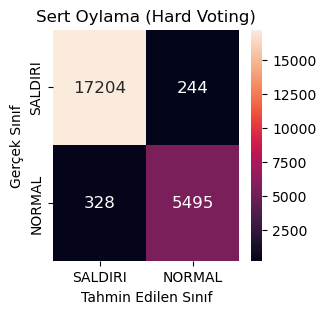

In [110]:
# Define estimators
from sklearn.ensemble import VotingClassifier
#from sklearn.linear_model import LogisticRegression

estimator_list = [
    ('knn',knn),
    #('svm_rbf',svm_rbf),
    #('dt',dt),
    ('rf',rf),
    #('mlp',mlp)
    ('xgb',xgbc),
    #('abc',abc),
    #('gnb',gnbc),
    
                ]


hard_voting_model = VotingClassifier(estimators=estimator_list, voting='hard', weights=[1,1,1])



hard_voting_train_start = datetime.now()
hard_voting_model.fit(x_train, y_train)
hard_voting_train_timing = datetime.now()-hard_voting_train_start
print('Sert Oylama (Hard Voting) eğitim süresi:',hard_voting_train_timing)


hard_voting_x_train_pred_start = datetime.now()
hard_y_train_pred = hard_voting_model.predict(x_train)
hard_voting_x_train_pred_timing = datetime.now()-hard_voting_x_train_pred_start
print('Sert Oylama (Hard Voting) eğitim seti tahmin süresi:',hard_voting_x_train_pred_timing)


hard_voting_x_test_pred_start = datetime.now()
hard_y_test_pred = hard_voting_model.predict(x_test)
hard_voting_x_test_pred_timing = datetime.now()-hard_voting_x_test_pred_start
print('Sert Oylama (Hard Voting) test seti tahmin süresi:',hard_voting_x_test_pred_timing)



hard_voting_model_train_accuracy = accuracy_score(y_train, y_train_pred) 
hard_voting_model_train_mcc = matthews_corrcoef(y_train, y_train_pred) 
hard_voting_model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') 


hard_voting_model_test_accuracy = accuracy_score(y_test, y_test_pred) 
hard_voting_model_test_mcc = matthews_corrcoef(y_test, y_test_pred) 
hard_voting_model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') 

print('----------------------------------')
print('Eğitim seti için modelin performansı')
print('- Doğruluk (Accuracy): %s' % hard_voting_model_train_accuracy)
print('- MCC: %s' % hard_voting_model_train_mcc)
print('- F1 skoru: %s' % hard_voting_model_train_f1)
print('----------------------------------')
print('Test seti için modelin performansı')
print('- Doğruluk (Accuracy): %s' % hard_voting_model_test_accuracy)
print('- MCC: %s' % hard_voting_model_test_mcc)
print('- F1 skoru: %s' % hard_voting_model_test_f1)


fp = confusion_matrix(y_test, y_test_pred, "Sert Oylama (Hard Voting)")

**Yumuşak Oylama (Soft Voting)**

Yumuşak Oylama (Soft Voting) eğitim süresi: 0:00:21.158364
Yumuşak Oylama (Soft Voting) eğitim seti tahmin süresi: 0:00:05.455398
Yumuşak Oylama (Soft Voting) test seti tahmin süresi: 0:00:01.059162
----------------------------------
Eğitim seti için modelin performansı
- Doğruluk (Accuracy): 0.9956167209204886
- MCC: 0.9883010945491547
- F1 skoru: 0.9956112954652216
----------------------------------
Test seti için modelin performansı
- Doğruluk (Accuracy): 0.9762365175540372
- MCC: 0.9363938251616506
- F1 skoru: 0.9761752432594838


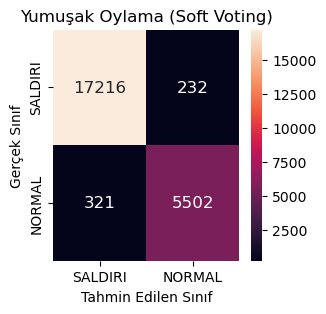

In [111]:
from sklearn.ensemble import VotingClassifier

estimator_list = [
    ('knn',knn),
    #('svm_rbf',svm_rbf),
    #('dt',dt),
    ('rf',rf),
    #('mlp',mlp), 
    ('xgb',xgbc),
    #('abc',abc),
    #('gnb',gnbc),
    #('lr',lr),
                ]



soft_voting_model = VotingClassifier(estimators=estimator_list, voting='soft',weights=[1,1,1],flatten_transform=False)



soft_voting_train_start = datetime.now()
soft_voting_model.fit(x_train, y_train)
soft_voting_train_timing = datetime.now()-soft_voting_train_start
print('Yumuşak Oylama (Soft Voting) eğitim süresi:',soft_voting_train_timing)



soft_voting_x_train_pred_start = datetime.now()
y_train_pred = soft_voting_model.predict(x_train)
soft_voting_x_train_pred_timing = datetime.now()-soft_voting_x_train_pred_start
print('Yumuşak Oylama (Soft Voting) eğitim seti tahmin süresi:',soft_voting_x_train_pred_timing)

soft_voting_x_test_pred_start = datetime.now()
y_test_pred = soft_voting_model.predict(x_test)
soft_voting_x_test_pred_timing = datetime.now()-soft_voting_x_test_pred_start
print('Yumuşak Oylama (Soft Voting) test seti tahmin süresi:',soft_voting_x_test_pred_timing)


soft_voting_model_train_accuracy = accuracy_score(y_train, y_train_pred) 
soft_voting_model_train_mcc = matthews_corrcoef(y_train, y_train_pred) 
soft_voting_model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') 


soft_voting_model_test_accuracy = accuracy_score(y_test, y_test_pred) 
soft_voting_model_test_mcc = matthews_corrcoef(y_test, y_test_pred) 
soft_voting_model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') 

print('----------------------------------')
print('Eğitim seti için modelin performansı')
print('- Doğruluk (Accuracy): %s' % soft_voting_model_train_accuracy)
print('- MCC: %s' % soft_voting_model_train_mcc)
print('- F1 skoru: %s' % soft_voting_model_train_f1)
print('----------------------------------')
print('Test seti için modelin performansı')
print('- Doğruluk (Accuracy): %s' % soft_voting_model_test_accuracy)
print('- MCC: %s' % soft_voting_model_test_mcc)
print('- F1 skoru: %s' % soft_voting_model_test_f1)

fp = confusion_matrix(y_test, y_test_pred, "Yumuşak Oylama (Soft Voting)")

**Nelder-Mead Algoritması ile Optimizasyon 1 (KNN vs XGB)**

In [112]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from scipy.optimize import minimize


def function_to_minimize(weights, fitted_clfs):

    w1, w2 = weights  # yeni ağırlıklar

    newclf = EnsembleVoteClassifier(
        voting="soft",
        use_clones=False,
        fit_base_estimators=False,
        clfs=fitted_clfs,
        weights=(w1,1.,w2),  # yeni ağırlıkların kullanılması
    )

    newclf.fit(x_train, y_train)
    score = newclf.score(x_test, y_test)

    # en küçük hata daha iyidir
    score_to_minimize = 1 - score

    return score_to_minimize


In [113]:
from mlxtend.classifier import EnsembleVoteClassifier

nm_start = datetime.now()


init_weights = [1., 1.]

results = minimize(
    function_to_minimize,
    init_weights,
    args=((knn, rf, xgbc),),
    bounds=((0, 5), (0, 5)),
    method="nelder-mead",
)

In [114]:
print(results)
nm_timing_1 = datetime.now()-nm_start
print('Nelder-Mead 1 arama süresi:',nm_timing_1)

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 0.02406428602122812
             x: [ 1.216e+00  8.937e-01]
           nit: 19
          nfev: 52
 final_simplex: (array([[ 1.216e+00,  8.937e-01],
                       [ 1.216e+00,  8.938e-01],
                       [ 1.216e+00,  8.938e-01]]), array([ 2.406e-02,  2.406e-02,  2.406e-02]))
Nelder-Mead 1 arama süresi: 0:01:16.568719


In [115]:
solution = results["x"]
print(solution)

[1.215625 0.89375 ]


In [116]:
eclf = EnsembleVoteClassifier(
    clfs=(knn, rf, xgbc),
    voting="soft",
    weights=(solution[0],1, solution[1]),
    use_clones=False,
    fit_base_estimators=False,
)

eclf_voting_train_start = datetime.now()
eclf.fit(x_train, y_train)
eclf_voting_train_timing = datetime.now()-eclf_voting_train_start
print('Nelder-Mead Algoritması ile Optimize Yumuşak Oylama eğitim süresi:',eclf_voting_train_timing)


Nelder-Mead Algoritması ile Optimize Yumuşak Oylama eğitim süresi: 0:00:00.003989


Nelder-Mead Algoritması ile Optimize Yumuşak Oylama eğitim seti tahmin süresi: 0:00:03.925489
Nelder-Mead Algoritması ile Optimize Yumuşak Oylama test seti tahmin süresi: 0:00:00.617348
----------------------------------
Eğitim seti için modelin performansı
- Doğruluk (Accuracy): 0.9951977310084765
- MCC: 0.987181524324665
- F1 skoru: 0.9951916826180687
----------------------------------
Test seti için modelin performansı
- Doğruluk (Accuracy): 0.9759357139787719
- MCC: 0.9355906233106341
- F1 skoru: 0.9758743700422478


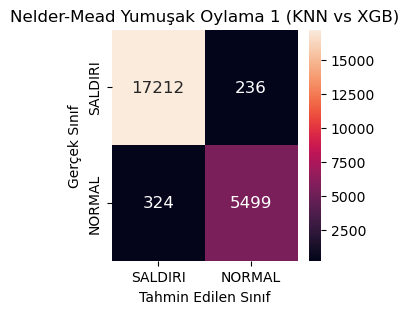

In [117]:

eclf_x_train_pred_start = datetime.now()
y_train_pred = eclf.predict(x_train)
eclf_x_train_pred_timing = datetime.now()-eclf_x_train_pred_start
print('Nelder-Mead Algoritması ile Optimize Yumuşak Oylama eğitim seti tahmin süresi:',eclf_x_train_pred_timing)


eclf_x_test_pred_start = datetime.now()
y_test_pred = eclf.predict(x_test)
eclf_x_test_pred_timing = datetime.now()-eclf_x_test_pred_start
print('Nelder-Mead Algoritması ile Optimize Yumuşak Oylama test seti tahmin süresi:',eclf_x_test_pred_timing)




eclf_model_train_accuracy = accuracy_score(y_train, y_train_pred) 
eclf_model_train_mcc = matthews_corrcoef(y_train, y_train_pred) 
eclf_model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') 

 
eclf_model_test_accuracy = accuracy_score(y_test, y_test_pred) 
eclf_model_test_mcc = matthews_corrcoef(y_test, y_test_pred) 
eclf_model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') 

print('----------------------------------')
print('Eğitim seti için modelin performansı')
print('- Doğruluk (Accuracy): %s' % eclf_model_train_accuracy)
print('- MCC: %s' % eclf_model_train_mcc)
print('- F1 skoru: %s' % eclf_model_train_f1)
print('----------------------------------')
print('Test seti için modelin performansı')
print('- Doğruluk (Accuracy): %s' % eclf_model_test_accuracy)
print('- MCC: %s' % eclf_model_test_mcc)
print('- F1 skoru: %s' % eclf_model_test_f1)


fp = confusion_matrix(y_test, y_test_pred, "Nelder-Mead Yumuşak Oylama 1 (KNN vs XGB)")

**Nelder-Mead Algoritması ile Optimizasyon 2 (RF vs XGB)**

In [118]:
def function_to_minimize_2(weights, fitted_clfs):

    w1, w2 = weights  

    newclf = EnsembleVoteClassifier(
        voting="soft",
        use_clones=False,
        fit_base_estimators=False,
        clfs=fitted_clfs,
        weights=(1.,w1,w2), 
    )

    newclf.fit(x_train, y_train)
    score = newclf.score(x_test, y_test)

    score_to_minimize = 1 - score

    return score_to_minimize

In [119]:
nm_start = datetime.now()

init_weights = [1., 1.]

results = minimize(
    function_to_minimize_2,
    init_weights,
    args=((knn, rf, xgbc),),
    bounds=((0, 5), (0, 5)),
    method="nelder-mead",
)

print(results)

nm_timing_2 = datetime.now()-nm_start
print('Nelder-Mead 2 arama süresi:',nm_timing_2)

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 0.024150229899875364
             x: [ 1.080e+00  1.022e+00]
           nit: 15
          nfev: 45
 final_simplex: (array([[ 1.080e+00,  1.022e+00],
                       [ 1.080e+00,  1.022e+00],
                       [ 1.080e+00,  1.022e+00]]), array([ 2.415e-02,  2.415e-02,  2.415e-02]))
Nelder-Mead 2 arama süresi: 0:00:57.751446


In [120]:
solution = results["x"]
print(solution)

[1.0796875 1.021875 ]


Nelder-Mead Algoritması ile Optimize Yumuşak Oylama eğitim süresi: 0:00:00.003989
Nelder-Mead Algoritması ile Optimize Yumuşak Oylama eğitim seti tahmin süresi: 0:00:03.925489
Nelder-Mead Algoritması ile Optimize Yumuşak Oylama test seti tahmin süresi: 0:00:00.617348
----------------------------------
Eğitim seti için modelin performansı
- Doğruluk (Accuracy): 0.9957563842244926
- MCC: 0.9886743121713883
- F1 skoru: 0.9957512238085244
----------------------------------
Test seti için modelin performansı
- Doğruluk (Accuracy): 0.9758497701001246
- MCC: 0.9353298046868846
- F1 skoru: 0.9757796917030093


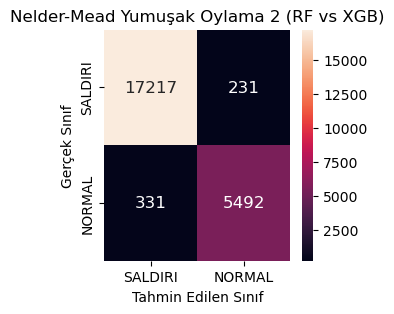

In [121]:
eclf_2 = EnsembleVoteClassifier(
    clfs=(knn, rf, xgbc),
    voting="soft",
    weights=(1,solution[0],solution[1]),
    use_clones=False,
    fit_base_estimators=False,
)

eclf_voting_train_start_2 = datetime.now()
eclf_2.fit(x_train, y_train)
eclf_voting_train_timing_2 = datetime.now()-eclf_voting_train_start_2
print('Nelder-Mead Algoritması ile Optimize Yumuşak Oylama eğitim süresi:',eclf_voting_train_timing)


eclf_x_train_pred_start_2 = datetime.now()
y_train_pred = eclf_2.predict(x_train)
eclf_x_train_pred_timing_2 = datetime.now()-eclf_x_train_pred_start_2
print('Nelder-Mead Algoritması ile Optimize Yumuşak Oylama eğitim seti tahmin süresi:',eclf_x_train_pred_timing)


eclf_x_test_pred_start_2 = datetime.now()
y_test_pred = eclf_2.predict(x_test)
eclf_x_test_pred_timing_2 = datetime.now()-eclf_x_test_pred_start_2
print('Nelder-Mead Algoritması ile Optimize Yumuşak Oylama test seti tahmin süresi:',eclf_x_test_pred_timing)

  
eclf_model_train_accuracy_2 = accuracy_score(y_train, y_train_pred) 
eclf_model_train_mcc_2 = matthews_corrcoef(y_train, y_train_pred) 
eclf_model_train_f1_2 = f1_score(y_train, y_train_pred, average='weighted') 

 
eclf_model_test_accuracy_2 = accuracy_score(y_test, y_test_pred) 
eclf_model_test_mcc_2 = matthews_corrcoef(y_test, y_test_pred) 
eclf_model_test_f1_2 = f1_score(y_test, y_test_pred, average='weighted') 

print('----------------------------------')
print('Eğitim seti için modelin performansı')
print('- Doğruluk (Accuracy): %s' % eclf_model_train_accuracy_2)
print('- MCC: %s' % eclf_model_train_mcc_2)
print('- F1 skoru: %s' % eclf_model_train_f1_2)
print('----------------------------------')
print('Test seti için modelin performansı')
print('- Doğruluk (Accuracy): %s' % eclf_model_test_accuracy_2)
print('- MCC: %s' % eclf_model_test_mcc_2)
print('- F1 skoru: %s' % eclf_model_test_f1_2)


fp = confusion_matrix(y_test, y_test_pred, "Nelder-Mead Yumuşak Oylama 2 (RF vs XGB)")

**Nelder-Mead Algoritması ile Optimizasyon 3 (KNN vs RF)**

In [122]:
def function_to_minimize_3(weights, fitted_clfs):

    w1, w2 = weights 

    newclf = EnsembleVoteClassifier(
        voting="soft",
        use_clones=False,
        fit_base_estimators=False,
        clfs=fitted_clfs,
        weights=(w1,w2,1), 
    )

    newclf.fit(x_train, y_train)
    score = newclf.score(x_test, y_test)

    score_to_minimize = 1 - score

    return score_to_minimize

In [123]:
nm_start = datetime.now()


init_weights = [1., 1.]

results = minimize(
    function_to_minimize_3,
    init_weights,
    args=((knn, rf, xgbc),),
    bounds=((0, 5), (0, 5)),
    method="nelder-mead",
)

print(results)
nm_timing_3 = datetime.now()-nm_start
print('Nelder-Mead 3 arama süresi:',nm_timing_3)


       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 0.024236173778522607
             x: [ 1.064e+00  9.953e-01]
           nit: 13
          nfev: 43
 final_simplex: (array([[ 1.064e+00,  9.953e-01],
                       [ 1.064e+00,  9.954e-01],
                       [ 1.064e+00,  9.954e-01]]), array([ 2.424e-02,  2.424e-02,  2.424e-02]))
Nelder-Mead 3 arama süresi: 0:00:50.987336


In [124]:
solution = results["x"]
print(solution)

[1.0640625 0.9953125]


Nelder-Mead Algoritması ile Optimize Yumuşak Oylama eğitim süresi: 0:00:00.003989
Nelder-Mead Algoritması ile Optimize Yumuşak Oylama eğitim seti tahmin süresi: 0:00:03.925489
Nelder-Mead Algoritması ile Optimize Yumuşak Oylama test seti tahmin süresi: 0:00:00.617348
----------------------------------
Eğitim seti için modelin performansı
- Doğruluk (Accuracy): 0.9953481376435578
- MCC: 0.9875833236839118
- F1 skoru: 0.9953422113041765
----------------------------------
Test seti için modelin performansı
- Doğruluk (Accuracy): 0.9757638262214774
- MCC: 0.9351145875181665
- F1 skoru: 0.9756977749255392


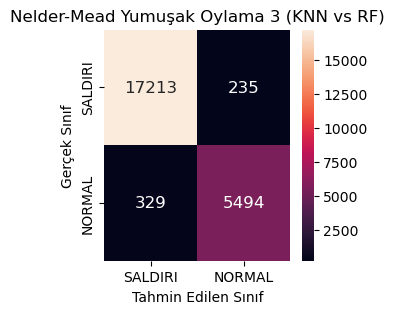

In [125]:
eclf_3 = EnsembleVoteClassifier(
    clfs=(knn, rf, xgbc),
    voting="soft",
    weights=(solution[0],solution[1],1),
    use_clones=False,
    fit_base_estimators=False,
)

eclf_voting_train_start_3 = datetime.now()
eclf_3.fit(x_train, y_train)
eclf_voting_train_timing_3 = datetime.now()-eclf_voting_train_start_3
print('Nelder-Mead Algoritması ile Optimize Yumuşak Oylama eğitim süresi:',eclf_voting_train_timing)


eclf_x_train_pred_start_3 = datetime.now()
y_train_pred = eclf_3.predict(x_train)
eclf_x_train_pred_timing_3 = datetime.now()-eclf_x_train_pred_start_3
print('Nelder-Mead Algoritması ile Optimize Yumuşak Oylama eğitim seti tahmin süresi:',eclf_x_train_pred_timing)


eclf_x_test_pred_start_3 = datetime.now()
y_test_pred = eclf_3.predict(x_test)
eclf_x_test_pred_timing_3 = datetime.now()-eclf_x_test_pred_start_3
print('Nelder-Mead Algoritması ile Optimize Yumuşak Oylama test seti tahmin süresi:',eclf_x_test_pred_timing)


  
eclf_model_train_accuracy_3 = accuracy_score(y_train, y_train_pred) 
eclf_model_train_mcc_3 = matthews_corrcoef(y_train, y_train_pred) 
eclf_model_train_f1_3 = f1_score(y_train, y_train_pred, average='weighted') 

 
eclf_model_test_accuracy_3 = accuracy_score(y_test, y_test_pred) 
eclf_model_test_mcc_3 = matthews_corrcoef(y_test, y_test_pred) 
eclf_model_test_f1_3 = f1_score(y_test, y_test_pred, average='weighted') 

print('----------------------------------')
print('Eğitim seti için modelin performansı')
print('- Doğruluk (Accuracy): %s' % eclf_model_train_accuracy_3)
print('- MCC: %s' % eclf_model_train_mcc_3)
print('- F1 skoru: %s' % eclf_model_train_f1_3)
print('----------------------------------')
print('Test seti için modelin performansı')
print('- Doğruluk (Accuracy): %s' % eclf_model_test_accuracy_3)
print('- MCC: %s' % eclf_model_test_mcc_3)
print('- F1 skoru: %s' % eclf_model_test_f1_3)


fp = confusion_matrix(y_test, y_test_pred, "Nelder-Mead Yumuşak Oylama 3 (KNN vs RF)")

**Rastgele Arama ile Optimizasyon**

In [126]:
from sklearn.model_selection import cross_val_score, RandomizedSearchCV


estimator_list = [
    ('knn',knn),
    #('svm_rbf',svm_rbf),
    #('dt',dt),
    ('rf',rf),
    #('mlp',mlp)
    ('xgb',xgbc),
    #('abc',abc),
    #('gnb',gnbc),
    
                ]


vc1 = VotingClassifier(estimators=estimator_list)

cvm = cross_val_score(vc1, x_train, y_train)
base_score = cvm.mean()
base_std = cvm.std()
print('\n')
print('*'*30)
print(f'*****Ortalama çapraz geçerleme (cross-validation) skoru: {round(base_score,4)} (+- {round(base_std,4)})')

rscv_start = datetime.now()

#Parametreler
params = { 'voting':['hard', 'soft'],
          'weights':[(1,1,1),
                     (2,1,1), 
                     (1,2,1), 
                     (1,1,2),
                     (2,1,2), 
                     (2,2,1), 
                     (1,2,2), 
                     (2,2,3),
                     (3,2,2), 
                     (2,3,2),                   
                     
                        ]}


random_search = RandomizedSearchCV(estimator=vc1,  param_distributions=params, n_iter=10, cv=5, scoring='accuracy')
random_search.fit(x_train, y_train)
print('\n')
print('*'*30)
print(f'*****Rastgele arama en iyi parametreleri : {random_search.best_params_}')
print(f'*****Rastgele arama doğruluk değeri : {random_search.best_score_}')

rscv_timing = datetime.now()-rscv_start
rscv_candidates = len(random_search.cv_results_['params'])

print('Rastgele arama süresi:',rscv_timing)
print('Rastgele arama değerlendirilen parametre sayısı :',len(random_search.cv_results_['params']))



******************************
*****Ortalama çapraz geçerleme (cross-validation) skoru: 0.9625 (+- 0.0354)


******************************
*****Rastgele arama en iyi parametreleri : {'weights': (2, 2, 1), 'voting': 'hard'}
*****Rastgele arama doğruluk değeri : 0.9629029727301701
Rastgele arama süresi: 0:13:54.510753
Rastgele arama değerlendirilen parametre sayısı : 10


Rastgele arama ile optizime yumuşak oylama eğitim süresi: 0:00:16.389200
Rastgele arama ile optizime yumuşak oylama eğitim seti tahmin süresi: 0:00:08.774633
Rastgele arama ile optizime yumuşak oylama test seti tahmin süresi: 0:00:02.804246
----------------------------------
Eğitim seti için modelin performansı
- Doğruluk (Accuracy): 0.9940374512521353
- MCC: 0.9840798331505115
- F1 skoru: 0.9940290772521004
----------------------------------
Test seti için modelin performansı
- Doğruluk (Accuracy): 0.975463022646212
- MCC: 0.9342246704278785
- F1 skoru: 0.9753707912149873


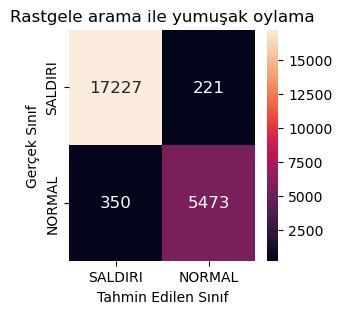

In [127]:

estimator_list = [
    ('knn',knn),
    #('svm_rbf',svm_rbf),
    #('dt',dt),
    ('rf',rf),
    #('mlp',mlp), 
    ('xgb',xgbc),
    #('abc',abc),
    #('gnb',gnbc),
    #('lr',lr),
                ]



random_tuned_voting_model = VotingClassifier(estimators=estimator_list,
                                           **random_search.best_params_,
                                           n_jobs = 1)



random_tuned_voting_train_start = datetime.now()
random_tuned_voting_model.fit(x_train, y_train)
random_tuned_voting_train_timing = datetime.now()-random_tuned_voting_train_start
print('Rastgele arama ile optizime yumuşak oylama eğitim süresi:',random_tuned_voting_train_timing)



random_tuned_voting_x_train_pred_start = datetime.now()
y_train_pred = random_tuned_voting_model.predict(x_train)
random_tuned_voting_x_train_pred_timing = datetime.now()-random_tuned_voting_x_train_pred_start
print('Rastgele arama ile optizime yumuşak oylama eğitim seti tahmin süresi:',random_tuned_voting_x_train_pred_timing)

random_tuned_voting_x_test_pred_start = datetime.now()
y_test_pred = random_tuned_voting_model.predict(x_test)
random_tuned_voting_x_test_pred_timing = datetime.now()-random_tuned_voting_x_test_pred_start
print('Rastgele arama ile optizime yumuşak oylama test seti tahmin süresi:',random_tuned_voting_x_test_pred_timing)

  
random_tuned_voting_model_train_accuracy = accuracy_score(y_train, y_train_pred) 
random_tuned_voting_model_train_mcc = matthews_corrcoef(y_train, y_train_pred) 
random_tuned_voting_model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') 

 
random_tuned_voting_model_test_accuracy = accuracy_score(y_test, y_test_pred) 
random_tuned_voting_model_test_mcc = matthews_corrcoef(y_test, y_test_pred) 
random_tuned_voting_model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') 

print('----------------------------------')
print('Eğitim seti için modelin performansı')
print('- Doğruluk (Accuracy): %s' % random_tuned_voting_model_train_accuracy)
print('- MCC: %s' % random_tuned_voting_model_train_mcc)
print('- F1 skoru: %s' % random_tuned_voting_model_train_f1)
print('----------------------------------')
print('Test seti için modelin performansı')
print('- Doğruluk (Accuracy): %s' % random_tuned_voting_model_test_accuracy)
print('- MCC: %s' % random_tuned_voting_model_test_mcc)
print('- F1 skoru: %s' % random_tuned_voting_model_test_f1)


fp = confusion_matrix(y_test, y_test_pred, "Rastgele arama ile yumuşak oylama")


**Grid Arama ile Optimizasyon**

In [128]:
from sklearn.model_selection import cross_val_score, GridSearchCV



estimator_list = [
    ('knn',knn),
    #('svm_rbf',svm_rbf),
    #('dt',dt),
    ('rf',rf),
    #('mlp',mlp)
    ('xgb',xgbc),
    #('abc',abc),
    #('gnb',gnbc),
    
                ]


vc1 = VotingClassifier(estimators=estimator_list)

cvm = cross_val_score(vc1, x_train, y_train)
base_score = cvm.mean()
base_std = cvm.std()
print('\n')
print('*'*30)
print(f'*****Ortalama çapraz geçerleme (cross-validation) skoru : {round(base_score,4)} (+- {round(base_std,4)})')

# Parametreler
params = { 'voting':['hard', 'soft'],
          'weights':[(1,1,1),
                     (2,1,1), 
                     (1,2,1), 
                     (1,1,2),
                     (2,1,2), 
                     (2,2,1), 
                     (1,2,2), 
                     (2,2,3),
                     (3,2,2), 
                     (2,3,2),                 
                     
                        ]}                   
                     
              
gscv_start = datetime.now()


grid = GridSearchCV(estimator=vc1, param_grid=params, cv=5, scoring='accuracy')
grid.fit(x_train, y_train)
print('\n')
print('*'*30)
print(f'*****Grid arama en iyi parametreleri : {grid.best_params_}')
print(f'*****Grid arama doğruluk değeri : {grid.best_score_}')


gscv_timing = datetime.now()-gscv_start

print('Grid arama süresi:',gscv_timing)
print('Grid arama değerlendirilen parametre sayısı :',len(grid.cv_results_['params']))
gscv_candidates = len(grid.cv_results_['params'])



******************************
*****Ortalama çapraz geçerleme (cross-validation) skoru : 0.9627 (+- 0.0351)


******************************
*****Grid arama en iyi parametreleri : {'voting': 'soft', 'weights': (1, 2, 2)}
*****Grid arama doğruluk değeri : 0.9628814939162558
Grid arama süresi: 0:24:09.287873
Grid arama değerlendirilen parametre sayısı : 20


Grid arama ile optizime yumuşak oylama eğitim süresi: 0:00:20.072517
Grid arama ile optizime yumuşak oylama eğitim seti tahmin süresi: 0:00:03.286088
Grid arama ile optizime yumuşak oylama test seti tahmin süresi: 0:00:01.091216
----------------------------------
Eğitim seti için modelin performansı
- Doğruluk (Accuracy): 0.9964117274202039
- MCC: 0.9904254371801857
- F1 skoru: 0.9964080645989187
----------------------------------
Test seti için modelin performansı
- Doğruluk (Accuracy): 0.9756349104035065
- MCC: 0.9346862193198655
- F1 skoru: 0.9755433250768789


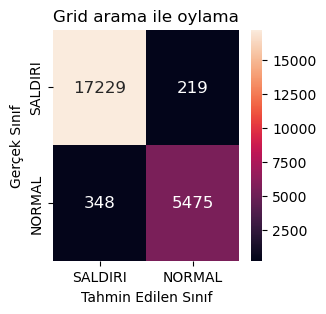

In [129]:
estimator_list = [
    ('knn',knn),
    #('svm_rbf',svm_rbf),
    #('dt',dt),
    ('rf',rf),
    #('mlp',mlp), 
    ('xgb',xgbc),
    #('abc',abc),
    #('gnb',gnbc),
    #('lr',lr),
                ]



gscv_tuned_voting_model = VotingClassifier(estimators=estimator_list,
                                           **grid.best_params_,
                                           n_jobs = 1)


gscv_tuned_voting_train_start = datetime.now()
gscv_tuned_voting_model.fit(x_train, y_train)
gscv_tuned_voting_train_timing = datetime.now()-gscv_tuned_voting_train_start
print('Grid arama ile optizime yumuşak oylama eğitim süresi:',gscv_tuned_voting_train_timing)



gscv_tuned_voting_x_train_pred_start = datetime.now()
y_train_pred = gscv_tuned_voting_model.predict(x_train)
gscv_tuned_voting_x_train_pred_timing = datetime.now()-gscv_tuned_voting_x_train_pred_start
print('Grid arama ile optizime yumuşak oylama eğitim seti tahmin süresi:',gscv_tuned_voting_x_train_pred_timing)

gscv_tuned_voting_x_test_pred_start = datetime.now()
y_test_pred = gscv_tuned_voting_model.predict(x_test)
gscv_tuned_voting_x_test_pred_timing = datetime.now()-gscv_tuned_voting_x_test_pred_start
print('Grid arama ile optizime yumuşak oylama test seti tahmin süresi:',gscv_tuned_voting_x_test_pred_timing)

  
gscv_tuned_voting_model_train_accuracy = accuracy_score(y_train, y_train_pred) 
gscv_tuned_voting_model_train_mcc = matthews_corrcoef(y_train, y_train_pred) 
gscv_tuned_voting_model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') 

 
gscv_tuned_voting_model_test_accuracy = accuracy_score(y_test, y_test_pred) 
gscv_tuned_voting_model_test_mcc = matthews_corrcoef(y_test, y_test_pred) 
gscv_tuned_voting_model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') 

print('----------------------------------')
print('Eğitim seti için modelin performansı')
print('- Doğruluk (Accuracy): %s' % gscv_tuned_voting_model_train_accuracy)
print('- MCC: %s' % gscv_tuned_voting_model_train_mcc)
print('- F1 skoru: %s' % gscv_tuned_voting_model_train_f1)
print('----------------------------------')
print('Test seti için modelin performansı')
print('- Doğruluk (Accuracy): %s' % gscv_tuned_voting_model_test_accuracy)
print('- MCC: %s' % gscv_tuned_voting_model_test_mcc)
print('- F1 skoru: %s' % gscv_tuned_voting_model_test_f1)


fp = confusion_matrix(y_test, y_test_pred, "Grid arama ile oylama")


**Optuna ile Optimizasyon**

In [130]:
#!pip install optuna

import optuna 
from optuna.samplers import TPESampler

In [131]:
def objective(trial):
    # Define the search space
    voting = trial.suggest_categorical('voting', ['hard', 'soft'])
    weights = trial.suggest_categorical('weights', [(1,1,1),
                                                    (2,1,1), 
                                                    (1,2,1), 
                                                     (1,1,2),
                                                     (2,1,2), 
                                                     (2,2,1), 
                                                     (1,2,2), 
                                                     (2,2,3),
                                                     (3,2,2), 
                                                     (2,3,2),])


    estimator_list = [
        ('knn',knn),
        #('svm_rbf',svm_rbf),
        #('dt',dt),
        ('rf',rf),
        #('mlp',mlp), 
        ('xgb',xgbc),
        #('abc',abc),
        #('gnb',gnbc),
        #('lr',lr),
                    ]

    optuna_voting_clf = VotingClassifier (estimators= estimator_list,
                                     voting = voting,
                                     weights = weights,
                                     n_jobs=-1)
    score = cross_val_score(optuna_voting_clf, x_test, y_test, scoring="accuracy").mean()

    return score

In [132]:
# create a study object and pass the objective function to method optimize()

optuna_start = datetime.now()

study = optuna.create_study(study_name="UNSW-NB15_voting_optimization",
                            direction="maximize",
                            sampler=TPESampler())

study.optimize(objective, n_trials=100)


[I 2024-04-28 17:32:24,598] A new study created in memory with name: UNSW-NB15_voting_optimization
[I 2024-04-28 17:33:29,464] Trial 0 finished with value: 0.9715955460509583 and parameters: {'voting': 'soft', 'weights': (1, 2, 2)}. Best is trial 0 with value: 0.9715955460509583.
[I 2024-04-28 17:34:12,240] Trial 1 finished with value: 0.97163847367821 and parameters: {'voting': 'hard', 'weights': (2, 1, 2)}. Best is trial 1 with value: 0.97163847367821.
[I 2024-04-28 17:34:49,645] Trial 2 finished with value: 0.9706501227591664 and parameters: {'voting': 'hard', 'weights': (3, 2, 2)}. Best is trial 1 with value: 0.97163847367821.
[I 2024-04-28 17:35:25,540] Trial 3 finished with value: 0.9709079377798663 and parameters: {'voting': 'soft', 'weights': (3, 2, 2)}. Best is trial 1 with value: 0.97163847367821.
[I 2024-04-28 17:36:00,414] Trial 4 finished with value: 0.9713806678892578 and parameters: {'voting': 'soft', 'weights': (2, 2, 3)}. Best is trial 1 with value: 0.97163847367821.
[

[I 2024-04-28 17:59:39,873] Trial 42 finished with value: 0.971638510605201 and parameters: {'voting': 'soft', 'weights': (1, 1, 1)}. Best is trial 30 with value: 0.9720681930746198.
[I 2024-04-28 18:00:07,731] Trial 43 finished with value: 0.971552516874481 and parameters: {'voting': 'soft', 'weights': (1, 1, 1)}. Best is trial 30 with value: 0.9720681930746198.
[I 2024-04-28 18:00:32,589] Trial 44 finished with value: 0.9715954445017326 and parameters: {'voting': 'soft', 'weights': (1, 2, 2)}. Best is trial 30 with value: 0.9720681930746198.
[I 2024-04-28 18:01:01,078] Trial 45 finished with value: 0.9712517280677906 and parameters: {'voting': 'soft', 'weights': (2, 3, 2)}. Best is trial 30 with value: 0.9720681930746198.
[I 2024-04-28 18:01:27,628] Trial 46 finished with value: 0.9715095707837339 and parameters: {'voting': 'soft', 'weights': (1, 1, 1)}. Best is trial 30 with value: 0.9720681930746198.
[I 2024-04-28 18:01:52,559] Trial 47 finished with value: 0.9714236601387439 and p

[I 2024-04-28 18:18:33,288] Trial 84 finished with value: 0.9709508838706131 and parameters: {'voting': 'hard', 'weights': (1, 1, 1)}. Best is trial 74 with value: 0.972068220769863.
[I 2024-04-28 18:19:01,633] Trial 85 finished with value: 0.9713806401940145 and parameters: {'voting': 'hard', 'weights': (2, 2, 3)}. Best is trial 74 with value: 0.972068220769863.
[I 2024-04-28 18:19:29,333] Trial 86 finished with value: 0.9716814290007048 and parameters: {'voting': 'hard', 'weights': (1, 2, 2)}. Best is trial 74 with value: 0.972068220769863.
[I 2024-04-28 18:19:57,893] Trial 87 finished with value: 0.9717244489454344 and parameters: {'voting': 'hard', 'weights': (1, 1, 1)}. Best is trial 74 with value: 0.972068220769863.
[I 2024-04-28 18:20:25,470] Trial 88 finished with value: 0.9714236324435006 and parameters: {'voting': 'hard', 'weights': (1, 1, 1)}. Best is trial 74 with value: 0.972068220769863.
[I 2024-04-28 18:20:54,682] Trial 89 finished with value: 0.9717243843231997 and para

In [133]:
# print best parameters 
print(study.best_params)

optuna_timing = datetime.now()-optuna_start
print('Optuna arama süresi:',optuna_timing)

{'voting': 'hard', 'weights': (1, 1, 1)}
Optuna arama süresi: 0:53:09.733846


In [134]:
# print best score 
print(study.best_value)

0.972068220769863


In [135]:
# You can use Matplotlib instead of Plotly for visualization by simply replacing `optuna.visualization` with
# `optuna.visualization.matplotlib` in the following examples.
from optuna.visualization import plot_contour
from optuna.visualization import plot_edf
from optuna.visualization import plot_intermediate_values
from optuna.visualization import plot_optimization_history
from optuna.visualization import plot_parallel_coordinate
from optuna.visualization import plot_param_importances
from optuna.visualization import plot_slice

In [136]:
# Plot the high-dimentional parameter relationships in a study.

optuna.visualization.plot_parallel_coordinate(study, params=['voting','weights'])

In [137]:
# Plot optimization history of all trials in a study.

optuna.visualization.plot_optimization_history(study)

In [138]:
# Plot hyperparameter importances.

optuna.visualization.plot_param_importances(study)

In [139]:
# save your hyperparameter searches 
import joblib
#joblib.dump(study, '/kaggle/working/study.pkl')
joblib.dump(study, 'optuna_searches/study.pkl')

['optuna_searches/study.pkl']

In [140]:
# load your hyperparameter searches

#study = joblib.load('/kaggle/working/study.pkl')
study = joblib.load('optuna_searches/study.pkl')

# print the study name
study.study_name 

'UNSW-NB15_voting_optimization'

In [141]:
#plot_intermediate_values(study)

In [142]:
plot_contour(study)

In [143]:
plot_slice(study)

In [144]:
optuna.visualization.plot_param_importances(
    study, target=lambda t: t.duration.total_seconds(), target_name="duration"
)

In [145]:
plot_edf(study)

Optuna ile optizime oylama eğitim süresi: 0:00:11.610847
Optuna ile optizime oylama eğitim seti tahmin süresi: 0:00:03.249235
Optuna ile optizime oylama test seti tahmin süresi: 0:00:00.581571
----------------------------------
Eğitim seti için modelin performansı
- Doğruluk (Accuracy): 0.9963150374405088
- MCC: 0.9901669168900687
- F1 skoru: 0.9963100758988592
----------------------------------
Test seti için modelin performansı
- Doğruluk (Accuracy): 0.9768810966438916
- MCC: 0.9380383692175971
- F1 skoru: 0.9767962530262474


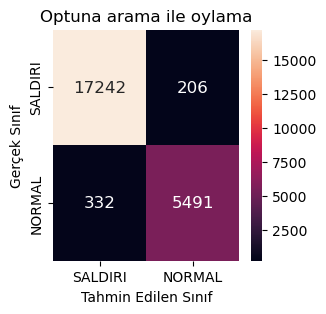

In [146]:
optuna_voting_model = VotingClassifier(estimators=estimator_list, voting='soft',weights=[1,2,2],n_jobs = 1)
                                           


optuna_voting_train_start = datetime.now()
optuna_voting_model.fit(x_train, y_train)
optuna_voting_train_timing = datetime.now()-optuna_voting_train_start
print('Optuna ile optizime oylama eğitim süresi:',optuna_voting_train_timing)



optuna_voting_x_train_pred_start = datetime.now()
y_train_pred = optuna_voting_model.predict(x_train)
optuna_voting_x_train_pred_timing = datetime.now()-optuna_voting_x_train_pred_start
print('Optuna ile optizime oylama eğitim seti tahmin süresi:',optuna_voting_x_train_pred_timing)

optuna_voting_x_test_pred_start = datetime.now()
y_test_pred = optuna_voting_model.predict(x_test)
optuna_voting_x_test_pred_timing = datetime.now()-optuna_voting_x_test_pred_start
print('Optuna ile optizime oylama test seti tahmin süresi:',optuna_voting_x_test_pred_timing)

  
optuna_voting_model_train_accuracy = accuracy_score(y_train, y_train_pred) 
optuna_voting_model_train_mcc = matthews_corrcoef(y_train, y_train_pred) 
optuna_voting_model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') 

 
optuna_voting_model_test_accuracy = accuracy_score(y_test, y_test_pred) 
optuna_voting_model_test_mcc = matthews_corrcoef(y_test, y_test_pred) 
optuna_voting_model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') 

print('----------------------------------')
print('Eğitim seti için modelin performansı')
print('- Doğruluk (Accuracy): %s' % optuna_voting_model_train_accuracy)
print('- MCC: %s' % optuna_voting_model_train_mcc)
print('- F1 skoru: %s' % optuna_voting_model_train_f1)
print('----------------------------------')
print('Test seti için modelin performansı')
print('- Doğruluk (Accuracy): %s' % optuna_voting_model_test_accuracy)
print('- MCC: %s' % optuna_voting_model_test_mcc)
print('- F1 skoru: %s' % optuna_voting_model_test_f1)


fp = confusion_matrix(y_test, y_test_pred, "Optuna arama ile oylama")


**Hyperopt ile Optimizasyon**

In [147]:
#!pip install hyperopt

In [148]:
from hyperopt import tpe, hp, fmin, STATUS_OK,Trials
from hyperopt.pyll.base import scope

In [149]:
# define parameter space

space = {
    "voting": hp.choice("voting", ['hard', 'soft']),
    "weights": hp.choice('weights',[(1,1,1),
                                    (2,1,1), 
                                     (1,2,1), 
                                     (1,1,2),
                                     (2,1,2), 
                                     (2,2,1), 
                                     (1,2,2), 
                                     (2,2,3),
                                     (3,2,2), 
                                     (2,3,2),                   
                     
                        ]),}

estimator_list = [
    ('knn',knn),
    #('svm_rbf',svm_rbf),
    #('dt',dt),
    ('rf',rf),
    #('mlp',mlp), 
    ('xgb',xgbc),
    #('abc',abc),
    #('gnb',gnbc),
    #('lr',lr),
                ]

In [150]:
# define objective function

def hyperparameter_tuning(params):
    hyperopt_voting_clf = VotingClassifier(estimators=estimator_list,**params,n_jobs=-1)
    acc = cross_val_score(hyperopt_voting_clf, x_test, y_test,scoring="accuracy").mean()
    return {"loss": -acc, "status": STATUS_OK}

In [151]:
# Fine tune the model
hyperopt_start = datetime.now()


trials = Trials()

best = fmin(
    
    fn=hyperparameter_tuning,
    space = space, 
    algo=tpe.suggest, 
    max_evals=100, 
    trials=trials
)

print("En iyi hiperparametre kombinasyonu: {}".format(best))

hyperopt_timing = datetime.now()-hyperopt_start
print('Hyperopt arama süresi:',hyperopt_timing)

100%|██████████| 100/100 [46:08<00:00, 27.68s/trial, best loss: -0.9722400974503298]
En iyi hiperparametre kombinasyonu: {'voting': 0, 'weights': 8}
Hyperopt arama süresi: 0:46:08.048913


In [152]:
# A list of dictionaries representing everything about the search

trials.trials

[{'state': 2,
  'tid': 0,
  'spec': None,
  'result': {'loss': -0.9699626529642911, 'status': 'ok'},
  'misc': {'tid': 0,
   'cmd': ('domain_attachment', 'FMinIter_Domain'),
   'workdir': None,
   'idxs': {'voting': [0], 'weights': [0]},
   'vals': {'voting': [0], 'weights': [1]}},
  'exp_key': None,
  'owner': None,
  'version': 0,
  'book_time': datetime.datetime(2024, 4, 28, 15, 26, 16, 30000),
  'refresh_time': datetime.datetime(2024, 4, 28, 15, 26, 44, 217000)},
 {'state': 2,
  'tid': 1,
  'spec': None,
  'result': {'loss': -0.9712517742265296, 'status': 'ok'},
  'misc': {'tid': 1,
   'cmd': ('domain_attachment', 'FMinIter_Domain'),
   'workdir': None,
   'idxs': {'voting': [1], 'weights': [1]},
   'vals': {'voting': [0], 'weights': [4]}},
  'exp_key': None,
  'owner': None,
  'version': 0,
  'book_time': datetime.datetime(2024, 4, 28, 15, 26, 44, 217000),
  'refresh_time': datetime.datetime(2024, 4, 28, 15, 27, 11, 293000)},
 {'state': 2,
  'tid': 2,
  'spec': None,
  'result': {

In [153]:
# A list of dictionaries returned by 'objective' during the search 
trials.results


[{'loss': -0.9699626529642911, 'status': 'ok'},
 {'loss': -0.9712517742265296, 'status': 'ok'},
 {'loss': -0.9708219809761373, 'status': 'ok'},
 {'loss': -0.9712947387807723, 'status': 'ok'},
 {'loss': -0.9716814105372092, 'status': 'ok'},
 {'loss': -0.9703493154889802, 'status': 'ok'},
 {'loss': -0.9709079377798663, 'status': 'ok'},
 {'loss': -0.9718103595904243, 'status': 'ok'},
 {'loss': -0.971122806709819, 'status': 'ok'},
 {'loss': -0.9706501042956708, 'status': 'ok'},
 {'loss': -0.9712947295490245, 'status': 'ok'},
 {'loss': -0.96936099226518, 'status': 'ok'},
 {'loss': -0.9709509392611, 'status': 'ok'},
 {'loss': -0.9722400974503298, 'status': 'ok'},
 {'loss': -0.9713376479445281, 'status': 'ok'},
 {'loss': -0.9706930965451569, 'status': 'ok'},
 {'loss': -0.9698337039110762, 'status': 'ok'},
 {'loss': -0.9711228344050624, 'status': 'ok'},
 {'loss': -0.9714236047482571, 'status': 'ok'},
 {'loss': -0.9718533610716582, 'status': 'ok'},
 {'loss': -0.9712087727452957, 'status': 'ok'}

In [154]:
#  A list of losses (float for each 'ok' trial)
#trials.losses()

In [155]:
tpe.rand.suggest

<function hyperopt.rand.suggest(new_ids, domain, trials, seed)>

Hyperopt ile optizime oylama eğitim süresi: 0:00:12.253644
Hyperopt ile optizime oylama eğitim seti tahmin süresi: 0:00:02.358819
Hyperopt ile optizime oylama test seti tahmin süresi: 0:00:01.022903
----------------------------------
Eğitim seti için modelin performansı
- Doğruluk (Accuracy): 0.996691054028212
- MCC: 0.9911718977569418
- F1 skoru: 0.9966882496258109
----------------------------------
Test seti için modelin performansı
- Doğruluk (Accuracy): 0.9764513772506553
- MCC: 0.9369283896916547
- F1 skoru: 0.9763788823025871


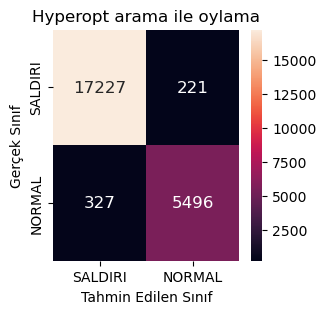

In [156]:
hyperopt_voting_model = VotingClassifier(estimators=estimator_list, voting='soft',weights=[2,3,2],n_jobs = 1)                                         


hyperopt_voting_train_start = datetime.now()
hyperopt_voting_model.fit(x_train, y_train)
hyperopt_voting_train_timing = datetime.now()-hyperopt_voting_train_start
print('Hyperopt ile optizime oylama eğitim süresi:',hyperopt_voting_train_timing)


hyperopt_voting_x_train_pred_start = datetime.now()
y_train_pred = hyperopt_voting_model.predict(x_train)
hyperopt_voting_x_train_pred_timing = datetime.now()-hyperopt_voting_x_train_pred_start
print('Hyperopt ile optizime oylama eğitim seti tahmin süresi:',hyperopt_voting_x_train_pred_timing)

hyperopt_voting_x_test_pred_start = datetime.now()
y_test_pred = hyperopt_voting_model.predict(x_test)
hyperopt_voting_x_test_pred_timing = datetime.now()-hyperopt_voting_x_test_pred_start
print('Hyperopt ile optizime oylama test seti tahmin süresi:',hyperopt_voting_x_test_pred_timing)

  
hyperopt_voting_model_train_accuracy = accuracy_score(y_train, y_train_pred) 
hyperopt_voting_model_train_mcc = matthews_corrcoef(y_train, y_train_pred) 
hyperopt_voting_model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') 

 
hyperopt_voting_model_test_accuracy = accuracy_score(y_test, y_test_pred) 
hyperopt_voting_model_test_mcc = matthews_corrcoef(y_test, y_test_pred) 
hyperopt_voting_model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') 

print('----------------------------------')
print('Eğitim seti için modelin performansı')
print('- Doğruluk (Accuracy): %s' % hyperopt_voting_model_train_accuracy)
print('- MCC: %s' % hyperopt_voting_model_train_mcc)
print('- F1 skoru: %s' % hyperopt_voting_model_train_f1)
print('----------------------------------')
print('Test seti için modelin performansı')
print('- Doğruluk (Accuracy): %s' % hyperopt_voting_model_test_accuracy)
print('- MCC: %s' % hyperopt_voting_model_test_mcc)
print('- F1 skoru: %s' % hyperopt_voting_model_test_f1)


fp = confusion_matrix(y_test, y_test_pred, "Hyperopt arama ile oylama")


# **Eğitim Sonuçları**

In [157]:
acc_train_list = {'knn':knn_train_accuracy,
'svm_rbf': svm_rbf_train_accuracy,
'dt': dt_train_accuracy,
'rf': rf_train_accuracy,
'mlp': mlp_train_accuracy,
'xgb': xgbc_train_accuracy,
'gnb': gnbc_train_accuracy,
'abc': abc_train_accuracy,
'lr': lr_train_accuracy,
'stack': stack_model_train_accuracy,
'hard voting': hard_voting_model_train_accuracy,
'soft voting': soft_voting_model_train_accuracy,
'Nelder-Mead 1 (KNN vs XGB)': eclf_model_train_accuracy,
'Nelder-Mead 2 (RF vs XGB)': eclf_model_train_accuracy_2,                  
'Nelder-Mead 3 (KNN vs RF)': eclf_model_train_accuracy_3,                 
'Grid Arama': gscv_tuned_voting_model_train_accuracy,
'Rastgele Arama': random_tuned_voting_model_train_accuracy,
'Optuna': optuna_voting_model_train_accuracy,
'Hyperopt': hyperopt_voting_model_train_accuracy,
                  
                        }

mcc_train_list = {'knn':knn_train_mcc,
'svm_rbf': svm_rbf_train_mcc,
'dt': dt_train_mcc,
'rf': rf_train_mcc,
'mlp': mlp_train_mcc,
'xgb': xgbc_train_mcc,
'gnb': gnbc_train_mcc,
'abc': abc_train_mcc,
'lr': lr_train_mcc,               
'stack': stack_model_train_mcc,
'hard voting': hard_voting_model_train_mcc,
'soft voting': soft_voting_model_train_mcc,
'Nelder-Mead 1 (KNN vs XGB)': eclf_model_train_mcc,
'Nelder-Mead 2 (RF vs XGB)': eclf_model_train_mcc_2,
'Nelder-Mead 3 (KNN vs RF)': eclf_model_train_mcc_3,                  
'Grid Arama':gscv_tuned_voting_model_train_mcc,
'Rastgele Arama': random_tuned_voting_model_train_mcc,
'Optuna': optuna_voting_model_train_mcc,
'Hyperopt': hyperopt_voting_model_train_mcc,                  

                 }



f1_train_list = {'knn':knn_train_f1,
'svm_rbf': svm_rbf_train_f1,
'dt': dt_train_f1,
'rf': rf_train_f1,
'mlp': mlp_train_f1,
'xgb': xgbc_train_f1,
'gnb': gnbc_train_f1,
'abc': abc_train_f1,
'lr': lr_train_f1,             
'stack': stack_model_train_f1,
'hard voting': hard_voting_model_train_f1,
'soft voting': soft_voting_model_train_f1,
'Nelder-Mead 1 (KNN vs XGB)': eclf_model_train_f1,
'Nelder-Mead 2 (RF vs XGB)': eclf_model_train_f1_2,
'Nelder-Mead 3 (KNN vs RF)': eclf_model_train_f1_3,                 
'Grid Arama': gscv_tuned_voting_model_train_f1,
'Rastgele Arama': random_tuned_voting_model_train_f1,
'Optuna': optuna_voting_model_train_f1,
'Hyperopt': hyperopt_voting_model_train_f1,               
                }


In [158]:
acc_train_list

{'knn': 0.985614679687584,
 'svm_rbf': 0.9801463241692719,
 'dt': 0.9643751141478927,
 'rf': 0.9980447137439434,
 'mlp': 0.9628925344592344,
 'xgb': 0.9901376220710993,
 'gnb': 0.917566420644385,
 'abc': 0.9599488617440723,
 'lr': 0.9452842148236482,
 'stack': 0.9967447706835981,
 'hard voting': 0.9967447706835981,
 'soft voting': 0.9956167209204886,
 'Nelder-Mead 1 (KNN vs XGB)': 0.9951977310084765,
 'Nelder-Mead 2 (RF vs XGB)': 0.9957563842244926,
 'Nelder-Mead 3 (KNN vs RF)': 0.9953481376435578,
 'Grid Arama': 0.9964117274202039,
 'Rastgele Arama': 0.9940374512521353,
 'Optuna': 0.9963150374405088,
 'Hyperopt': 0.996691054028212}

In [159]:
mcc_train_list

{'knn': 0.9616473608922791,
 'svm_rbf': 0.946833686605212,
 'dt': 0.9039980410411276,
 'rf': 0.9947867650573342,
 'mlp': 0.9001341908466013,
 'xgb': 0.9736353307052017,
 'gnb': 0.7736483104999201,
 'abc': 0.891708939306051,
 'lr': 0.8518965800266216,
 'stack': 0.9913175278819074,
 'hard voting': 0.9913175278819074,
 'soft voting': 0.9883010945491547,
 'Nelder-Mead 1 (KNN vs XGB)': 0.987181524324665,
 'Nelder-Mead 2 (RF vs XGB)': 0.9886743121713883,
 'Nelder-Mead 3 (KNN vs RF)': 0.9875833236839118,
 'Grid Arama': 0.9904254371801857,
 'Rastgele Arama': 0.9840798331505115,
 'Optuna': 0.9901669168900687,
 'Hyperopt': 0.9911718977569418}

In [160]:
f1_train_list

{'knn': 0.9856121052537409,
 'svm_rbf': 0.9800849039844289,
 'dt': 0.964083019678419,
 'rf': 0.9980426330540796,
 'mlp': 0.9620656026568103,
 'xgb': 0.9901146457884565,
 'gnb': 0.9130478600022817,
 'abc': 0.9594332165686433,
 'lr': 0.9447042539388328,
 'stack': 0.9967431134735639,
 'hard voting': 0.9967431134735639,
 'soft voting': 0.9956112954652216,
 'Nelder-Mead 1 (KNN vs XGB)': 0.9951916826180687,
 'Nelder-Mead 2 (RF vs XGB)': 0.9957512238085244,
 'Nelder-Mead 3 (KNN vs RF)': 0.9953422113041765,
 'Grid Arama': 0.9964080645989187,
 'Rastgele Arama': 0.9940290772521004,
 'Optuna': 0.9963100758988592,
 'Hyperopt': 0.9966882496258109}

In [161]:
acc_df = pd.DataFrame.from_dict(acc_train_list, orient='index', columns=['Doğruluk (Accuracy)'])
mcc_df = pd.DataFrame.from_dict(mcc_train_list, orient='index', columns=['MCC'])
f1_df = pd.DataFrame.from_dict(f1_train_list, orient='index', columns=['F1'])
train_result_df = pd.concat([acc_df, mcc_df, f1_df], axis=1)
train_result_df.sort_values(by='Doğruluk (Accuracy)', ascending=False)
train_result_df

Doğruluk (Accuracy)       MCC        F1
knn                                    0.985615  0.961647  0.985612
svm_rbf                                0.980146  0.946834  0.980085
dt                                     0.964375  0.903998  0.964083
rf                                     0.998045  0.994787  0.998043
mlp                                    0.962893  0.900134  0.962066
xgb                                    0.990138  0.973635  0.990115
gnb                                    0.917566  0.773648  0.913048
abc                                    0.959949  0.891709  0.959433
lr                                     0.945284  0.851897  0.944704
stack                                  0.996745  0.991318  0.996743
hard voting                            0.996745  0.991318  0.996743
soft voting                            0.995617  0.988301  0.995611
Nelder-Mead 1 (KNN vs XGB)             0.995198  0.987182  0.995192
Nelder-Mead 2 (RF vs XGB)              0.995756  0.988674  0.995751
Nelder-Mead 3 (KNN vs RF)              0.995348  0.987583  0.995342
Grid Arama                             0.996412  0.990425  0.996408
Rastgele Arama                         0.994037  0.984080  0.994029
Optuna                                 0.996315  0.990167  0.996310
Hyperopt                               0.996691  0.991172  0.996688

In [164]:
train_result_df.to_csv('Egitim_Sonuclari.csv')

ModuleNotFoundError: No module named 'pandas.io.formats.csvs'

# **Test Sonuçları**

In [165]:
acc_test_list = {'knn':knn_test_accuracy,
'svm_rbf': svm_rbf_test_accuracy,
'dt': dt_test_accuracy,
'rf': rf_test_accuracy,
'mlp': mlp_test_accuracy,
'xgb': xgbc_test_accuracy,
'gnb': gnbc_test_accuracy,
'abc': abc_test_accuracy,
'lr': lr_test_accuracy,      
'stack': stack_model_test_accuracy,
'hard voting': hard_voting_model_test_accuracy,
'soft voting': soft_voting_model_test_accuracy,
'Nelder-Mead 1 (KNN vs XGB)': eclf_model_test_accuracy,
'Nelder-Mead 2 (RF vs XGB)': eclf_model_test_accuracy_2,
'Nelder-Mead 3 (KNN vs RF)': eclf_model_test_accuracy_3,                                
'Grid Arama': gscv_tuned_voting_model_test_accuracy,
'Rastgele Arama': random_tuned_voting_model_test_accuracy,
'Optuna': optuna_voting_model_test_accuracy,
'Hyperopt': hyperopt_voting_model_test_accuracy,
                 
                }

mcc_test_list = {'knn':knn_test_mcc,
'svm_rbf': svm_rbf_test_mcc,
'dt': dt_test_mcc,
'rf': rf_test_mcc,
'mlp': mlp_test_mcc,
'xgb': xgbc_test_mcc,
'gnb': gnbc_test_mcc,
'abc': abc_test_mcc,
'lr': lr_test_mcc,               
'stack': stack_model_test_mcc,
'hard voting': hard_voting_model_test_mcc,
'soft voting': soft_voting_model_test_mcc,
'Nelder-Mead 1 (KNN vs XGB)': eclf_model_test_mcc,
'Nelder-Mead 2 (RF vs XGB)': eclf_model_test_mcc_2,
'Nelder-Mead 3 (KNN vs RF)': eclf_model_test_mcc_3,                 
'Grid Arama': gscv_tuned_voting_model_test_mcc,                 
'Rastgele Arama': random_tuned_voting_model_test_mcc,
'Optuna': optuna_voting_model_test_mcc,
'Hyperopt': hyperopt_voting_model_test_mcc,

                }



f1_test_list = {'knn':knn_test_f1,
'svm_rbf': svm_rbf_test_f1,
'dt': dt_test_f1,
'rf': rf_test_f1,
'mlp': mlp_test_f1,
'xgb': xgbc_test_f1,
'gnb': gnbc_test_f1,
'abc': abc_test_f1,
'lr': lr_test_f1,               
'stack': stack_model_test_f1,
'hard voting': hard_voting_model_test_f1,
'soft voting': soft_voting_model_test_f1,
'Nelder-Mead 1 (KNN vs XGB)': eclf_model_test_f1,
'Nelder-Mead 2 (RF vs XGB)': eclf_model_test_f1_2,
'Nelder-Mead 3 (KNN vs RF)': eclf_model_test_f1_3,                
'Grid Arama':gscv_tuned_voting_model_test_f1,                
'Rastgele Arama': random_tuned_voting_model_test_f1,
'Optuna': optuna_voting_model_test_f1,
'Hyperopt': hyperopt_voting_model_test_f1,

               }


In [166]:
acc_test_list

{'knn': 0.9726698465901766,
 'svm_rbf': 0.9746895277383868,
 'dt': 0.9633879076962744,
 'rf': 0.9743027802844743,
 'mlp': 0.9631730479996562,
 'xgb': 0.9741308925271798,
 'gnb': 0.9182673714064715,
 'abc': 0.9599501525503846,
 'lr': 0.9464139916634438,
 'stack': 0.9754200507068884,
 'hard voting': 0.9754200507068884,
 'soft voting': 0.9762365175540372,
 'Nelder-Mead 1 (KNN vs XGB)': 0.9759357139787719,
 'Nelder-Mead 2 (RF vs XGB)': 0.9758497701001246,
 'Nelder-Mead 3 (KNN vs RF)': 0.9757638262214774,
 'Grid Arama': 0.9756349104035065,
 'Rastgele Arama': 0.975463022646212,
 'Optuna': 0.9768810966438916,
 'Hyperopt': 0.9764513772506553}

In [167]:
mcc_test_list

{'knn': 0.9272846308922467,
 'svm_rbf': 0.9321665277715587,
 'dt': 0.9013804222240356,
 'rf': 0.930975503956642,
 'mlp': 0.9008402287368553,
 'xgb': 0.9306953518079399,
 'gnb': 0.7757187338127405,
 'abc': 0.891707867989751,
 'lr': 0.855018009632844,
 'stack': 0.9342201848042361,
 'hard voting': 0.9342201848042361,
 'soft voting': 0.9363938251616506,
 'Nelder-Mead 1 (KNN vs XGB)': 0.9355906233106341,
 'Nelder-Mead 2 (RF vs XGB)': 0.9353298046868846,
 'Nelder-Mead 3 (KNN vs RF)': 0.9351145875181665,
 'Grid Arama': 0.9346862193198655,
 'Rastgele Arama': 0.9342246704278785,
 'Optuna': 0.9380383692175971,
 'Hyperopt': 0.9369283896916547}

In [168]:
f1_test_list

{'knn': 0.9726916487255384,
 'svm_rbf': 0.9746003912039116,
 'dt': 0.9631120323813697,
 'rf': 0.9741530476295497,
 'mlp': 0.9623844618950241,
 'xgb': 0.9740482012902453,
 'gnb': 0.9138030295243597,
 'abc': 0.9594235969085263,
 'lr': 0.9458617237588929,
 'stack': 0.9753602746443594,
 'hard voting': 0.9753602746443594,
 'soft voting': 0.9761752432594838,
 'Nelder-Mead 1 (KNN vs XGB)': 0.9758743700422478,
 'Nelder-Mead 2 (RF vs XGB)': 0.9757796917030093,
 'Nelder-Mead 3 (KNN vs RF)': 0.9756977749255392,
 'Grid Arama': 0.9755433250768789,
 'Rastgele Arama': 0.9753707912149873,
 'Optuna': 0.9767962530262474,
 'Hyperopt': 0.9763788823025871}

In [169]:
acc_df = pd.DataFrame.from_dict(acc_test_list, orient='index', columns=['Doğruluk (Accuracy)'])
mcc_df = pd.DataFrame.from_dict(mcc_test_list, orient='index', columns=['MCC'])
f1_df = pd.DataFrame.from_dict(f1_test_list, orient='index', columns=['F1'])
test_result_df = pd.concat([acc_df, mcc_df, f1_df], axis=1)
test_result_df.sort_values(by='Doğruluk (Accuracy)', ascending=False)


Doğruluk (Accuracy)       MCC        F1
Optuna                                 0.976881  0.938038  0.976796
Hyperopt                               0.976451  0.936928  0.976379
soft voting                            0.976237  0.936394  0.976175
Nelder-Mead 1 (KNN vs XGB)             0.975936  0.935591  0.975874
Nelder-Mead 2 (RF vs XGB)              0.975850  0.935330  0.975780
Nelder-Mead 3 (KNN vs RF)              0.975764  0.935115  0.975698
Grid Arama                             0.975635  0.934686  0.975543
Rastgele Arama                         0.975463  0.934225  0.975371
hard voting                            0.975420  0.934220  0.975360
stack                                  0.975420  0.934220  0.975360
svm_rbf                                0.974690  0.932167  0.974600
rf                                     0.974303  0.930976  0.974153
xgb                                    0.974131  0.930695  0.974048
knn                                    0.972670  0.927285  0.972692
dt                                     0.963388  0.901380  0.963112
mlp                                    0.963173  0.900840  0.962384
abc                                    0.959950  0.891708  0.959424
lr                                     0.946414  0.855018  0.945862
gnb                                    0.918267  0.775719  0.913803

In [170]:
test_result_df.to_csv('Test_Sonuclari.csv')

ModuleNotFoundError: No module named 'pandas.io.formats.csvs'

# **Zamanlama Sonuçları**

In [171]:
training_timing_list = {'knn':knn_train_timing,
'svm_rbf': svm_train_timing,
'dt': dt_train_timing,
'rf': rf_train_timing,
'mlp': mlp_train_timing,
'xgb': xgb_train_timing,
'gnb': gnbc_train_timing,
'abc': abc_train_timing,
'lr': lr_train_timing,      
'stack': stack_train_timing,
'hard voting': hard_voting_train_timing,
'soft voting': soft_voting_train_timing,
'Nelder-Mead 1 (KNN vs XGB)': eclf_voting_train_timing,
'Nelder-Mead 2 (RF vs XGB)': eclf_voting_train_timing_2,
'Nelder-Mead 3 (KNN vs RF)': eclf_voting_train_timing_3,                     
'Grid Arama':gscv_tuned_voting_train_timing,
'Rastgele Arama':random_tuned_voting_train_timing,
'Optuna': optuna_voting_train_timing,
'Hyperopt': hyperopt_voting_train_timing,

                        
                }

train_set_pred_timing_list = {'knn':knn_x_train_pred_timing,
'svm_rbf': svm_x_train_pred_timing,
'dt': dt_x_train_pred_timing,
'rf': rf_x_train_pred_timing,
'mlp': mlp_x_train_pred_timing,
'xgb': xgb_x_train_pred_timing,
'gnb': gnbc_x_train_pred_timing,
'abc': abc_x_train_pred_timing,
'lr': lr_x_train_pred_timing,               
'stack': stack_x_train_pred_timing,
'hard voting': hard_voting_x_train_pred_timing,
'soft voting': soft_voting_x_train_pred_timing,
'Nelder-Mead 1 (KNN vs XGB)': eclf_x_train_pred_timing,
'Nelder-Mead 2 (RF vs XGB)': eclf_x_train_pred_timing_2,
'Nelder-Mead 3 (KNN vs RF)': eclf_x_train_pred_timing_3,                              
'Grid Arama':gscv_tuned_voting_x_train_pred_timing,
'Rastgele Arama':random_tuned_voting_x_train_pred_timing,
'Optuna': optuna_voting_x_train_pred_timing,
'Hyperopt': hyperopt_voting_x_train_pred_timing,
                             
                }



test_set_pred_timing_list = {'knn':knn_x_test_pred_timing,
'svm_rbf': svm_x_test_pred_timing,
'dt': dt_x_test_pred_timing,
'rf': rf_x_test_pred_timing,
'mlp': mlp_x_test_pred_timing,
'xgb': xgb_x_test_pred_timing,
'gnb': gnbc_x_test_pred_timing,
'abc': abc_x_test_pred_timing,
'lr': lr_x_test_pred_timing,               
'stack': stack_x_test_pred_timing,
'hard voting': hard_voting_x_test_pred_timing,
'soft voting': soft_voting_x_test_pred_timing,
'Nelder-Mead 1 (KNN vs XGB)': eclf_x_test_pred_timing,
'Nelder-Mead 2 (RF vs XGB)': eclf_x_test_pred_timing_2,
'Nelder-Mead 3 (KNN vs RF)': eclf_x_test_pred_timing_3,                            
'Grid Arama':gscv_tuned_voting_x_test_pred_timing,
'Rastgele Arama':random_tuned_voting_x_test_pred_timing,
'Optuna': optuna_voting_x_test_pred_timing,
'Hyperopt': hyperopt_voting_x_test_pred_timing,
                             
                             
               }

In [172]:
training_timing_list

{'knn': datetime.timedelta(microseconds=999324),
 'svm_rbf': datetime.timedelta(seconds=318, microseconds=441949),
 'dt': datetime.timedelta(microseconds=835766),
 'rf': datetime.timedelta(seconds=3, microseconds=637224),
 'mlp': datetime.timedelta(seconds=61, microseconds=316717),
 'xgb': datetime.timedelta(seconds=23, microseconds=592511),
 'gnb': datetime.timedelta(microseconds=89759),
 'abc': datetime.timedelta(seconds=28, microseconds=239385),
 'lr': datetime.timedelta(microseconds=461763),
 'stack': datetime.timedelta(seconds=121, microseconds=175669),
 'hard voting': datetime.timedelta(seconds=23, microseconds=980313),
 'soft voting': datetime.timedelta(seconds=21, microseconds=158364),
 'Nelder-Mead 1 (KNN vs XGB)': datetime.timedelta(microseconds=3989),
 'Nelder-Mead 2 (RF vs XGB)': datetime.timedelta(microseconds=1994),
 'Nelder-Mead 3 (KNN vs RF)': datetime.timedelta(microseconds=2991),
 'Grid Arama': datetime.timedelta(seconds=20, microseconds=72517),
 'Rastgele Arama': dat

In [173]:
train_set_pred_timing_list

{'knn': datetime.timedelta(seconds=9, microseconds=57746),
 'svm_rbf': datetime.timedelta(seconds=237, microseconds=544020),
 'dt': datetime.timedelta(microseconds=17988),
 'rf': datetime.timedelta(microseconds=261302),
 'mlp': datetime.timedelta(microseconds=177319),
 'xgb': datetime.timedelta(microseconds=177526),
 'gnb': datetime.timedelta(microseconds=81782),
 'abc': datetime.timedelta(seconds=2, microseconds=858342),
 'lr': datetime.timedelta(microseconds=5985),
 'stack': datetime.timedelta(seconds=4, microseconds=597683),
 'hard voting': datetime.timedelta(seconds=12, microseconds=418782),
 'soft voting': datetime.timedelta(seconds=5, microseconds=455398),
 'Nelder-Mead 1 (KNN vs XGB)': datetime.timedelta(seconds=3, microseconds=925489),
 'Nelder-Mead 2 (RF vs XGB)': datetime.timedelta(seconds=3, microseconds=318116),
 'Nelder-Mead 3 (KNN vs RF)': datetime.timedelta(seconds=4, microseconds=53632),
 'Grid Arama': datetime.timedelta(seconds=3, microseconds=286088),
 'Rastgele Arama

In [174]:
test_set_pred_timing_list

{'knn': datetime.timedelta(seconds=1, microseconds=514986),
 'svm_rbf': datetime.timedelta(seconds=67, microseconds=837350),
 'dt': datetime.timedelta(microseconds=3986),
 'rf': datetime.timedelta(microseconds=73801),
 'mlp': datetime.timedelta(microseconds=46876),
 'xgb': datetime.timedelta(microseconds=45872),
 'gnb': datetime.timedelta(microseconds=20943),
 'abc': datetime.timedelta(microseconds=544543),
 'lr': datetime.timedelta(microseconds=1994),
 'stack': datetime.timedelta(seconds=1, microseconds=10296),
 'hard voting': datetime.timedelta(seconds=2, microseconds=304842),
 'soft voting': datetime.timedelta(seconds=1, microseconds=59162),
 'Nelder-Mead 1 (KNN vs XGB)': datetime.timedelta(microseconds=617348),
 'Nelder-Mead 2 (RF vs XGB)': datetime.timedelta(microseconds=733038),
 'Nelder-Mead 3 (KNN vs RF)': datetime.timedelta(seconds=1, microseconds=106080),
 'Grid Arama': datetime.timedelta(seconds=1, microseconds=91216),
 'Rastgele Arama': datetime.timedelta(seconds=2, microse

In [175]:
training_df = pd.DataFrame.from_dict(training_timing_list, orient='index', columns=['Eğitim Süresi'])
train_set_df = pd.DataFrame.from_dict(train_set_pred_timing_list, orient='index', columns=['Eğitim Seti Tahmin Süresi'])
test_set_df = pd.DataFrame.from_dict(test_set_pred_timing_list, orient='index', columns=['Test Seti Tahmin Süresi'])
timing_result_df = pd.concat([training_df, train_set_df, test_set_df], axis=1)
timing_result_df.sort_values(by='Eğitim Süresi', ascending=True)


Eğitim Süresi Eğitim Seti Tahmin Süresi  \
Nelder-Mead 2 (RF vs XGB)  0 days 00:00:00.001994    0 days 00:00:03.318116   
Nelder-Mead 3 (KNN vs RF)  0 days 00:00:00.002991    0 days 00:00:04.053632   
Nelder-Mead 1 (KNN vs XGB) 0 days 00:00:00.003989    0 days 00:00:03.925489   
gnb                        0 days 00:00:00.089759    0 days 00:00:00.081782   
lr                         0 days 00:00:00.461763    0 days 00:00:00.005985   
dt                         0 days 00:00:00.835766    0 days 00:00:00.017988   
knn                        0 days 00:00:00.999324    0 days 00:00:09.057746   
rf                         0 days 00:00:03.637224    0 days 00:00:00.261302   
Optuna                     0 days 00:00:11.610847    0 days 00:00:03.249235   
Hyperopt                   0 days 00:00:12.253644    0 days 00:00:02.358819   
Rastgele Arama             0 days 00:00:16.389200    0 days 00:00:08.774633   
Grid Arama                 0 days 00:00:20.072517    0 days 00:00:03.286088   
soft voting                0 days 00:00:21.158364    0 days 00:00:05.455398   
xgb                        0 days 00:00:23.592511    0 days 00:00:00.177526   
hard voting                0 days 00:00:23.980313    0 days 00:00:12.418782   
abc                        0 days 00:00:28.239385    0 days 00:00:02.858342   
mlp                        0 days 00:01:01.316717    0 days 00:00:00.177319   
stack                      0 days 00:02:01.175669    0 days 00:00:04.597683   
svm_rbf                    0 days 00:05:18.441949    0 days 00:03:57.544020   

                           Test Seti Tahmin Süresi  
Nelder-Mead 2 (RF vs XGB)   0 days 00:00:00.733038  
Nelder-Mead 3 (KNN vs RF)   0 days 00:00:01.106080  
Nelder-Mead 1 (KNN vs XGB)  0 days 00:00:00.617348  
gnb                         0 days 00:00:00.020943  
lr                          0 days 00:00:00.001994  
dt                          0 days 00:00:00.003986  
knn                         0 days 00:00:01.514986  
rf                          0 days 00:00:00.073801  
Optuna                      0 days 00:00:00.581571  
Hyperopt                    0 days 00:00:01.022903  
Rastgele Arama              0 days 00:00:02.804246  
Grid Arama                  0 days 00:00:01.091216  
soft voting                 0 days 00:00:01.059162  
xgb                         0 days 00:00:00.045872  
hard voting                 0 days 00:00:02.304842  
abc                         0 days 00:00:00.544543  
mlp                         0 days 00:00:00.046876  
stack                       0 days 00:00:01.010296  
svm_rbf                     0 days 00:01:07.837350

In [193]:
timing_result_df.to_csv('Zamanlama_Sonuclari.csv')

ModuleNotFoundError: No module named 'pandas.io.formats.csvs'

# **Grid&Rastgele Arama&Nelder-Mead Zamanlama Sonuçları**

In [177]:
search_timing_list = {'Grid Arama':gscv_timing,
                      'Rastgele Arama': rscv_timing,
                        'Nelder-Mead Arama 1': nm_timing_1,
                        'Nelder-Mead Arama 2': nm_timing_2,
                        'Nelder-Mead Arama 3': nm_timing_3,
                        'optuna': optuna_timing,
                        'hyperopt': hyperopt_timing,


                        
                }
sample_list = {'Grid Arama':gscv_candidates,
                'Rastgele Arama': rscv_candidates,
                'optuna': 100,
                'hyperopt': 100,       
                }

In [191]:
timing_df = pd.DataFrame.from_dict(search_timing_list, orient='index', columns=['Arama Süresi'])
sample_df = pd.DataFrame.from_dict(sample_list, orient='index', columns=['Değerlendirilen Parametre Sayısı'])

search_result_df = pd.concat([timing_df,sample_df], axis=1)

search_result_df.sort_values(by='Arama Süresi', ascending=True)


Arama Süresi  Değerlendirilen Parametre Sayısı
Nelder-Mead Arama 3 0 days 00:00:50.987336                               NaN
Nelder-Mead Arama 2 0 days 00:00:57.751446                               NaN
Nelder-Mead Arama 1 0 days 00:01:16.568719                               NaN
Rastgele Arama      0 days 00:13:54.510753                              10.0
Grid Arama          0 days 00:24:09.287873                              20.0
hyperopt            0 days 00:46:08.048913                             100.0
optuna              0 days 00:53:09.733846                             100.0

In [194]:
search_result_df.to_csv('Arama_Zamanlama_Sonuclari.csv', encoding='utf-8', index=False)

ModuleNotFoundError: No module named 'pandas.io.formats.csvs'

In [189]:
print("-"*50)

--------------------------------------------------
